# Config Items

In [5]:
#read and display images
import skimage
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage import img_as_ubyte
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

from tqdm import tqdm

#get file names
import os

#calculate mode
from scipy import stats

import numpy as np
import cv2

%matplotlib inline

#you must include the / at the end

'''
imgBoundariesPath = '/home/hooman/dataPreparation/hsTestSet/imgBoundaries/'
labelBoundariesPath = '/home/hooman/dataPreparation/hsTestSet/labelBoundaries/'
gtMaskPath = '/home/hooman/dataPreparation/hsTestSet/bucketRectangleMasks/'
'''

imagesPath = '/media/hooman/hsSsdPartUbuntu/FM_PROJECT/dataPreparation/FMDL_3.1/hydraulics/images_fromJira/'

labelsPath = '/media/hooman/hsSsdPartUbuntu/FM_PROJECT/dataPreparation/FMDL_3.1/hydraulics/labels_fromJira/'


#resultsLoc = "/home/hooman/resultsFromExistingNetwork/mahdisNetworkResult/"

## Pixel Values

In [ ]:
# Correct Color maps from document

###**** FOR THE LABELS YOU MUST CONVERT: 
#imgLabel = imread(croppedLabelsPath + fileName)
#imgLabelRev = cv2.cvtColor(imgLabel, cv2.COLOR_RGB2BGR)
###***********************

""" 
*** Dust and Shadow can be outside or inside. They are trying to convert all shadows and dusts to inside only
    but this has not been done in my dataset yet.
    
*** Inap is anything inside the bucket that is inappropriate for FM and for WM.

*** Rock == Boulders
*** FineInside == Good For Fragmentation
    
* Hydralics have no cable and no sheave (the pully puling the cables up).
* Bucyris has two cables and two sheaves. 
* B&H has a single cable and a single sheaves



rockInside  = (0, 0, 255, 100)     #blue     "rock_inside"      = "0000FF"
fineInside  = (0, 255, 0, 100)     #green    "fine_inside"      = "00FF00"
emptyInside = (255, 255, 0, 100)   #yellow   "empty"            = "FFFF00"
wmInside    = (255, 100, 100, 100) #L-Pink   "wm_landmarks"     = "FF6464"
inapInside  = (150, 100, 50,100)   #L-Brown  "inapp_For_FM"     = "966432"


teeth       = (255,   0, 255, 100) #pink     "teeth"            = "FF00FF"
case        = (255, 0, 0, 100)     #red      "case"             = "FF0000"
truck       = (255, 255, 200, 100) #cream    "truck"            = "FFFFC8"
sheave      = (255, 128, 0, 100)   #Orage    "Sheave"           = "FF8000"
cable       = (0 , 0, 0, 100)      #black    "Cable"            = "000000"

rockOutside = (128, 0, 255, 100)   #purple    "rock_outside"    = "8000FF"
fineOutside = (0, 255, 255, 100)   #cyan      "fine_outside"     = "00FFFF"

void        = (180, 50, 50, 100)   #Brown    "void anything not in this labels"  = "B43232"
shadow      = (120, 120, 120, 100) #gray     "shadow inside or outside"          = "787878"
dust        = (80, 80, 80, 100)    #D-Gray   "dust inside or outside"            = "505050"
"""


'''
#for Backhoe
emptyInside = (255, 255, 0)   #yellow   "empty"            = "FFFF00"
case        = (255, 0, 0)     #red      "case"             = "FF0000"
teeth       = (255,   0, 255) #pink     "teeth"            = "FF00FF"
bucketOutside = (0, 80, 50)


cable       = (0 , 0, 0)      #black    "Cable"            = "000000"
shadow      = (150, 150, 150) #gray     "shadow inside or outside"          = "787878"
backGround = (0, 255, 255)   #cyan      "fine_outside"     = "00FFFF"




rockInside  = (0, 0, 255)     #blue     "rock_inside"      = "0000FF"
fineInside  = (0, 255, 0)     #green    "fine_inside"      = "00FF00"
fmInapp = (128, 0, 255)   #purple    "rock_outside"    = "8000FF"

wmInapp = (150, 100,50)
wm = (255,100,100)


wmInside    = (255, 100, 100) #L-Pink   "wm_landmarks"     = "FF6464"
inapInside  = (150, 100, 50)   #L-Brown  "inapp_For_FM"     = "966432"

sheave      = (255, 128, 0)   #Orage    "Sheave"           = "FF8000"
truck       = (255, 255, 200) #cream    "truck"            = "FFFFC8"

dust = (80,80,80)




#To use the labels below with original labels (not the ones you have saved) use:
#imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)

# to use these values with labels saved with opencv you must convert to BGR
#imgLabelRev = cv2.cvtColor(imgLabel, cv2.COLOR_RGB2BGR)

########################
# I used this labeles for the manually relabeled ones (by Farhad and Max)
# for next retrain round: 150, 100,  50 for fmInapp instead of 128, 0, 255
# There is inapp in this color too .128,   0, 255

rockInside  = (0, 0, 255)     #blue     "rock_inside"      = "0000FF"
fineInside  = (0, 255, 0)     #green    "fine_inside"      = "00FF00"
emptyInside = (255, 255, 0)   #yellow   "empty"            = "FFFF00"
wmInside    = (255, 100, 100) #L-Pink   "wm_landmarks"     = "FF6464"
inapInside  = (150, 100,  50)   #L-Brown  "inapp_For_FM"     = "966432"


teeth       = (255,   0, 255) #pink     "teeth"            = "FF00FF"
case        = (255, 0, 0)     #red      "case"             = "FF0000"
truck       = (255, 255, 200) #cream    "truck"            = "FFFFC8"
sheave      = (255, 128, 0)   #Orage    "Sheave"           = "FF8000"
cable       = (0 , 0, 0)      #black    "Cable"            = "000000"

rockOutside = (128, 0, 255)   #purple    "rock_outside"    = "8000FF"
fineOutside = (0, 255, 255)   #cyan      "fine_outside"     = "00FFFF"

void        = (180, 50, 50)   #Brown    "void anything not in this labels"  = "B43232"
shadow      = (120, 120, 120) #gray     "shadow inside or outside"          = "787878"
dust        = (80, 80, 80)    #D-Gray   "dust inside or outside"            = "505050"
'''




##################################################################################################################
#######################################  FMDL 3.1 STUFF  #########################################################
##################################################################################################################

# (FOR HYDRAULICS) Use this for images fromJira (the one below for manually relabeled) (V3 training)
#After the conversion of .pdn (s) to .png
# This pixel values work for the ones from JIRA (not the ones farhad relabeled) which are in:
#imagesPath = '/media/hooman/hsSsdPartUbuntu/FM_PROJECT/dataPreparation/FMDL_3.1/images/'
#labelsPath = '/media/hooman/hsSsdPartUbuntu/FM_PROJECT/dataPreparation/FMDL_3.1/labels/'

rockInside  = (100, 0, 0)     #blue     "rock_inside"                      = "640000"
fineInside  = (100, 0, 50)     #green    "fine_inside"                     = "640032"
emptyInside = (0, 100, 100)   #yellow   "empty"                            = "FFFF00"
wmInside    = (39, 39, 100) #L-Pink   "wm_landmarks"                       = "272764"

wmInapp = (20, 39, 59)                              #                      = "14273b"

inapInside  = (47, 47, 47)   #L-Brown  "inapp_For_FM"                      = "2f2f2f"

fineInside2 = (0, 100, 0)   # for some images the green is this


teeth       = (100,   0, 100) #pink     "teeth"                             = "640064"
case        = (255, 0, 0)     #red      "case"                              = "FF0000"
truck       = (255, 255, 200) #cream    "truck"                             = "FFFFC8"
sheave      = (255, 128, 0)   #Orage    "Sheave"                            = "FF8000"
cable       = (0 , 0, 0)      #black    "Cable"                             = "000000"

rockOutside = (128, 0, 255)   #purple    "rock_outside"                     = "8000FF"
fineOutside = (0, 255, 255)   #cyan      "fine_outside"                     = "00FFFF"

void        = (180, 50, 50)   #Brown    "void anything not in this labels"  = "B43232"
shadow      = (120, 120, 120) #gray     "shadow inside or outside"          = "787878"
dust        = (80, 80, 80)    #D-Gray   "dust inside or outside"            = "505050"
'''
'''

'''
########################
# (FOR HYDRAULICS) I used this labeles for the manually relabeled ones (by Farhad and Max) V3 training)
# for next retrain round: 150, 100,  50 for fmInapp instead of 128, 0, 255
# There is inapp in this color too .128,   0, 255

rockInside  = (0, 0, 255)     #blue     "rock_inside"      = "0000FF"
fineInside  = (0, 255, 0)     #green    "fine_inside"      = "00FF00"
emptyInside = (255, 255, 0)   #yellow   "empty"            = "FFFF00"
wmInside    = (255, 100, 100) #L-Pink   "wm_landmarks"     = "FF6464"
inapInside  = (150, 100,  50)   #L-Brown  "inapp_For_FM"     = "966432"


teeth       = (255,   0, 255) #pink     "teeth"            = "FF00FF"
case        = (255, 0, 0)     #red      "case"             = "FF0000"
truck       = (255, 255, 200) #cream    "truck"            = "FFFFC8"
sheave      = (255, 128, 0)   #Orage    "Sheave"           = "FF8000"
cable       = (0 , 0, 0)      #black    "Cable"            = "000000"

rockOutside = (128, 0, 255)   #purple    "rock_outside"    = "8000FF"
fineOutside = (0, 255, 255)   #cyan      "fine_outside"     = "00FFFF"

void        = (180, 50, 50)   #Brown    "void anything not in this labels"  = "B43232"
shadow      = (120, 120, 120) #gray     "shadow inside or outside"          = "787878"
dust        = (80, 80, 80)    #D-Gray   "dust inside or outside"            = "505050"
'''


'''
# (FOR CABLE)
truck       = (255, 255, 200) #cream    "truck"            = "FFFFC8"
case        = (255, 0, 0)     #red      "case"             = "FF0000"
cable       = (0 , 0, 0)      #black    "Cable"            = "000000"

sheave      = (255, 128, 0)   #Orage    "Sheave"           = "FF8000"
teeth       = (255,   0, 255) #pink     "teeth"            = "FF00FF"
fmInapp     = (128, 0, 255)   #purple   "fine_inside"      = "8000FF"
fineInside  = (0, 255, 0)   #green   "fine_inside"      = "00FF00"
emptyInside = (255, 255, 0)   #yellow   "empty"            = "FFFF00"
wmInside    = (255, 100, 100) #L-Pink   "wm_landmarks"     = "FF6464"
dust        = (80, 80, 80, 100)    #D-Gray   "dust inside or outside"            = "505050"
rockInside  = (0, 0, 255, 100)     #blue     "rock_inside"      = "0000FF"
wmInapp  = (150, 100, 50,100)   #L-Brown  "inapp_For_WM"     = "966432"
shadow      = (120, 120, 120) #gray     "shadow inside or outside"          = "787878"
background = (0, 255, 255)   #cyan      "fine_outside"     = "00FFFF"

void        = (180, 50, 50)   #Brown    "void anything not in this labels"  = "B43232"
'''

'''
# (FOR Backhoe)
emptyInside = (255, 255, 0)   #yellow   "empty"            = "FFFF00"
case        = (255, 0, 0)     #red      "case"             = "FF0000"
teeth       = (255,   0, 255) #pink     "teeth"            = "FF00FF"
bucketOutside = (0, 80, 50)     # = "005032"

cable       = (0 , 0, 0)      #black    "Cable"            = "000000"
shadow      = (120, 120, 120) #gray     "shadow inside or outside"          = "787878"
backGround = (0, 255, 255)   #cyan      "fine_outside"     = "00FFFF"

rockInside  = (0, 0, 255)     #blue     "rock_inside"      = "0000FF"
fineInside  = (0, 255, 0)     #green    "fine_inside"      = "00FF00"
fmInapp = (128, 0, 255)   #purple    "rock_outside"    = "8000FF"

wmInapp = (150, 100,50)
wm = (255,100,100)

wmInside    = (255, 100, 100) #L-Pink   "wm_landmarks"     = "FF6464"
inapInside  = (150, 100, 50)   #L-Brown  "inapp_For_FM"     = "966432"

sheave      = (255, 128, 0)   #Orage    "Sheave"           = "FF8000"
truck       = (255, 255, 200) #cream    "truck"            = "FFFFC8"

dust = (80,80,80)
'''

# Method Definitions

In [3]:
def sortLabelsDic(labelsDic, imgLabel, img=[]):

 #get the boundary for each label
    sortedLabelColsDic = {}
    sortedLabelRowsDic = {}
    for k in labelsDic.keys():
        if len(labelsDic[k][0]) > 0:
            sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic[k][0]),
            sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic[k][1]),

            
    '''
    if len(img) >0 :
        print(sortedLabelColsDic)
        print("\n")
        print(sortedLabelRowsDic)
        print("\n")
    ''' 
        

    
    
    
    ##############################################
    ############## Bucket Boundary ###############
    ##############################################
    #Get the min and max for rows and columns to caluclate bucket boundaries
    lowColVals = []
    highColVals = []
    
    lowColValsTeeth = []
    highColValsTeeth = []
    for itemKey in sortedLabelColsDic.keys():
        if itemKey == 'teethCols':
            labV = sortedLabelColsDic[itemKey]
            for v in labV:
                lowColValsTeeth.append(v[0])
                highColValsTeeth.append(v[len(v)-1])
        
        labV = sortedLabelColsDic[itemKey]
        for v in labV:
            lowColVals.append(v[0])
            highColVals.append(v[len(v)-1])


    lowRowVals = []
    highRowVals = []
    
    lowRowValsTeeth = []
    highRowValsTeeth = []
    for itemKey in sortedLabelRowsDic.keys():
        if itemKey == 'teethRows':
            labV = sortedLabelRowsDic[itemKey]
            for v in labV:
                lowRowValsTeeth.append(v[0])
                highRowValsTeeth.append(v[len(v)-1])

        labV = sortedLabelRowsDic[itemKey]
        for v in labV:
            lowRowVals.append(v[0])
            highRowVals.append(v[len(v)-1])

    

    #get the bucket boundary
    xmins = np.sort(np.array(lowColVals))
    xmaxs = np.sort(np.array(highColVals))
    ymins = np.sort(np.array(lowRowVals))
    ymaxs = np.sort(np.array(highRowVals))
    
    yminsTeeth = np.sort(np.array(lowRowValsTeeth))
    ymaxsTeeth = np.sort(np.array(highRowValsTeeth))
    
    '''
    print('lowColValsTeeth:')
    print(lowColValsTeeth)
    print('highColValsTeeth:')
    print(highColValsTeeth)
    
    print('imageShape')
    print(imgLabel.shape)
    '''
    
    return xmins, xmaxs, ymins, ymaxs, yminsTeeth, ymaxsTeeth

In [4]:
def getBucketBoundariesTooth2ToothV2(imgLabel, img=[]):

    boundariesDict = {}
    
    
    
    ##############################################
    ########## Reading Labeled Pixels ############
    ##############################################
    labelsDic = {
        
                
        '''
        
        #for Cable
        'sheave'     :np.where(np.all(imgLabel == sheave, axis=-1)),
        'teeth'     :np.where(np.all(imgLabel == teeth, axis=-1)),
        'fmInapp'     :np.where(np.all(imgLabel == fmInapp, axis=-1)),
        'fineInside'     :np.where(np.all(imgLabel == fineInside, axis=-1)),
        'emptyInside'     :np.where(np.all(imgLabel == emptyInside, axis=-1)),
        'wmInside'     :np.where(np.all(imgLabel == wmInside, axis=-1)),
        'dust'     :np.where(np.all(imgLabel == dust, axis=-1)),
        'rockInside'     :np.where(np.all(imgLabel == rockInside, axis=-1)),
        'wmInapp'     :np.where(np.all(imgLabel == wmInapp, axis=-1)),
        'shadow'     :np.where(np.all(imgLabel == shadow, axis=-1))
        '''
        
        #for Hydraulics
        'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
        'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
        'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
        'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
        'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
        'teeth'      :np.where(np.all(imgLabel == teeth, axis=-1)),
        'shadow'     :np.where(np.all(imgLabel == shadow, axis=-1)),
        'wmInapp':np.where(np.all(imgLabel == wmInapp, axis=-1)),
        'fineInside2' : np.where(np.all(imgLabel == fineInside2, axis=-1))
    }
    
    if len(img) >0 :
        plt.imshow(imgLabel)
        plt.show()
        print(labelsDic)
        print("\n")

    

    xmins, xmaxs, ymins, ymaxs, yminsTeeth, ymaxsTeeth = sortLabelsDic(labelsDic, imgLabel, img)
    
          
    if len(xmins) > 0 and len(xmaxs) > 0 and len(ymins) > 0 and len(ymaxs) > 0:
          
        if len(yminsTeeth) > 0 and len(ymaxsTeeth) > 0 and (ymaxsTeeth[len(ymaxsTeeth)-1] - yminsTeeth[0]) > (0.5 * imgLabel.shape[1]):
            boundariesDict['bucketInit'] = [xmins[0], xmaxs[len(xmaxs)-1], yminsTeeth[0], ymaxsTeeth[len(ymaxsTeeth)-1]]
        
        else:
            boundariesDict['bucketInit'] = [xmins[0], xmaxs[len(xmaxs)-1], ymins[0], ymaxs[len(ymaxs)-1]]


        

    
    
    
    if 'bucketInit' in boundariesDict:
        #(xmin, xmax, ymin, ymax) = boundariesDict['bucketInit']
        #cv2.rectangle(img,(ymin, xmin),(ymax, xmax),(255,0,0),3)
        
        bucketInitHeight = boundariesDict['bucketInit'][1] - boundariesDict['bucketInit'][0]
        quart = int(boundariesDict['bucketInit'][0] + bucketInitHeight * 0.4)
        
        labelsDic2 = {
            'fineInside_q' :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == fineInside, axis=-1)),
            'fineInside2_q' :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == fineInside2, axis=-1)),
            'inapInside_q' :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == inapInside, axis=-1)),
            'emptyInside_q':np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == emptyInside, axis=-1)),
            'wmInside_q'   :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == wmInside, axis=-1)),
            'teeth_q'      :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == teeth, axis=-1)),
            'shadow_q'     :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == shadow, axis=-1)),
            'wmInapp_q':np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == wmInapp, axis=-1)),
            
            'rockInside_q' : np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == rockInside, axis=-1)),
            #'dust_q' :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == dust, axis=-1)),
            #'case_q' :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == case, axis=-1)),
        }
        
        
        
        xmins2, xmaxs2, ymins2, ymaxs2, yminsTeeth2, ymaxsTeeth2 = sortLabelsDic(labelsDic2, imgLabel, img)
        
        if len(xmins) > 0 and len(xmaxs) > 0 and len(ymins2) > 0 and len(ymaxs2) > 0:

            if len(yminsTeeth2) > 0 and len(ymaxsTeeth2) > 0 and (ymaxsTeeth2[len(ymaxsTeeth2)-1] - yminsTeeth2[0]) > (0.5 * imgLabel.shape[1]):
                boundariesDict['bucket'] = [xmins[0], xmaxs[len(xmaxs)-1], yminsTeeth2[0], ymaxsTeeth2[len(ymaxsTeeth2)-1]]

            else:
                boundariesDict['bucket'] = [xmins[0], xmaxs[len(xmaxs)-1], ymins2[0], ymaxs2[len(ymaxs2)-1]]
        
                

        ##############################################
        ######### Draw Boundaries if Verbose #########
        ##############################################
        if len(img) > 0:
            print(boundariesDict)


            #draw bucket boundaries
            if 'bucket' in boundariesDict:
                (xmin, xmax, ymin, ymax) = boundariesDict['bucket']
                cv2.rectangle(img,(ymin, xmin),(ymax, xmax),(0,255,255),3)

            plt.imshow(img)
            plt.show()


        return boundariesDict

In [5]:
def getMatInsideBoundaries(imgLabel, img=[]):
    '''
    HS: 
    ---This method returs a list of boundaries: 1 matInside boundary (if present), which is combination of fineInside, rockInside and inappropritate.
    '''
    boundariesDict = {}
    
    
    
    ##############################################
    ########## Reading Labeled Pixels ############
    ##############################################
    labelsDic = {
        
        
        '''
        #For Cable  FMDL3.1
        'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
        'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
        'fmInapp' :np.where(np.all(imgLabel == fmInapp, axis=-1)),

        'dust' :np.where(np.all(imgLabel == dust, axis=-1)),
        '''
        
        #For Hydraulics  FMDL3.1
        'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
        'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
        'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
        
        #with the new labels this is the new fmAppropriate mat
        'fineInside2' :np.where(np.all(imgLabel == fineInside2, axis=-1))

       
    }
    
    if len(img) >0 :
        plt.imshow(imgLabel)
        plt.show()
        print(labelsDic)
        print("\n")

    

    #get the boundary for each label
    sortedLabelColsDic = {}
    sortedLabelRowsDic = {}
    for k in labelsDic.keys():
        if len(labelsDic[k][0]) > 0:
            sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic[k][0]),
            sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic[k][1]),

    if len(img) >0 :
        print(sortedLabelColsDic)
        print("\n")
        print(sortedLabelRowsDic)
        print("\n")
         

    
    
    
    ##############################################
    ############## matInside Boundary ###############
    ##############################################
    #Get the min and max for rows and columns to caluclate bucket boundaries
    lowColVals = []
    highColVals = []
    for labV in sortedLabelColsDic.values():
        for v in labV:
            lowColVals.append(v[0])
            highColVals.append(v[len(v)-1])

    lowRowVals = []
    highRowVals = []
    for labV in sortedLabelRowsDic.values():
        for v in labV:
            lowRowVals.append(v[0])
            highRowVals.append(v[len(v)-1])

    

    #get the boundary
    xmins = np.sort(np.array(lowColVals))
    xmaxs = np.sort(np.array(highColVals))
    ymins = np.sort(np.array(lowRowVals))
    ymaxs = np.sort(np.array(highRowVals))
    
    if len(xmins) > 0 and len(xmaxs) > 0 and len(ymins) > 0 and len(ymaxs) > 0 : 
        boundariesDict['matInside'] = [xmins[0], xmaxs[len(xmaxs)-1], ymins[0], ymaxs[len(ymaxs)-1]]

        
        

                

    ##############################################
    ######### Draw Boundaries if Verbose #########
    ##############################################
    if len(img) > 0:
        print(boundariesDict)
        
        
        #draw boundaries
        if 'matInside' in boundariesDict:
            (xmin, xmax, ymin, ymax) = boundariesDict['matInside']
            cv2.rectangle(img,(ymin, xmin),(ymax, xmax),(0,0,255),3)
        
        
        plt.imshow(img)
        plt.show()
        
        
    return boundariesDict

In [6]:
def getBucketBoundariesTooth2Tooth(imgLabel, img=[]):

    boundariesDict = {}
    
    
    
    ##############################################
    ########## Reading Labeled Pixels ############
    ##############################################
    labelsDic = {
        'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
        'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
        'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
        'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
        'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
        'teeth'      :np.where(np.all(imgLabel == teeth, axis=-1)),
        'shadow'     :np.where(np.all(imgLabel == shadow, axis=-1)),
        'wmInapp':np.where(np.all(imgLabel == wmInapp, axis=-1)),
        'fineInside2' : np.where(np.all(imgLabel == fineInside2, axis=-1)),
        
        #for Bucyrus
        #'sheave'     :np.where(np.all(imgLabel == sheave, axis=-1)),
        #'shadow'     :np.where(np.all(imgLabel == shadow, axis=-1)),
    }
    
    if len(img) >0 :
        plt.imshow(imgLabel)
        plt.show()
        print(labelsDic)
        print("\n")

    

    #get the boundary for each label
    sortedLabelColsDic = {}
    sortedLabelRowsDic = {}
    for k in labelsDic.keys():
        if len(labelsDic[k][0]) > 0:
            sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic[k][0]),
            sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic[k][1]),

    if len(img) >0 :
        print(sortedLabelColsDic)
        print("\n")
        print(sortedLabelRowsDic)
        print("\n")
        
        

    
    
    
    ##############################################
    ############## Bucket Boundary ###############
    ##############################################
    #Get the min and max for rows and columns to caluclate bucket boundaries
    lowColVals = []
    highColVals = []
    
    lowColValsTeeth = []
    highColValsTeeth = []
    for itemKey in sortedLabelColsDic.keys():
        if itemKey == 'teethCols':
            labV = sortedLabelColsDic[itemKey]
            for v in labV:
                lowColValsTeeth.append(v[0])
                highColValsTeeth.append(v[len(v)-1])
        
        labV = sortedLabelColsDic[itemKey]
        for v in labV:
            lowColVals.append(v[0])
            highColVals.append(v[len(v)-1])


    lowRowVals = []
    highRowVals = []
    
    lowRowValsTeeth = []
    highRowValsTeeth = []
    for itemKey in sortedLabelRowsDic.keys():
        if itemKey == 'teethRows':
            labV = sortedLabelRowsDic[itemKey]
            for v in labV:
                lowRowValsTeeth.append(v[0])
                highRowValsTeeth.append(v[len(v)-1])

        labV = sortedLabelRowsDic[itemKey]
        for v in labV:
            lowRowVals.append(v[0])
            highRowVals.append(v[len(v)-1])

    

    #get the bucket boundary
    xmins = np.sort(np.array(lowColVals))
    xmaxs = np.sort(np.array(highColVals))
    ymins = np.sort(np.array(lowRowVals))
    ymaxs = np.sort(np.array(highRowVals))
    
    yminsTeeth = np.sort(np.array(lowRowValsTeeth))
    ymaxsTeeth = np.sort(np.array(highRowValsTeeth))
    
    print('lowColValsTeeth:')
    print(lowColValsTeeth)
    print('highColValsTeeth:')
    print(highColValsTeeth)
    
    print('imageShape')
    print(imgLabel.shape)
    
          
    if len(xmins) > 0 and len(xmaxs) > 0 and len(ymins) > 0 and len(ymaxs) > 0:
          
        if len(yminsTeeth) > 0 and len(ymaxsTeeth) > 0 and (ymaxsTeeth[len(ymaxsTeeth)-1] - yminsTeeth[0]) > (0.5 * imgLabel.shape[1]):
            boundariesDict['bucket'] = [xmins[0], xmaxs[len(xmaxs)-1], yminsTeeth[0], ymaxsTeeth[len(ymaxsTeeth)-1]]
        
        else:
            boundariesDict['bucket'] = [xmins[0], xmaxs[len(xmaxs)-1], ymins[0], ymaxs[len(ymaxs)-1]]


        

                

    ##############################################
    ######### Draw Boundaries if Verbose #########
    ##############################################
    if len(img) > 0:
        print(boundariesDict)
        
        
        #draw bucket boundaries
        if 'bucket' in boundariesDict:
            (xmin, xmax, ymin, ymax) = boundariesDict['bucket']
            cv2.rectangle(img,(ymin, xmin),(ymax, xmax),(0,0,255),3)
        
        plt.imshow(img)
        plt.show()
        
        
    return boundariesDict

In [7]:
def getBucketBoundaries(imgLabel, img=[]):

    boundariesDict = {}
    
    
    
    ##############################################
    ########## Reading Labeled Pixels ############
    ##############################################
    labelsDic = {
        'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
        'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
        'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
        'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
        'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
        'teeth'      :np.where(np.all(imgLabel == teeth, axis=-1)),
        'shadow'     :np.where(np.all(imgLabel == shadow, axis=-1)),
        
        #for Bucyrus
        #'sheave'     :np.where(np.all(imgLabel == sheave, axis=-1)),
        #'shadow'     :np.where(np.all(imgLabel == shadow, axis=-1)),
    }
    
    if len(img) >0 :
        plt.imshow(imgLabel)
        plt.show()
        print(labelsDic)
        print("\n")

    

    #get the boundary for each label
    sortedLabelColsDic = {}
    sortedLabelRowsDic = {}
    for k in labelsDic.keys():
        if len(labelsDic[k][0]) > 0:
            sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic[k][0]),
            sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic[k][1]),

    if len(img) >0 :
        print(sortedLabelColsDic)
        print("\n")
        print(sortedLabelRowsDic)
        print("\n")
        
        

    
    
    
    ##############################################
    ############## Bucket Boundary ###############
    ##############################################
    #Get the min and max for rows and columns to caluclate bucket boundaries
    lowColVals = []
    highColVals = []
    for labV in sortedLabelColsDic.values():
        for v in labV:
            lowColVals.append(v[0])
            highColVals.append(v[len(v)-1])

    lowRowVals = []
    highRowVals = []
    for labV in sortedLabelRowsDic.values():
        for v in labV:
            lowRowVals.append(v[0])
            highRowVals.append(v[len(v)-1])

    

    #get the bucket boundary
    xmins = np.sort(np.array(lowColVals))
    xmaxs = np.sort(np.array(highColVals))
    ymins = np.sort(np.array(lowRowVals))
    ymaxs = np.sort(np.array(highRowVals))
    
    if len(xmins) > 0 and len(xmaxs) > 0 and len(ymins) > 0 and len(ymaxs) > 0 : 
        boundariesDict['bucket'] = [xmins[0], xmaxs[len(xmaxs)-1], ymins[0], ymaxs[len(ymaxs)-1]]


        

                

    ##############################################
    ######### Draw Boundaries if Verbose #########
    ##############################################
    if len(img) > 0:
        print(boundariesDict)
        
        
        #draw bucket boundaries
        (xmin, xmax, ymin, ymax) = boundariesDict['bucket']
        cv2.rectangle(img,(ymin, xmin),(ymax, xmax),(0,0,255),3)
        
        plt.imshow(img)
        plt.show()
        
        
    return boundariesDict

In [8]:
def getAllBoundaries(imgLabel, img=[]):
    '''
    HS: 
    ---This method returs a list of boundaries: 1 bucket boundary, 1 fineInside boundary (if present) and several     rockInside boundaries (if present). 
    '''
    boundariesDict = {}
    
    
    
    ##############################################
    ########## Reading Labeled Pixels ############
    ##############################################
    labelsDic = {
        'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
        'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
        'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
        'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
        'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
        'teeth'      :np.where(np.all(imgLabel == teeth, axis=-1)),
        'shadow'     :np.where(np.all(imgLabel == shadow, axis=-1)),
        
        #for Bucyrus
        #'sheave'     :np.where(np.all(imgLabel == sheave, axis=-1)),
        #'shadow'     :np.where(np.all(imgLabel == shadow, axis=-1)),
    }
    
    if len(img) >0 :
        plt.imshow(imgLabel)
        plt.show()
        print(labelsDic)
        print("\n")

    

    #get the boundary for each label
    sortedLabelColsDic = {}
    sortedLabelRowsDic = {}
    for k in labelsDic.keys():
        if len(labelsDic[k][0]) > 0:
            sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic[k][0]),
            sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic[k][1]),

    if len(img) >0 :
        print(sortedLabelColsDic)
        print("\n")
        print(sortedLabelRowsDic)
        print("\n")
        
        
        
        
    ##############################################
    ############# FineInside Boundary ############
    ##############################################'
    if 'fineInsideCols' in sortedLabelColsDic and 'fineInsideRows' in sortedLabelRowsDic:
        boundariesDict['fineInside'] = [
            int(sortedLabelColsDic["fineInsideCols"][0][0]),
            int(sortedLabelColsDic["fineInsideCols"][0][len(sortedLabelRowsDic["fineInsideRows"][0])-1]),
            int(sortedLabelRowsDic["fineInsideRows"][0][0]),
            int(sortedLabelRowsDic["fineInsideRows"][0][len(sortedLabelColsDic["fineInsideCols"][0])-1]),
        ]
    
    
    
    
    ##############################################
    ############# teeth Boundary ############
    ##############################################
    if 'teethCols' in sortedLabelColsDic and 'teethRows' in sortedLabelRowsDic:
        boundariesDict['teeth'] = [
            int(sortedLabelColsDic["teethCols"][0][0]),
            int(sortedLabelColsDic["teethCols"][0][len(sortedLabelRowsDic["teethRows"][0])-1]),
            int(sortedLabelRowsDic["teethRows"][0][0]),
            int(sortedLabelRowsDic["teethRows"][0][len(sortedLabelColsDic["teethCols"][0])-1]),
        ]   

    
    
    
    ##############################################
    ############## Bucket Boundary ###############
    ##############################################
    #Get the min and max for rows and columns to caluclate bucket boundaries
    lowColVals = []
    highColVals = []
    for labV in sortedLabelColsDic.values():
        for v in labV:
            lowColVals.append(v[0])
            highColVals.append(v[len(v)-1])

    lowRowVals = []
    highRowVals = []
    for labV in sortedLabelRowsDic.values():
        for v in labV:
            lowRowVals.append(v[0])
            highRowVals.append(v[len(v)-1])

    

    #get the bucket boundary
    xmins = np.sort(np.array(lowColVals))
    xmaxs = np.sort(np.array(highColVals))
    ymins = np.sort(np.array(lowRowVals))
    ymaxs = np.sort(np.array(highRowVals))
    
    if len(xmins) > 0 and len(xmaxs) > 0 and len(ymins) > 0 and len(ymaxs) > 0 : 
        boundariesDict['bucket'] = [xmins[0], xmaxs[len(xmaxs)-1], ymins[0], ymaxs[len(ymaxs)-1]]


        
        
    ##############################################
    ############# RockInside Boundary ############
    ##############################################
    if 'rockInsideCols' in sortedLabelColsDic and 'rockInsideRows' in sortedLabelRowsDic:
        # Getting the rock maks used to find rock boundaries        
        rockMask = np.zeros((imgLabel.shape[0], imgLabel.shape[1]), bool)
        rockMask[labelsDic['rockInside']] = 1

        # This converts any np.array to opencv image.
        cv_rockMask = img_as_ubyte(rockMask)

        contours, _ = cv2.findContours(cv_rockMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Getting bounding boxes from contours
        rockBoundaries = []
        for cnt in contours:
            x,y,w,h = cv2.boundingRect(cnt)
            (xmin, xmax, ymin, ymax) = (y, (y+h), x, (x+w))

            # only consider large boundaries.
            if h>3 and w >3:
                rockBoundaries.append([xmin, xmax, ymin, ymax])

        boundariesDict['rockInside'] = rockBoundaries


    
                

    ##############################################
    ######### Draw Boundaries if Verbose #########
    ##############################################
    if len(img) > 0:
        print(boundariesDict)
        
        
        #draw bucket boundaries
        (xmin, xmax, ymin, ymax) = boundariesDict['bucket']
        cv2.rectangle(img,(ymin, xmin),(ymax, xmax),(0,0,255),3)
        
        
        #draw rockInside boundaries
        for rockBb in boundariesDict['rockInside']:
            cv2.rectangle(img,(rockBb[2], rockBb[0]),(rockBb[3], rockBb[1]),(255,0,0),3)

        
        #draw fineInside boundaries
        (xmin, xmax, ymin, ymax) = boundariesDict['fineInside']
        cv2.rectangle(img,(ymin, xmin),(ymax, xmax),(0,255,0),3)
        
        
        #draw teeth boundaries
        (xmin, xmax, ymin, ymax) = boundariesDict['teeth']
        cv2.rectangle(img,(ymin, xmin),(ymax, xmax),(255,255,0),3)
        
        
        plt.imshow(img)
        plt.show()
        
        
    return boundariesDict

In [9]:
def writeRowsToCsv(rows, csvFullPath):
    # open the file
    csv_file = open(csvFullPath, "w") 
    
    # define column names
    columnTitles = "filename,pathname,xmins,xmax,ymins,ymax,class\n"
    csv_file.write(columnTitles)

    # write rows
    for row in rows:
        csv_file.write(row)

    csv_file.close()
    
    print("wrote " + str(len(rows)) + " rows to csv file\n")

In [10]:
def writeRowDicToCsv(rowsDic, csvFullPath):
    # open the file
    #use w for mode to override existing
    csv_file = open(csvFullPath, "a") 
    
    # define column names
    columnTitles = "filename,pathname,xmins,xmax,ymins,ymax,class\n"
    csv_file.write(columnTitles)

    # write rows
    for imId in rowsDic:
        if imId != 'fileName':
            row = rowsDic[imId] + '\n'
            csv_file.write(row)

    csv_file.close()
    
    print("wrote " + str(len(rowsDic)) + " rows to csv file\n")

In [11]:
def readCsvRows(fullCsvPath):
    # open the file
    csv_file = open(fullCsvPath, "r") 
    data = csv_file.read()
    csv_file.close()
    
    rows = data.split('\n')
    
    print("read " + str(len(rows)) + " rows")
    
    return rows

In [12]:
def getRowsDictFromCsv(fullCsvPath):
    csv_file = open(fullCsvPath, "r") 
    data = csv_file.read()
    csv_file.close()

    rows = data.split('\n')

    rowsDict = {}

    for row in rows[1 : len(rows)-1]:
        vals = row.split(',')

        if vals[0] not in rowsDict:
            rowsDict[vals[0]] = []

        rowsDict[vals[0]].append(vals[2:7])
        
    print("read " + str(len(rowsDict)) + " examples")
    return rowsDict

In [13]:
def getCertainClassRowsDictFromCsv(fullCsvPath, classesToLookFor):
    csv_file = open(fullCsvPath, "r") 
    data = csv_file.read()
    csv_file.close()

    rows = data.split('\n')

    rowsDict = {}

    for row in rows[1 : len(rows)-1]:
        vals = row.split(',')
        
        if vals[6] in classesToLookFor:

            if vals[0] not in rowsDict:
                rowsDict[vals[0]] = row
            else:
                print("error. duplicateRow. This shouldn't happen")
        
    print("read " + str(len(rowsDict)) + " examples")
    return rowsDict

In [14]:
def visualizeRowDict(rowDict, writeToDisk=False, outputDirPath="", saveLabelToo=False):
    for imgId in rowsDict:

        img = imread(imagesPath + imgId)
        if saveLabelToo==True:
            label = imread(labelsPath + imgId)

        for box in rowsDict[imgId]:
            
            if(box[0] != ""):

                if box[4] == 'bucket':
                    (xmin, xmax, ymin, ymax) = box[0:4]
                    int(round(float(xmin)))
                    cv2.rectangle(img,(int(round(float(xmin))), int(round(float(ymin)))),(int(round(float(xmax))), int(round(float(ymax)))),(0,0,255),3)
                    
                    
                if box[4] == 'matInside':
                    (xmin, xmax, ymin, ymax) = box[0:4]
                    cv2.rectangle(img,(int(round(float(xmin))), int(round(float(ymin)))),(int(round(float(xmax))), int(round(float(ymax)))),(0,255,0),3)


                if box[4] == 'fineInside':
                    (xmin, xmax, ymin, ymax) = box[0:4]
                    cv2.rectangle(img,(int(round(float(xmin))), int(round(float(ymin)))),(int(round(float(xmax))), int(round(float(ymax)))),(0,255,0),3)


                if box[4] == 'rockInside':
                    (xmin, xmax, ymin, ymax) = box[0:4]
                    cv2.rectangle(img,(int(round(float(xmin))), int(round(float(ymin)))),(int(round(float(xmax))), int(round(float(ymax)))),(255,0,0),3)


        if writeToDisk==True and outputDirPath != "":
            cv2.imwrite(outputDirPath + imgId, img)
            
            if saveLabelToo==True:
                cv2.imwrite(outputDirPath + "_label_" + imgId, label)
        else:
            print(imgId)
            if saveLabelToo==True:
                plt.imshow(label)
                plt.show()

            plt.imshow(img)
            plt.show()

In [15]:
def visualizeRow(row):
    vals = row.split(',')
    
    img = imread(imagesPath + vals[0])
    label = imread(labelsPath + vals[0])
    
    xmin, xmax, ymin, ymax = vals[2:6]

    if xmin != "" and xmax != "" and ymin != "" and ymax != "":
        (xmin, xmax, ymin, ymax) = (int(round(float(xmin))), int(round(float(xmax))), int(round(float(ymin))), int(round(float(ymax))))
        
        
        if vals[6] == 'matInside':
            cv2.rectangle(img,(int(xmin), int(ymin)),(int(xmax), int(ymax)),(0,255,0),3)
            cv2.rectangle(label,(int(xmin), int(ymin)),(int(xmax), int(ymax)),(0,255,0),3)
            
        if vals[6] == 'matInside':
            cv2.rectangle(img,(int(xmin), int(ymin)),(int(xmax), int(ymax)),(0,0,255),3)
            cv2.rectangle(label,(int(xmin), int(ymin)),(int(xmax), int(ymax)),(0,0,255),3)
            
        else:
            #read in notebook
            cv2.rectangle(img,(int(xmin), int(ymin)),(int(xmax), int(ymax)),(255,0,0),3)
            cv2.rectangle(label,(int(xmin), int(ymin)),(int(xmax), int(ymax)),(255,0,0),3)
            

    plt.imshow(img)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

    plt.imshow(label)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [16]:
def writeRowToDisk(row, writeLabelsToo=False):
    vals = row.split(',')
    
    img = imread(imagesPath + vals[0])
    
    xmin, xmax, ymin, ymax = vals[2:6]

    cv2.rectangle(img,(int(xmin), int(ymin)),(int(xmax), int(ymax)),(255,0,0),3)
    
    cv2.imwrite(imgBoundariesPath + vals[0], img)
    
    if writeLabelsToo:
        label = imread(labelsPath + vals[0])
        cv2.rectangle(label,(int(xmin), int(ymin)),(int(xmax), int(ymax)),(255,0,0),3)
        cv2.imwrite(labelBoundariesPath + vals[0], label)

In [17]:
def visualizeImg(imgId):
    img = imread(imagesPath + imgId)
    label = imread(labelsPath + imgId)
    
    foundBucketBoundary, xmin, xmax, ymin, ymax = getBucketBoundaries(label)
    
    if(foundBucketBoundary):
        cv2.rectangle(img,(ymin, xmin),(ymax, xmax),(255,0,0),3)
        cv2.rectangle(label,(ymin, xmin),(ymax, xmax),(255,0,0),3)

        plt.imshow(img)
        plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        plt.show()

        plt.imshow(label)
        plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        plt.show()

    else:
        print("could not find bucket boundary\n")
        
        plt.imshow(img)
        plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        plt.show()

        plt.imshow(label)
        plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        plt.show()

In [18]:
def getBbxMask(row, writeToDisk=False, mask_direct_path=None, verbose=False):
    vals = row.split(',')
    
    img = imread(imagesPath + vals[0])
    mask = np.zeros((img.shape[0], img.shape[1]), bool)
    
    xmin, xmax, ymin, ymax = vals[2:6]
    if xmin != "" and xmax != "" and ymin != "" and ymax != "":
        (xmin, xmax, ymin, ymax) = (int(round(float(xmin))), int(round(float(xmax))), int(round(float(ymin))), int(round(float(ymax))))
        mask[ymin:ymax, xmin:xmax] = 1
    
    if writeToDisk == True and mask_direct_path != None:
        mask.dtype='uint8'
        cv2.imwrite(mask_direct_path + vals[0], mask)
        
    if verbose:
        if xmin != "" and xmax != "" and ymin != "" and ymax != "":
            cv2.rectangle(img,(xmin, ymin),(xmax, ymax),(255,0,0),3)
        plt.imshow(img)
        plt.show()
    
    return mask

In [19]:
def calcPerformance(pred_rows, gt_rows, predictedBbMasks_path, gtBbMaks_path, verbose=False, predictedRowDict=None):
    total_tn = 0
    total_tp = 0
    total_fn = 0
    total_fp = 0
    
    rowCount = 0

    if predictedRowDict == None:
        print("using pred_rows")
        for pred_row, gt_row in zip(pred_rows, gt_rows):
            pred_vals = pred_row.split(',')
            gt_vals = gt_row.split(',')

            if gt_vals[0] == pred_vals[0]:
                pred_mask = imread(predictedBbMasks_path + pred_vals[0])
                gt_mask = imread(gtBbMaks_path + gt_vals[0])

                pos_preds = np.where(pred_mask == 1)
                neg_preds = np.where(pred_mask == 0)

                pos_overlap = pred_mask * gt_mask
                neg_overlap = np.logical_not(pred_mask) * np.logical_not(gt_mask)

                tp = np.count_nonzero(pos_overlap)
                tn = np.count_nonzero(neg_overlap)
                fp = len(pos_preds[0]) - tp
                fn = len(neg_preds[0]) - tn

                total_fp += fp
                total_fn += fn
                total_tp += tp
                total_tn += tn
                
                rowCount += 1

            else:
                print("ERROR image id's don't match between gt csv file and predictions csv file")

    else:
        print("using predictedRowDict")
        for gt_row in gt_rows:
            gt_vals = gt_row.split(',')

            if gt_vals[0] in predictedRowDict:
                pred_vals = predictedRowDict[gt_vals[0]]
                pred_mask = imread(predictedBbMasks_path + gt_vals[0])
                gt_mask = imread(gtBbMaks_path + gt_vals[0])

                pos_preds = np.where(pred_mask == 1)
                neg_preds = np.where(pred_mask == 0)

                pos_overlap = pred_mask * gt_mask
                neg_overlap = np.logical_not(pred_mask) * np.logical_not(gt_mask)

                tp = np.count_nonzero(pos_overlap)
                tn = np.count_nonzero(neg_overlap)
                fp = len(pos_preds[0]) - tp
                fn = len(neg_preds[0]) - tn

                total_fp += fp
                total_fn += fn
                total_tp += tp
                total_tn += tn
                
                rowCount += 1
                
        
    print("Processed " + str(rowCount) + " rows:" )
                

                
    if verbose:
        plt.imshow(pred_mask)
        plt.title("pred")
        plt.show()

        plt.imshow(gt_mask)
        plt.title("gt")
        plt.show()

        plt.imshow(pos_overlap)
        plt.title("pos_overlap")
        plt.show()

        plt.imshow(neg_overlap)
        plt.title("neg_overlap")
        plt.show()

        print("tp: " + str(tp) + " ,    fp: " + str(fp) + " ,    tn: " + str(tn) + " ,    fn: " + str(fn) + "\n")



    sensitivity = float(total_tp) / (total_tp + total_fn)
    specificity = float(total_tn) / (total_tn + total_fp)
    precision = float(total_tp) / (total_tp + total_fp)
    f_score = 2 * precision * sensitivity / (precision + sensitivity)

    print("-Sensitivity: " + str(sensitivity) +
          " ,    -Specificity: " + str(specificity) +
          " ,    -Precision: " + str(precision) +
          " ,    -F_score: " + str(f_score)
         )
    
    return sensitivity, specificity, precision, f_score

In [20]:
def calcPerformance_insideBucket_multiClass(unet_pathToSavedResults, unet_pathTo1ChanLabels, verbose = False):

    total_tn = 0
    total_tp = 0
    total_fn = 0
    total_fp = 0

    rowCount = 0


    for imgId in os.listdir(unet_pathTo1ChanLabels):

        label = imread(unet_pathTo1ChanLabels + imgId)
        pred = imread(unet_pathToSavedResults + imgId)

        labelMask = np.zeros((label.shape[0], label.shape[1]), bool)
        predMask = np.zeros((pred.shape[0], pred.shape[1]), bool)



        labelPixels = np.where(label == 2)
        predPixels = np.where(pred == 2)

        labelMask[labelPixels] = 1
        predMask[predPixels] = 1



        pos_preds = np.where(predMask == 1)
        neg_preds = np.where(predMask == 0)

        pos_overlap = predMask * labelMask
        neg_overlap = np.logical_not(predMask) * np.logical_not(labelMask)


        if verbose==True:
            imshow(label)
            plt.title('label')
            plt.show()

            imshow(labelMask)
            plt.title('labelMask')
            plt.show()


            imshow(pred)
            plt.title('pred')
            plt.show()

            imshow(predMask)
            plt.title('pred')
            plt.show()



        tp = np.count_nonzero(pos_overlap)
        tn = np.count_nonzero(neg_overlap)
        fp = len(pos_preds[0]) - tp
        fn = len(neg_preds[0]) - tn

        total_fp += fp
        total_fn += fn
        total_tp += tp
        total_tn += tn

        rowCount += 1



    sensitivity = float(total_tp) / (total_tp + total_fn)
    specificity = float(total_tn) / (total_tn + total_fp)
    precision = float(total_tp) / (total_tp + total_fp)
    f_score = 2 * precision * sensitivity / (precision + sensitivity)

    print("-Sensitivity: " + str(sensitivity) +
          " ,    -Specificity: " + str(specificity) +
          " ,    -Precision: " + str(precision) +
          " ,    -F_score: " + str(f_score)
         )


    return sensitivity, specificity, precision, f_score

In [21]:
def cropImgFromRow(row, showResult = True , saveResult=False, cropImgPath = "", cropLabelPath = ""):
    vals = row.split(',')

    img = imread(imagesPath + vals[0])
    label = imread(labelsPath + vals[0])

    xmin, xmax, ymin, ymax = vals[2:6]

    if xmin != "" and xmax != "" and ymin != "" and ymax != "":
        (xmin, xmax, ymin, ymax) = (int(round(float(xmin))), int(round(float(xmax))), int(round(float(ymin))), int(round(float(ymax))))

        img = img[ymin:ymax, xmin:xmax,]
        label = label[ymin:ymax, xmin:xmax]
        
        
        
    if saveResult==True:
        cv2.imwrite(cropImgPath + vals[0], img)
        cv2.imwrite(cropLabelPath + vals[0], label)

        
    if showResult==True:
        plt.imshow(img)
        plt.show()

        plt.imshow(label)
        plt.show()

In [22]:
def cropImgFromRowV2(vals, imgName, margin, showResult = True , saveResult=False, cropImgPath = "", cropLabelPath = ""):

    bestVal = vals[0]
    for val in vals:
        if val[4] == 'matInside':
            bestVal = val
    
    img = imread(imagesPath + imgName)
    label = imread(labelsPath + imgName)

    xmin, xmax, ymin, ymax = bestVal[0:4]

    if xmin != "" and xmax != "" and ymin != "" and ymax != "":
        (xmin, xmax, ymin, ymax) = (int(round(float(xmin))), int(round(float(xmax))), int(round(float(ymin))), int(round(float(ymax))))

        
        
        if (ymin-margin) > 0:
            yminAdj = (ymin-margin)
        else:
            yminAdj = ymin


        if (xmin-margin) > 0:
            xminAdj = (xmin-margin)
        else:
            xminAdj = xmin



        if (ymax + margin) < img.shape[0]:
            ymaxAdj = (ymax + margin)
        else:
            ymaxAdj = ymax



        if (xmax + margin) < img.shape[1]:
            xmaxAdj = (xmax + margin)
        else:
            xmaxAdj = xmax


        img = img[yminAdj:ymaxAdj, xminAdj:xmaxAdj,]
        label = label[yminAdj:ymaxAdj, xminAdj:xmaxAdj]

        

    if saveResult==True:
        cv2.imwrite(cropImgPath + imgName, img)
        cv2.imwrite(cropLabelPath + imgName, label)


    if showResult==True:
        plt.imshow(img)
        plt.show()

        plt.imshow(label)
        plt.show()

In [23]:
def randomCropImgFromRow(row, showResult = True , saveResult=False, cropImgPath = "", cropLabelPath = "", offsetsToApply = []):
    vals = row.split(',')

    img = imread(imagesPath + vals[0])
    label = imread(labelsPath + vals[0])

    xmin, xmax, ymin, ymax = vals[2:6]

    if xmin != "" and xmax != "" and ymin != "" and ymax != "":
        (xmin, xmax, ymin, ymax) = (int(round(float(xmin))), int(round(float(xmax))), int(round(float(ymin))), int(round(float(ymax))))

        imgWidth = img.shape[1]
        imgHeight = img.shape[0]
        
        if showResult==True:
            plt.imshow(img)
            plt.title('imgOrig')
            plt.show()
            
            
            
        imgAct = img[ymin:ymax, xmin:xmax,]
        labelAct = label[ymin:ymax, xmin:xmax]

        if saveResult==True:
            cv2.imwrite(cropImgPath + vals[0].replace('.png', '_RCAct.png'), imgAct)
            cv2.imwrite(cropLabelPath + vals[0].replace('.png', '_RCAct.png'), labelAct)

        if showResult==True:
            plt.imshow(imgAct)
            plt.title('imgAct')
            plt.show()
            

            
        for offset in offsetsToApply:
            
            img1 =     img[ymin + offset:ymax + offset, xmin:xmax]
            label1 = label[ymin + offset:ymax + offset, xmin:xmax]
            
            if saveResult==True:
                cv2.imwrite(cropImgPath + vals[0].replace('.png', '') + '_RC' + str(offset) + '_1.png', img1)
                cv2.imwrite(cropLabelPath + vals[0].replace('.png', '') + '_RC' + str(offset) + '_1.png', label1)
            
            if showResult==True:
                plt.imshow(img1)
                plt.title('img1')
                plt.show()




            img2 =     img[ymin:ymax, xmin + offset:xmax + offset]
            label2 = label[ymin:ymax, xmin + offset:xmax + offset]

            if saveResult==True:
                cv2.imwrite(cropImgPath + vals[0].replace('.png', '') + '_RC' + str(offset) + '_2.png', img2)
                cv2.imwrite(cropLabelPath + vals[0].replace('.png', '') + '_RC' + str(offset) + '_2.png', label2)
            
            if showResult==True:
                plt.imshow(img2)
                plt.title('img2')
                plt.show()
                



            if (ymin - offset) >= 0:
                img3 =     img[ymin - offset:ymax - offset, xmin:xmax]
                label3 = label[ymin - offset:ymax - offset, xmin:xmax]

                if saveResult==True:
                    cv2.imwrite(cropImgPath + vals[0].replace('.png', '') + '_RC' + str(offset) + '_3.png', img3)
                    cv2.imwrite(cropLabelPath + vals[0].replace('.png', '') + '_RC' + str(offset) + '_3.png', label3)

                if showResult==True:
                    plt.imshow(img3)
                    plt.title('img3')
                    plt.show()
                



            if (xmin - offset) >= 0:
                img4 =     img[ymin:ymax, xmin - offset:xmax - offset]
                label4 = label[ymin:ymax, xmin - offset:xmax - offset]

                if saveResult==True:
                    cv2.imwrite(cropImgPath + vals[0].replace('.png', '') + '_RC' + str(offset) + '_4.png', img4)
                    cv2.imwrite(cropLabelPath + vals[0].replace('.png', '') + '_RC' + str(offset) + '_4.png', label4)

                if showResult==True:
                    plt.imshow(img4)
                    plt.title('img4')
                    plt.show()

# Automated data processing for boundingBox training set generation

In [5]:
def seperateTrainingImages_hydraulics(
    imgLabel, 
    img,
    imgName,
    dir2PutRejectedImages='/home/hooman/Desktop/deleteThis/negExamples/',
    dir2PutAcceptedImages='/home/hooman/Desktop/deleteThis/goodExamples/',
    dir2PutBadMatInsideImages='/home/hooman/Desktop/deleteThis/badExamples/',
    verbose=True
    ):
    
    
    
    

    rockInside  = (100, 0, 0)     #blue     "rock_inside"                      = "640000"
    fineInside  = (100, 0, 50)     #green    "fine_inside"                     = "640032"
    emptyInside = (0, 100, 100)   #yellow   "empty"                            = "FFFF00"
    wmInside    = (39, 39, 100) #L-Pink   "wm_landmarks"                       = "272764"

    fineInside2 = (20, 39, 59)                              #                      = "14273b"

    inapInside  = (47, 47, 47)   #L-Brown  "inapp_For_FM"                      = "2f2f2f"

    wmInapp = (0, 100, 0)   # for some images the green is this


    teeth       = (100,   0, 100) #pink     "teeth"                             = "640064"
    case        = (255, 0, 0)     #red      "case"                              = "FF0000"
    truck       = (255, 255, 200) #cream    "truck"                             = "FFFFC8"
    sheave      = (255, 128, 0)   #Orage    "Sheave"                            = "FF8000"
    cable       = (0 , 0, 0)      #black    "Cable"                             = "000000"

    rockOutside = (128, 0, 255)   #purple    "rock_outside"                     = "8000FF"
    fineOutside = (0, 255, 255)   #cyan      "fine_outside"                     = "00FFFF"

    void        = (180, 50, 50)   #Brown    "void anything not in this labels"  = "B43232"
    shadow      = (120, 120, 120) #gray     "shadow inside or outside"          = "787878"
    dust        = (80, 80, 80)    #D-Gray   "dust inside or outside"            = "505050"
    
    
    


    minAcceptableBucketArea = 10000
    minAcceptableBucketHeight = 100
    minMatInsideArea2BucketAreaRatio = 0.65
    
    
    
    
    boundariesDict = {}
    status = 'undefined'
    

    ##############################################
    ########## Reading Labeled Pixels ############
    ##############################################
    labelsDic = {        
        #for Hydraulics only
        'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
        'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
        'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
        'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
        'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
        'teeth'      :np.where(np.all(imgLabel == teeth, axis=-1)),
        'shadow'     :np.where(np.all(imgLabel == shadow, axis=-1)),
        'wmInapp':np.where(np.all(imgLabel == wmInapp, axis=-1)),
        'fineInside2' : np.where(np.all(imgLabel == fineInside2, axis=-1))
    }
    
    
    
    if verbose:
        plt.imshow(imgLabel)
        plt.title('imgLabel')
        plt.show()
        plt.imshow(img)
        plt.title('img')
        plt.show()

        print('\nlabelsDic:')
        print(labelsDic)
     
        
    
    

    #######################################################
    ########## Finding initial bucket boundary ############
    #######################################################
    xmins, xmaxs, ymins, ymaxs, yminsTeeth, ymaxsTeeth = sortLabelsDic(labelsDic, imgLabel, img)
    
          
    if len(xmins) > 0 and len(xmaxs) > 0 and len(ymins) > 0 and len(ymaxs) > 0:
          
        if len(yminsTeeth) > 0 and len(ymaxsTeeth) > 0 and (ymaxsTeeth[len(ymaxsTeeth)-1] - yminsTeeth[0]) > (0.5 * imgLabel.shape[1]):
            boundariesDict['bucketInit'] = [xmins[0], xmaxs[len(xmaxs)-1], yminsTeeth[0], ymaxsTeeth[len(ymaxsTeeth)-1]]
        
        else:
            boundariesDict['bucketInit'] = [xmins[0], xmaxs[len(xmaxs)-1], ymins[0], ymaxs[len(ymaxs)-1]]


            
                 
    if 'bucketInit' in boundariesDict:
        
        (xminInit, xmaxInit, yminInit, ymaxInit) = boundariesDict['bucketInit']
       
        foundBucketArea = (ymaxInit - yminInit)*(xmaxInit - xminInit)
        foundBucketHeight = xmaxInit - xminInit
        
        if verbose:            
            cv2.rectangle(img,(yminInit, xminInit),(ymaxInit, xmaxInit),(255,0,0),3)
            plt.imshow(img)
            plt.title('initialBucket')
            plt.show()
            print('foundBucketArea:')
            print(foundBucketArea)          
            print('foundBucketHeight')
            print(foundBucketHeight)
  
        
        
        #######################################################
        ##########******Reject1 Bucket sizes*****#########
        #If initial bucket we found is too small, reject this image
        #######################################################
        if foundBucketArea < minAcceptableBucketArea:    
            cv2.rectangle(img,(yminInit, xminInit),(ymaxInit, xmaxInit),(255,0,0),3)
            status = 'rejected-bucketArea2small'
            
            cv2.imwrite(dir2PutRejectedImages + imgName, img)
            
            boundariesDict['finalStatus'] = status
            return boundariesDict
        
        if foundBucketHeight < minAcceptableBucketHeight:
            cv2.rectangle(img,(yminInit, xminInit),(ymaxInit, xmaxInit),(255,0,0),3)
            status = 'rejected-bucketHeight2small'
            
            cv2.imwrite(dir2PutRejectedImages + imgName, img)
            
            boundariesDict['finalStatus'] = status
            return boundariesDict
        #######################################################
            
            

            
            
        #######################################################
        ########## Finding final bucket boundary ##############
        #######################################################    
        bucketInitHeight = boundariesDict['bucketInit'][1] - boundariesDict['bucketInit'][0]
        quart = int(boundariesDict['bucketInit'][0] + bucketInitHeight * 0.4)
        
        labelsDic2 = {
            'fineInside_q' :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == fineInside, axis=-1)),
            'fineInside2_q' :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == fineInside2, axis=-1)),
            'inapInside_q' :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == inapInside, axis=-1)),
            'emptyInside_q':np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == emptyInside, axis=-1)),
            'wmInside_q'   :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == wmInside, axis=-1)),
            'teeth_q'      :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == teeth, axis=-1)),
            'shadow_q'     :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == shadow, axis=-1)),
            'wmInapp_q':np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == wmInapp, axis=-1)),
            
            'rockInside_q' : np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == rockInside, axis=-1)),
            #'dust_q' :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == dust, axis=-1)),
            #'case_q' :np.where(np.all(imgLabel[boundariesDict['bucketInit'][0]:quart,:,:] == case, axis=-1)),
        }
        
        
        xmins2, xmaxs2, ymins2, ymaxs2, yminsTeeth2, ymaxsTeeth2 = sortLabelsDic(labelsDic2, imgLabel, img)
        
        if len(xmins) > 0 and len(xmaxs) > 0 and len(ymins2) > 0 and len(ymaxs2) > 0:

            if len(yminsTeeth2) > 0 and len(ymaxsTeeth2) > 0 and (ymaxsTeeth2[len(ymaxsTeeth2)-1] - yminsTeeth2[0]) > (0.5 * imgLabel.shape[1]):
                boundariesDict['bucket'] = [xmins[0], xmaxs[len(xmaxs)-1], yminsTeeth2[0], ymaxsTeeth2[len(ymaxsTeeth2)-1]]

            else:
                boundariesDict['bucket'] = [xmins[0], xmaxs[len(xmaxs)-1], ymins2[0], ymaxs2[len(ymaxs2)-1]]
        
                


        if 'bucket' in boundariesDict:
            (xmin, xmax, ymin, ymax) = boundariesDict['bucket']
            cv2.rectangle(img,(ymin, xmin),(ymax, xmax),(0,255,255),3)

            if verbose:
                plt.imshow(img)
                plt.title('finalBucket')
                plt.show()

                

                
                
                
##################################################################################################################
            
            ##############################################
            ######### Processing MatInside ###############
            ##############################################
            labelsDicMatInside = {
                #For Hydraulics  FMDL3.1
                'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
                'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
                'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),

                #with the new labels this is the new fmAppropriate mat
                'fineInside2' :np.where(np.all(imgLabel == fineInside2, axis=-1)),
            }
            
        
            if verbose:
                print('\n\n\nlabelsDicMatInside:')
                print(labelsDicMatInside)

                

            #get the boundary for each label
            sortedLabelColsDicMatInside = {}
            sortedLabelRowsDicMatInside = {}
            for k in labelsDicMatInside.keys():
                if len(labelsDicMatInside[k][0]) > 0:
                    sortedLabelColsDicMatInside[k+'Cols'] = np.sort(labelsDicMatInside[k][0]),
                    sortedLabelRowsDicMatInside[k+'Rows'] = np.sort(labelsDicMatInside[k][1]),



            #Get the min and max for rows and columns to caluclate bucket boundaries
            lowColValsMatInside = []
            highColValsMatInside = []
            for labV in sortedLabelColsDicMatInside.values():
                for v in labV:
                    lowColValsMatInside.append(v[0])
                    highColValsMatInside.append(v[len(v)-1])

            lowRowValsMatInside = []
            highRowValsMatInside = []
            for labV in sortedLabelRowsDicMatInside.values():
                for v in labV:
                    lowRowValsMatInside.append(v[0])
                    highRowValsMatInside.append(v[len(v)-1])



            #get the boundary
            xminsMatInside = np.sort(np.array(lowColValsMatInside))
            xmaxsMatInside = np.sort(np.array(highColValsMatInside))
            yminsMatInside = np.sort(np.array(lowRowValsMatInside))
            ymaxsMatInside = np.sort(np.array(highRowValsMatInside))
            
            
            
                    
            ##########################################################################
            ############## decide to keep or reject matInside Boundary ###############
            ##########################################################################

            if len(xminsMatInside) > 0 and len(xmaxsMatInside) > 0 and len(yminsMatInside) > 0 and len(ymaxsMatInside) > 0 : 
            
                boundariesDict['matInside'] = [xminsMatInside[0], xmaxsMatInside[len(xmaxsMatInside)-1], yminsMatInside[0], ymaxsMatInside[len(ymaxsMatInside)-1]]


                (xminFinalMatInside, xmaxFinalMatInside, yminFinalMatInside, ymaxFinalMatInside) = boundariesDict['matInside']

                cv2.rectangle(img,(yminFinalMatInside, xminFinalMatInside),(ymaxFinalMatInside, xmaxFinalMatInside),(255,255, 0),3)

                foundFinalMatInsideArea = (ymaxFinalMatInside - yminFinalMatInside)*(xmaxFinalMatInside - xminFinalMatInside)
                
                matInside2BucketAreaRatio = foundFinalMatInsideArea / foundBucketArea


                if verbose:
                    print('\nmatInside2BucketAreaRatio:')
                    print(matInside2BucketAreaRatio)
                    
                    plt.imshow(img)
                    plt.title('finalMatInside')
                    plt.show()

                    
                                        
                    
                #################################################################
                ##########******Reject2 not enough good material*****############
                #If no fine, or rock material that are good in the bucket, reject
                #################################################################
                if len(labelsDicMatInside['rockInside'][0]) == 0 and len(labelsDicMatInside['fineInside'][0]) == 0 and len(labelsDicMatInside['fineInside2'][0]) == 0:

                    status = 'rejected-SomeButNotEnoughAppropriateMaterial'

                    cv2.imwrite(dir2PutBadMatInsideImages + imgName, img)

                    boundariesDict['finalStatus'] = status

                    return boundariesDict
                #################################################################                    
                    
                    
                ###############################################################################
                ##########******Reject3 not enough good material*****##########################
                #If area of matInside is much less than bucket area (mostly empty bucket), reject
                ###############################################################################                
                if matInside2BucketAreaRatio < minMatInsideArea2BucketAreaRatio:    
                    status = 'rejected-matInsideArea2small'

                    cv2.imwrite(dir2PutBadMatInsideImages + imgName, img)

                    boundariesDict['finalStatus'] = status
                    return boundariesDict
                #################################################################
                
                
                status = 'accepted-BothBucketAndMatInside'
            else:
                #Found bucket but no MatInside    
                status = 'accepted-onlyBucketNoMatInsideContent'
                
                
            cv2.imwrite(dir2PutAcceptedImages + imgName, img)    
            boundariesDict['finalStatus'] = status
            
            return boundariesDict
                
        else:
            # Found no bucket
            boundariesDict['finalStatus'] = 'rejected_foundNoBucket'
            cv2.imwrite(dir2PutRejectedImages + imgName, img)
            return boundariesDict

In [ ]:
# Automatically generating training data from directory of images
imagesPath = '/media/hooman/hsSsdPartUbuntu/FM_PROJECT/dataPreparation/FMDL_3.1/hydraulics/images_fromJira/'
labelsPath = '/media/hooman/hsSsdPartUbuntu/FM_PROJECT/dataPreparation/FMDL_3.1/hydraulics/labels_fromJira/'

dir2PutRejectedImages='/home/hooman/Desktop/deleteThis/negExamples/'
dir2PutAcceptedImages='/home/hooman/Desktop/deleteThis/goodExamples/'
dir2PutBadMatInsideImages='/home/hooman/Desktop/deleteThis/badExamples/'
verbose=False


rows = []
for fileName in os.listdir(imagesPath):
    
    filePath = labelsPath + fileName
    
    imgLabel = imread(filePath)
    
    #I added this for try3  ssd-multiclass-tries 1 and 2 didnt have this.
    imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)
    img = imread(imagesPath + fileName)
    
    
    
    
    print("processing file:\n" + filePath + '\n')
    
    boundariesDict = seperateTrainingImages_hydraulics(imgLabel, img, fileName, dir2PutRejectedImages, dir2PutAcceptedImages, dir2PutBadMatInsideImages, verbose)

    print('\nboundariesDict:')
    print(boundariesDict)
    
    
    
    
    if boundariesDict and ('bucket' in boundariesDict):
        # write up the rows
        (xmin, xmax, ymin, ymax) = boundariesDict['bucket']
        row = fileName + "," + filePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "bucket" + "\n"
    
        rows.append(row)

        
        if('matInside' in boundariesDict):
            if len(boundariesDict['matInside']) == 4:
                (xmin, xmax, ymin, ymax) = boundariesDict['matInside']
                row = fileName + "," + filePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "matInside" + "\n"
            else:
                print("ERROR: Found more than one matInside Boundaries. This should NOT happen\n")

            rows.append(row)  
            
            
            

print("processed "+ str(len(rows)) + " rows\n")

In [ ]:
#(single image of above for tests) (do not delete)
rows = []


#fileName = 'KAJF0576_20110311071930_avi_15591.png'
#fileName = '1004_ESP_S05_001_35973.png'
#fileName = '1_20161115-222501_0001n0_3297.png'
#fileName = '1_20170118-023300_0001n0_9611.png'
#fileName = '1_20161117-022000_0001n0_12000.png' 
#fileName = '1_20171114-111400_0001n0_18741.png'
#fileName = '1_20180122-051000_0001n0_29579.png'
#fileName = '1_20161116-025500_0001n0_13817.png'
#fileName = '1_20170118-111000_0001n0_17029.png'

#fileName = '1004_ESP_S04_009_69091.png'
#fileName = '1004_ESP_S04_009_67813.png'

fileName = '1004_ESP_S04_009_66324.png'

    
    
filePath = labelsPath + fileName

imgLabel = imread(filePath)
img = imread(imagesPath + fileName)

#I added this for try3  ssd-multiclass-tries 1 and 2 didnt have this.
imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)


print("processing file:\n" + filePath + '\n\n\n')


boundariesDict = seperateTrainingImages_hydraulics(imgLabel, img, fileName)


print('\n\n\nboundariesDict:')
print(boundariesDict)

In [ ]:
writeRowsToCsv(rows, "/home/hooman/Desktop/deleteThis/train.csv")

In [ ]:
for row in rows[0:38]:
    visualizeRow(row)

# Finding boundaries and writing them to csv

In [ ]:
#Finding matInside and bucket boundaries. For ssdMulti-try3
rows = []
for fileName in os.listdir(imagesPath):
    
    filePath = labelsPath + fileName
    
    imgLabel = imread(filePath)
    
    #I added this for try3  ssd-multiclass-tries 1 and 2 didnt have this.
    imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)
    
    print("processing file: " + filePath)
    
    
    
    #bucketBoundariesDict = getBucketBoundaries(imgLabel)
    bucketBoundariesDict = getBucketBoundariesTooth2ToothV2(imgLabel)
    matInsideBoundariesDict = getMatInsideBoundaries(imgLabel)
    
    
    
    if bucketBoundariesDict and ('bucket' in bucketBoundariesDict):
        # write up the rows
        (xmin, xmax, ymin, ymax) = bucketBoundariesDict['bucket']
        row = fileName + "," + filePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "bucket" + "\n"
    
        rows.append(row)
    
    else:
        print("ERROR: Found no bucket boundary.\n")
    
    
    
    if('matInside' in matInsideBoundariesDict):
        if len(matInsideBoundariesDict['matInside']) == 4:
            (xmin, xmax, ymin, ymax) = matInsideBoundariesDict['matInside']
            row = fileName + "," + filePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "matInside" + "\n"
        else:
            print("ERROR: Found more than one matInside Boundaries. This should NOT happen\n")
        
        rows.append(row)        

    
        
        
        
print("processes "+ str(len(rows)) + " rows\n")

In [ ]:
writeRowsToCsv(rows, "/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/cable/boxDetector_V2_multiclass_Cable/try1/dataFor__boxDetector_V2_multiclass_cable__try1/validationSet.csv")

In [ ]:
for row in rows[200:300]:
    visualizeRow(row)

In [ ]:
#(single image of above for tests) Debugging boundaris for boxDetector 2nd round (do not delete)
rows = []

#fileName = '1_20180703-100000_1001n0_23970.png'
fileName = '1003_PTF_S14_A_001_2187.png'
   
    
    
filePath = labelsPath + fileName

imgLabel = imread(filePath)
img = imread(imagesPath + fileName)

#I added this for try3  ssd-multiclass-tries 1 and 2 didnt have this.
imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)

print("processing file: " + filePath)




bucketBoundariesDict = getBucketBoundariesTooth2ToothV2(imgLabel, img)
#matInsideBoundariesDict = getMatInsideBoundaries(imgLabel, img)



if('bucket' in bucketBoundariesDict):
    # write up the rows
    (xmin, xmax, ymin, ymax) = bucketBoundariesDict['bucket']
    row = fileName + "," + filePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "bucket" + "\n"

    rows.append(row)

else:
    print("ERROR: Found no bucket boundary.\n")



if('matInside' in matInsideBoundariesDict):
    if len(matInsideBoundariesDict['matInside']) == 4:
        (xmin, xmax, ymin, ymax) = matInsideBoundariesDict['matInside']
        row = fileName + "," + filePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "matInside" + "\n"
    else:
        print("ERROR: Found more than one matInside Boundaries. This should NOT happen\n")

    rows.append(row)        





# Visualizing existing csv

In [ ]:
rowsDict = getRowsDictFromCsv("/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/backhoe/boxDetector_V2_multiclass_Cable/try1/dataFor__boxDetector_V2_multiclass_backhoe__try1/validationSet.csv")

In [104]:
visualizeRowDict(rowsDict, True, '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/backhoe/boxDetector_V2_multiclass_Cable/try1/dataFor__boxDetector_V2_multiclass_backhoe__try1/validationSet/', False)

# Cropping images to contain only ROI (V2)

In [ ]:
rowDict = getRowsDictFromCsv('/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/UNet_Hydraulics/hsUnet_try0_sameNetworkAs_try21_1chan_roiDelineatorVersion-1/dataFor__hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/unetBoxes_finalTrainingSet.csv')

In [111]:
for imgName in os.listdir(imagesPath):
    cropImgFromRowV2(rowDict[imgName],imgName, 100, False , True,'/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/UNet_Hydraulics/hsUnet_try0_sameNetworkAs_try21_1chan_roiDelineatorVersion-1/dataFor__hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/finalTrainingSet_images_croped/','/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/UNet_Hydraulics/hsUnet_try0_sameNetworkAs_try21_1chan_roiDelineatorVersion-1/dataFor__hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/finalTrainingSet_masks_croped/')

# Random Cropping images for U-Net

In [ ]:
gt_rows = readCsvRows('/home/hooman/backhoeOpticalScene/roiDelineators/try1-csvFrom-ssdTry2/fromSSdTry2_fineAndRockAndInapInMatInside_backhoe_shuffled.csv')

In [ ]:
# random crop images and masks
from PIL import Image


offsetsToApply = [50,75, 100, 125, 150, 175]
dirToSaveImages = '/home/hooman/dataPreparation/hsTrainingSetBucyrusAndPnH/unet/randomCroppedImages/'
dirToSaveMasks = '/home/hooman/dataPreparation/hsTrainingSetBucyrusAndPnH/unet/randomCroppedMasks/'


dirToReadImages = '/home/hooman/dataPreparation/hsTrainingSetBucyrusAndPnH/allImages/'
dirToReadMasks = '/home/hooman/dataPreparation/hsTrainingSetBucyrusAndPnH/unet/fullMaks/'


for row in gt_rows[1:len(gt_rows)-1]:
    
    vals = row.split(',')

    if os.path.exists(dirToReadImages + vals[0]) and os.path.exists(dirToReadMasks + vals[0]):
        
        #This causes a "Too many open files error"
        #img = imread(dirToReadImages + vals[0])
        #label = imread(dirToReadMasks + vals[0])
        
        imgPil = Image.open(dirToReadImages + vals[0])
        img = np.array(imgPil) 
        imgPil.close()

        labelPil = Image.open(dirToReadMasks + vals[0])
        label = np.array(labelPil)
        labelPil.close()
        
        

        xmin, xmax, ymin, ymax = vals[2:6]

        if xmin != "" and xmax != "" and ymin != "" and ymax != "":
            (xmin, xmax, ymin, ymax) = (int(round(float(xmin))), int(round(float(xmax))), int(round(float(ymin))), int(round(float(ymax))))

            imgWidth = img.shape[1]
            imgHeight = img.shape[0]


            imgAct = img[ymin:ymax, xmin:xmax,]
            labelAct = label[ymin:ymax, xmin:xmax]

            if imgAct.shape[0] > 0 and imgAct.shape[1] > 0 and labelAct.shape[0] > 0 and labelAct.shape[1] > 0: 
                cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '_RCAct.png'), imgAct)
                cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '_RCAct.png'), labelAct)



            for offset in offsetsToApply:

                img1 =     img[ymin + offset:ymax + offset, xmin:xmax]
                label1 = label[ymin + offset:ymax + offset, xmin:xmax]
                
                if img1.shape[0] > 0 and img1.shape[1] > 0 and label1.shape[0] > 0 and label1.shape[1] > 0: 
                    cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '') + '_RC' + str(offset) + '_1.png', img1)
                    cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '') + '_RC' + str(offset) + '_1.png', label1)




                img2 =     img[ymin:ymax, xmin + offset:xmax + offset]
                label2 = label[ymin:ymax, xmin + offset:xmax + offset]
         
                if img2.shape[0] > 0 and img2.shape[1] > 0 and label2.shape[0] > 0 and label2.shape[1] > 0: 
                    cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '') + '_RC' + str(offset) + '_2.png', img2)
                    cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '') + '_RC' + str(offset) + '_2.png', label2)




                if (ymin - offset) > 0:
                    img3 =     img[ymin - offset:ymax - offset, xmin:xmax]
                    label3 = label[ymin - offset:ymax - offset, xmin:xmax]
                    
                    if img3.shape[0] > 0 and img3.shape[1] > 0 and label3.shape[0] > 0 and label3.shape[1] > 0: 
                        cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '') + '_RC' + str(offset) + '_3.png', img3)
                        cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '') + '_RC' + str(offset) + '_3.png', label3)



                if (xmin - offset) > 0:
                    img4 =     img[ymin:ymax, xmin - offset:xmax - offset]
                    label4 = label[ymin:ymax, xmin - offset:xmax - offset]
                    
                    if img4.shape[0] > 0 and img4.shape[1] > 0 and label4.shape[0] > 0 and label4.shape[1] > 0: 

                        cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '') + '_RC' + str(offset) + '_4.png', img4)
                        cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '') + '_RC' + str(offset) + '_4.png', label4)


    else:
        print("one of the provided directories doesn't exist")

In [31]:
#random cropping images and labels

offsetsToApply = [50,75, 100, 125, 150, 175]
dirToSaveImages = '/home/hooman/dataPreparation/hsTrainingSetWithRelabeled/cropped/randomCroppedImages/'
dirToSaveLabels = '/home/hooman/dataPreparation/hsTrainingSetWithRelabeled/cropped/randomCroppedLabels/'

for row in gt_rows[1:len(gt_rows)-1]:
    randomCropImgFromRow(row, False , True, dirToSaveImages, dirToSaveLabels, offsetsToApply)

# Creating semantic segmentation Masks for U-Net from Cropped images

In [ ]:
# creating masks for u-net CORRECT (using BGR for labels) more efficent to use with augmentations quickly


croppedImagesPath = '/home/hooman/dataPreparation/hsTrainingSetWithRelabeled/cropped/randomCropped_images/'
croppedLabelsPath = '/home/hooman/dataPreparation/hsTrainingSetWithRelabeled/cropped/randomCropped_labels/'
croppedMasksPath  = '/home/hooman/dataPreparation/hsTrainingSetWithRelabeled/cropped/randomCropped_masks/'


n = 0
for fileName in os.listdir(croppedLabelsPath):
    
    try:
        img = imread(croppedImagesPath + fileName)
        imgLabel = imread(croppedLabelsPath + fileName)
        #imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGB2BGR)  This is wrong too
        imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)


        labelsDic = {
            'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
            'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
            'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
        #    'emptyInside' :np.where(np.all(imgLabel == emptyInside, axis=-1)),
        }


        #print(labelsDic)

        mask = np.zeros((imgLabel.shape[0], imgLabel.shape[1]), bool)
        mask[labelsDic['fineInside']] = 1
        mask[labelsDic['rockInside']] = 1
        mask[labelsDic['inapInside']] = 1
        #mask[labelsDic['emptyInside']] = 1


        mask.dtype='uint8'
        cv2.imwrite(croppedMasksPath + fileName, mask)

        n += 1
    except:
        print("couldnt open file: " + fileName)

print("created  " + str(n) + "  binary masks")

In [ ]:
# creating masks for u-net CORRECT (using BGR for labels) with overlay

'''
croppedImagesPath = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/images/'
croppedLabelsPath = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/labels/'
croppedMasksPath  = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/masks/'
croppedOverlayedPath = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/overlayed/'
'''

'''
croppedImagesPath = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/UNet_Hydraulics/hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/dataFor__hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/finalTrainingSet_images/'
croppedLabelsPath = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/dataPreparation/FMDL_3.1/labels_fromJira/'

croppedMasksPath  = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/UNet_Hydraulics/hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/dataFor__hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/images_frmJira__fullSizeImages_masks/'
croppedOverlayedPath = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/UNet_Hydraulics/hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/dataFor__hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/images_frmJira__fullSizeImages_overlays/'
'''

croppedImagesPath = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/dataPreparation/FMDL_3.1/images_manuallyLabeled/'

croppedLabelsPath = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/dataPreparation/FMDL_3.1/labeles_manuallyLabeled/'

croppedMasksPath  = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/UNet_Hydraulics/hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/dataFor__hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/manuallyLabeled_masks/'

croppedOverlayedPath = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/UNet_Hydraulics/hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/dataFor__hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/manuallyLabeled_overlays/'



n = 0
for fileName in os.listdir(croppedImagesPath):
    img = imread(croppedImagesPath + fileName)
    imgLabel = imread(croppedLabelsPath + fileName)
    #imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGB2BGR)  This is wrong too
    imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)


    labelsDic = {
        'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
        'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
        
        #for V3 with the new labels this is the new fmAppropriate mat
        'fineInside2' :np.where(np.all(imgLabel == fineInside2, axis=-1)),
        
        #V2 for Hydraulics U-Net I had the inapInside labels but not for BucyrucAndPnH  for V3 no inapp.
        #'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
        
    #    'emptyInside' :np.where(np.all(imgLabel == emptyInside, axis=-1)), bad idea
        
    }


    #print(labelsDic)
    #print(img.shape)

    mask = np.zeros((imgLabel.shape[0], imgLabel.shape[1]), bool)
    mask[labelsDic['fineInside']] = 1
    mask[labelsDic['fineInside2']] = 1
    mask[labelsDic['rockInside']] = 1
    #mask[labelsDic['inapInside']] = 1
    #mask[labelsDic['emptyInside']] = 1



    mask.dtype='uint8'
    maskOverlay = cv2.cvtColor(mask*255, cv2.COLOR_GRAY2BGR)
    maskOverlay[:,:,0] = 0
    maskOverlay[:,:,2] = 0


    opacity = 0.2
    cv2.addWeighted(maskOverlay, opacity, img, 1 - opacity, 0, img)



    mask.dtype='uint8'
    cv2.imwrite(croppedMasksPath + fileName, mask)
    cv2.imwrite(croppedOverlayedPath + fileName, img)

    n += 1

print("created  " + str(n) + "  binary masks")

In [ ]:
# debugging UNET data generation

# creating masks for u-net CORRECT (using BGR for labels) with overlay

'''
croppedImagesPath = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/images/'
croppedLabelsPath = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/labels/'
croppedMasksPath  = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/masks/'
croppedOverlayedPath = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/overlayed/'
'''

croppedImagesPath = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/dataPreparation/FMDL_3.1/images_fromJira/'
croppedLabelsPath = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/dataPreparation/FMDL_3.1/labels_fromJira/'

croppedMasksPath  = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/UNet_Hydraulics/hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/dataFor__hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/images_frmJira__fullSizeImages_masks/'
croppedOverlayedPath = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/UNet_Hydraulics/hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/dataFor__hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/images_frmJira__fullSizeImages_overlays/'



fileName = '1_20161115-073100_0001n0_11017.png'



img = imread(croppedImagesPath + fileName)
imgLabel = imread(croppedLabelsPath + fileName)
#imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGB2BGR)  This is wrong too
imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)


labelsDic = {
    'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
    'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),

    #for V3 with the new labels this is the new fmAppropriate mat
    'fineInside2' :np.where(np.all(imgLabel == fineInside2, axis=-1)),

    #V2 for Hydraulics U-Net I had the inapInside labels but not for BucyrucAndPnH  for V3 no inapp.
    #'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),

#    'emptyInside' :np.where(np.all(imgLabel == emptyInside, axis=-1)), bad idea

}


#print(labelsDic)
#print(img.shape)

mask = np.zeros((imgLabel.shape[0], imgLabel.shape[1]), bool)
mask[labelsDic['fineInside']] = 1
mask[labelsDic['fineInside2']] = 1
mask[labelsDic['rockInside']] = 1
#mask[labelsDic['inapInside']] = 1
#mask[labelsDic['emptyInside']] = 1



mask.dtype='uint8'
maskOverlay = cv2.cvtColor(mask*255, cv2.COLOR_GRAY2BGR)
maskOverlay[:,:,0] = 0
maskOverlay[:,:,2] = 0


opacity = 0.2
cv2.addWeighted(maskOverlay, opacity, img, 1 - opacity, 0, img)



mask.dtype='uint8'

plt.imshow(img)
plt.show()
#cv2.imwrite(croppedMasksPath + fileName, mask)
#cv2.imwrite(croppedOverlayedPath + fileName, img)


# Creating padded images for U-Net
 1. Some images are (480, 640, 3)   some are (480, 720, 3) so first we resize them all to (480, 640, 3)
 
 2. Now that all images are 40W*480H, we downsample them by 4 to get 160W*120H. 

 3. Next, the VES U-Net pads these with 0 making them 162W*130H. But doing that in Keras leads to output being 160*128. So I pad the inputs with 0 to be 160W*128H to begin with.
 
 4. The label input has 6 channels (size 128*160) 5 of them are below:

    "value": [["WM_landmarks"], ["Fine_Inside", "Rock_inside"], ["Teeth"], ["Empty", "Shadow", "Dust"], ["Case"]]

    The 6th is background, which is everything that is not these. So in the image, the pixels have above labels are 0 and everything else is a 1. 
    
    
    ***Dust and shadow are supposed to be just inside, but there are examples of them outside. I am going to deviate from above in that I won't group ["Empty", "Shadow", "Dust"] just ["Empty"]

In [ ]:
# Creating the (128, 160, 1) labels 
generatedMaskPath = '/home/hooman/dataPreparation/hsTestSet/masks0PaddedForUNet/'

for fileName in os.listdir(labelsPath):
    
    label = imread(labelsPath + fileName) 
    
    
    
    #resize the label map.
    imgLabelResized = cv2.resize(label, (640, 480)) 

    # you can downsample with numpy too. I use opencv to be consistant.    imgDs = img[::4, ::4, :]
    imgLabelDs = cv2.resize(imgLabelResized, (0,0), fx=0.25, fy=0.25) 

    imgLabel = cv2.copyMakeBorder(imgLabelDs,4,4,0,0,cv2.BORDER_CONSTANT,value=(0,0,0,0))
    
    

    mask = np.zeros((imgLabel.shape[0], imgLabel.shape[1]), int)


    labelsDic = {
        'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
        'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
        'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
        'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
        'teeth'      :np.where(np.all(imgLabel == teeth, axis=-1)),
        'case'       :np.where(np.all(imgLabel == case, axis=-1)),
        'shadow'     :np.where(np.all(imgLabel == shadow, axis=-1)),
        'dust'       :np.where(np.all(imgLabel == dust, axis=-1)),
    }

    #channel 1
    if 'wmInside' in labelsDic:
        mask[labelsDic['wmInside']] = 1


    #channel 2
    if 'rockInside' in labelsDic:
        mask[labelsDic['rockInside']] = 2

    if 'fineInside' in labelsDic:
        mask[labelsDic['fineInside']] = 2


    #channel 3
    if 'teeth' in labelsDic:
        mask[labelsDic['teeth']] = 3


    #channel 4
    if 'emptyInside' in labelsDic:
        mask[labelsDic['emptyInside']] = 4

    if 'shadow' in labelsDic:
        mask[labelsDic['shadow']] = 4

    if 'dust' in labelsDic:
        mask[labelsDic['dust']] = 4


    #channel 5
    if 'case' in labelsDic:
        mask[labelsDic['case']] = 5

        
    cv2.imwrite(generatedMaskPath + fileName, mask)

In [ ]:
# Correct Creating the (128, 160, 6) labels 
generatedMaskPath = '/home/hooman/dataPreparation/hsTrainingSet/masks6Chan/'

for fileName in os.listdir(labelsPath):
    
    label = imread(labelsPath + fileName) 
    
    
    
    #resize the label map.
    imgLabelResized = cv2.resize(label, (640, 480)) 

    # you can downsample with numpy too. I use opencv to be consistant.    imgDs = img[::4, ::4, :]
    imgLabelDs = cv2.resize(imgLabelResized, (0,0), fx=0.25, fy=0.25) 

    imgLabel = cv2.copyMakeBorder(imgLabelDs,4,4,0,0,cv2.BORDER_CONSTANT,value=(0,0,0,0))
    
    
    

    mask = np.zeros((imgLabel.shape[0], imgLabel.shape[1], 6), bool)

    backGroundMask = np.ones((imgLabel.shape[0], imgLabel.shape[1]), bool)

    
    
    labelsDic = {
        'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
        'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
        'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
        'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
        'teeth'      :np.where(np.all(imgLabel == teeth, axis=-1)),
        'case'       :np.where(np.all(imgLabel == case, axis=-1)),
        'shadow'     :np.where(np.all(imgLabel == shadow, axis=-1)),
        'dust'       :np.where(np.all(imgLabel == dust, axis=-1)),
    }

    
    
    #channel 1
    if 'wmInside' in labelsDic:
        mask[labelsDic['wmInside'][0], labelsDic['wmInside'][1], 1] = 1
        backGroundMask[labelsDic['wmInside']] = 0


    #channel 2
    if 'rockInside' in labelsDic:
        mask[labelsDic['rockInside'][0], labelsDic['rockInside'][1], 2] = 1
        backGroundMask[labelsDic['rockInside']] = 0

    if 'fineInside' in labelsDic:
        mask[labelsDic['fineInside'][0], labelsDic['fineInside'][1], 2] = 1
        backGroundMask[labelsDic['fineInside']] = 0


    #channel 3
    if 'teeth' in labelsDic:
        mask[labelsDic['teeth'][0], labelsDic['teeth'][1], 3] = 1
        backGroundMask[labelsDic['teeth']] = 0


    #channel 4
    if 'emptyInside' in labelsDic:
        mask[labelsDic['emptyInside'][0], labelsDic['emptyInside'][1], 4] = 1
        backGroundMask[labelsDic['emptyInside']] = 0

    if 'shadow' in labelsDic:
        mask[labelsDic['shadow'][0], labelsDic['shadow'][1], 4] = 1
        backGroundMask[labelsDic['shadow']] = 0

    if 'dust' in labelsDic:
        mask[labelsDic['dust'][0], labelsDic['dust'][1], 4] = 1
        backGroundMask[labelsDic['dust']] = 0


    #channel 5
    if 'case' in labelsDic:
        mask[labelsDic['case'][0], labelsDic['case'][1], 5] = 1
        backGroundMask[labelsDic['case']] = 0


    #channel 0
    mask[:,:, 0] = backGroundMask
    
    
    np.save(generatedMaskPath + fileName.replace(".png",""), mask)

# Overlaying Segmentation results for visualization

In [ ]:
# Overlaying predicted segmentation resutls
unet_pathToSavedResults = '/home/hooman/UNet/hsUnet_try13/predicted1chanImages/'
testImagesPath = '/home/hooman/dataPreparation/hsTestSet/cropped/croppedImages/'

# set this to '' to not save results but desplay the images instead
pathToSaveOverlayResults = '/home/hooman/UNet/hsUnet_try13/croppedImagesPredictionsOverlayed/'


for imgId in os.listdir(testImagesPath):

    img = imread(testImagesPath + imgId)

    pred = imread(unet_pathToSavedResults + imgId)
    predRes = cv2.resize(pred, (img.shape[1], img.shape[0])) 

    predCol = cv2.cvtColor(predRes*255, cv2.COLOR_GRAY2BGR)
    predCol[:,:,0] = 0
    predCol[:,:,2] = 0

    
    opacity = 0.1
    overIm = cv2.addWeighted(predCol, opacity, img, 1 - opacity, 0, img)

    
    if pathToSaveOverlayResults != '':
        cv2.imwrite(pathToSaveOverlayResults + imgId, overIm)
    else:
        imshow(overIm)
        plt.title('overLayedImage')
        plt.show()
        
    
    '''
    imgRes = cv2.resize(img, (128, 128)) 
    imshow(img)
    plt.title('img')
    plt.show()

    imshow(imgRes)
    plt.title('imgRes')
    plt.show()

    imshow(pred)
    plt.title('pred')
    plt.show()

    imshow(predRes)
    plt.title('predRes')
    plt.show()

    imshow(predCol)
    plt.title('predCol')
    plt.show()
    '''

In [ ]:
# Overlaying Ground Truth Masks multiple images
pathToMasks =  '/home/hooman/dataPreparation/hsTrainingSetWithRelabeled/cropped/randomCropped_masks/'
pathToImages = '/home/hooman/dataPreparation/hsTrainingSetWithRelabeled/cropped/randomCropped_images/'
pathToSaveOverlayResults = '/home/hooman/dataPreparation/hsTrainingSetWithRelabeled/cropped/randomCropped_overlay/'


for imgId in os.listdir(pathToImages):

    img = imread(pathToImages + imgId)
    mask = imread(pathToMasks + imgId)

    mask.dtype='uint8'
    maskOverlay = cv2.cvtColor(mask*255, cv2.COLOR_GRAY2BGR)
    maskOverlay[:,:,0] = 0
    maskOverlay[:,:,2] = 0


    opacity = 0.2
    cv2.addWeighted(maskOverlay, opacity, img, 1 - opacity, 0, img)

    

    mask.dtype='uint8'
    
    
    cv2.imwrite(pathToSaveOverlayResults + imgId, img)
    
    #imshow(img)
    #plt.show()

In [ ]:
# Overlaying Ground Truth Masks single image

pathToMasks = '/home/hooman/dataPreparation/hsTrainingSet/cropped/wrong_croppedMasks/'
pathToImages = '/home/hooman/dataPreparation/hsTrainingSet/cropped/croppedImages/'

imgId = '1_20161116-155500_0001n0_20737.png'




img = imread(pathToImages + imgId)
mask = imread(pathToMasks + imgId)

mask.dtype='uint8'
maskOverlay = cv2.cvtColor(mask*255, cv2.COLOR_GRAY2BGR)
maskOverlay[:,:,0] = 0
maskOverlay[:,:,2] = 0


opacity = 0.2
cv2.addWeighted(maskOverlay, opacity, img, 1 - opacity, 0, img)



mask.dtype='uint8'

imshow(img)
plt.show()

# Copying, Deleting, renaming, resizing, or changing data formats

In [ ]:
#Resize and downsample all images to (128, 160, 3)
resizedImagesPath = '/home/hooman/dataPreparation/hsTestSet/images0PaddedForUNet/'

for fileName in os.listdir(imagesPath):

    img = imread(imagesPath + fileName) 
    
    imgResized = cv2.resize(img, (640, 480)) 

    # you can downsample with numpy too. I use opencv to be consistant.    imgDs = img[::4, ::4, :]
    imgDs = cv2.resize(imgResized, (0,0), fx=0.25, fy=0.25) 

    imgPadded = cv2.copyMakeBorder(imgDs,4,4,0,0,cv2.BORDER_CONSTANT,value=(0,0,0))
    
    cv2.imwrite(resizedImagesPath + fileName, imgPadded)

In [ ]:
# deleting files that are not in one dir from another
fileToKeepDict = {}

for fileName in os.listdir('/home/hooman/FM_PROJECT/dataPreparation/newFmdlTestData_latestFrmMahdi/3chansBucandPnH/'):
    fileToKeepDict[fileName] = 1


    
for fileName in os.listdir('/home/hooman/FM_PROJECT/fmdl_algo/tests/BucyrusAndPnH-shovels/testImagesToPass/'):
    if fileName not in fileToKeepDict:
        print(fileName)
        os.remove('/home/hooman/FM_PROJECT/fmdl_algo/tests/BucyrusAndPnH-shovels/testImagesToPass/' + fileName)

In [ ]:
# deleting images that cannot be opened (usaully after augmentation)
dirToDeleteFrom = '/home/hooman/dataPreparation/hsTrainingSetBucyrusAndPnH/unet/randomCroppedImages/'

for fileName in os.listdir(dirToDeleteFrom):
    try:
        img = imread(dirToDeleteFrom + fileName)
    except:
        os.remove(dirToDeleteFrom + fileName)
        os.remove('/home/hooman/dataPreparation/hsTrainingSetBucyrusAndPnH/unet/randomCroppedMasks/' + fileName)

In [4]:
# copying files from one dir to another

import shutil

for imgId in os.listdir('/home/hooman/WM_PROJECT/dataPreparation/hsTrainingData/optical/hydraulics/jiraIssues_BOTH-teethAndWm_OpticalHydraulic/image_brokenDownByShovelType/Chador/imagesWithBadLabels'):
    shutil.copy('/home/hooman/WM_PROJECT/dataPreparation/hsTrainingData/optical/hydraulics/jiraIssues_BOTH-teethAndWm_OpticalHydraulic/images_all/' + imgId, '/home/hooman/WM_PROJECT/dataPreparation/hsTrainingData/optical/hydraulics/jiraIssues_BOTH-teethAndWm_OpticalHydraulic/testSet_notIncludedIntrainingSets_imagesWithBadLabels_fromBrokenDownByImageType')

In [ ]:
# Exclusing testSet images from trainingSet for BucketTracking
# copying files from one dir to another

dirWithListOfimages = "/media/hooman/hsSsdPartUbuntu/FM_PROJECT/FMDL_3.1/cable/boxDetector_V2_multiclass_Cable/try1/dataFor__boxDetector_V2_multiclass_cable__try1/goodMatInsides_forBBLabelingOfYolo/"

dir2RemoveFrom = "/media/hooman/hsSsdPartUbuntu/FM_PROJECT/dataPreparation/FMDL_3.1/cable/fmdl-cable-trainingData/images/"


import shutil

movedLabels = []

for imgId in os.listdir(dirWithListOfimages):
    
    movedLabels.append(imgId)

    imgName = imgId.replace('.jpg', '.xml')
    
    
    if os.path.isfile(dir2RemoveFrom + imgId):
    #if os.path.isfile(dir2RemoveFrom + imgName):
    
        #shutil.move(dir2RemoveFrom + imgName, '/media/hooman/1tb-ssd-hs3-linu/BucketTracking-Project/cable/validationsSet_hsPicked_labels')
        
        shutil.copy(dir2RemoveFrom + imgId, '/media/hooman/hsSsdPartUbuntu/FM_PROJECT/FMDL_3.1/cable/boxDetector_V2_multiclass_Cable/try1/dataFor__boxDetector_V2_multiclass_cable__try1/temp')
    
        #os.remove(dir2RemoveFrom + imgId)
        #os.remove(dir2RemoveFrom + imgName)
        print(dir2RemoveFrom + imgName)
        
    
print("")
print("Moved labels and deleted images for  " + str(len(movedLabels))  + "  examples\n")

In [ ]:
#Correcting image Ids by content matching singleImage
#HSNOTE: this does not work with abs error must be squared.

pathToCorrectNames = '/home/hooman/dataPreparation/testingMahdisNetworkOnMyLatestTestSetForComparison/input-orig/'
pathToWrongNames   = '/home/hooman/dataPreparation/testingMahdisNetworkOnMyLatestTestSetForComparison/outputOfSaveH5/'
pathToWrongPreds = '/home/hooman/dataPreparation/testingMahdisNetworkOnMyLatestTestSetForComparison/ouputOfNetworkJustOutput/'


for srcId in os.listdir(pathToWrongNames):

    minScore = 100000000
    minId = ''
    
    for targId in os.listdir(pathToCorrectNames):
        srcIm = imread(pathToWrongNames + srcId)

        temp= imread(pathToCorrectNames + targId)
        targIm = cv2.resize(temp, (srcIm.shape[1], srcIm.shape[0])) 

        dif = np.square((srcIm - targIm))
        score = np.sum(dif)

        if score < minScore:
            minScore = score
            minId = targId
            

    print("src: " + srcId + "  matched with: " + minId)
    os.rename(pathToWrongNames + srcId, pathToWrongNames + minId)
    os.rename(pathToWrongPreds + srcId, pathToWrongPreds + minId)

In [ ]:
#Correcting image Ids by content matching allChannels


pathToCorrectNames = '/home/hooman/dataPreparation/testingMahdisNetworkOnMyLatestTestSetForComparison/input-orig/'
pathToWrongNames   = '/home/hooman/dataPreparation/testingMahdisNetworkOnMyLatestTestSetForComparison/outputOfSaveH5/'

pathToCorrectNamesIn = '/home/hooman/dataPreparation/testingMahdisNetworkOnMyLatestTestSetForComparison/ouputOfNetworkAllChannels/' 

namesDic = {}
for srcId in os.listdir(pathToWrongNames):

    minScore = 100000000
    minId = ''
    
    for targId in os.listdir(pathToCorrectNames):
        srcIm = imread(pathToWrongNames + srcId)

        temp= imread(pathToCorrectNames + targId)
        targIm = cv2.resize(temp, (srcIm.shape[1], srcIm.shape[0])) 

        dif = np.square((srcIm - targIm))
        score = np.sum(dif)

        if score < minScore:
            minScore = score
            minId = targId
            
    print(srcId + "___" + minId)
    namesDic[srcId] = minId




import glob

for srcId in namesDic.keys():

    #print("src: " + srcId + "  matched with: " + minId)
    
    nameAr = srcId.split('_')
    nameAr = nameAr[0:2]

    shortName = ""
    for i in range(len(nameAr)):
        shortName = shortName + nameAr[i] + '_'

    chanFiles = glob.glob1(pathToCorrectNamesIn, shortName + '*')
    
    for fil in chanFiles:
        chan = fil.split('_')[2]
        #print(chan)
        
        if chan[0:2] == "ch":
            newname = chan + "_" + namesDic[srcId]
            print("renamed CH: " + fil + " to: " + newname + "\n")
            os.rename(pathToCorrectNamesIn + fil, pathToCorrectNamesIn + newname)
        else:
            newname = namesDic[srcId]
            print("renamed: " + fil + " to: " + newname + "\n")
            os.rename(pathToCorrectNamesIn + fil, pathToCorrectNamesIn + namesDic[srcId])    

In [ ]:
# converting single channel images to 3 channels
for imId in os.listdir('/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/dataPreparation/FMDL_3.1/cable/temp/'):

    img = imread('/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/dataPreparation/FMDL_3.1/cable/temp/'+ imId)
    if len(img.shape) < 3:
        img3Chan = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
        cv2.imwrite('/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/dataPreparation/FMDL_3.1/cable/hsTestSetOfHardImages/' + imId, img3Chan)
        
    else:
        print(img.shape)


In [ ]:
# Converting jpg image to png, and removing the jpegs
img_dest_dir = '/home/hooman/dataPreparation/hsTrainingSetBucyrusAndPnH/allImages/'



from PIL import Image

imageFileNameDic = {}

for file in os.listdir(img_dest_dir):
    fileName = file.replace(".jpg", "")
    #fileName = file.replace(".png", "")
    if fileName in imageFileNameDic:
        imageFileNameDic[fileName] += 1
    else:
        imageFileNameDic[fileName] = 0

        
        
for name in imageFileNameDic.keys():
    print(name)
    im = Image.open(img_dest_dir + '/' + name + '.jpg')
    im.save(img_dest_dir + '/' + name + '.png')
    os.remove(img_dest_dir + '/' + name + '.jpg')

In [24]:
# converting single channel images to 3 channels
for imId in os.listdir('/media/hooman/New Volume/FM_PROJECT_STORAGE/QC-Tests/backhoe/Telfer_EX010_2/Frame/'):

    img = imread('/media/hooman/New Volume/FM_PROJECT_STORAGE/QC-Tests/backhoe/Telfer_EX010_2/Frame/'+ imId)
    img3Chan = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
    cv2.imwrite('/media/hooman/New Volume/FM_PROJECT_STORAGE/QC-Tests/backhoe/Telfer_EX010_2/3chan/' + imId, img3Chan)


In [5]:
# compressing png images with jpeg

from PIL import Image

saveDir = '/home/hooman/FM_PROJECT/dataPreparation/fmdlTestData-optical-hydraulic/compressedJpeg80/'

for imId in os.listdir('/home/hooman/FM_PROJECT/dataPreparation/fmdlTestData-optical-hydraulic/Frame/'):
    img = Image.open('/home/hooman/FM_PROJECT/dataPreparation/fmdlTestData-optical-hydraulic/Frame/'+ imId)
    
    fileName = imId.replace(".png", "")
    
    img.save(saveDir + '/' + fileName + '.jpg', quality=80,optimize=True)

### Converting legecy fm/wm and fontend stuff to each other

In [5]:
# converting .GMP to .FMDL
import os
import glob
import base64

parentInputPath = "/media/hooman/New Volume/FM_PROJECT_STORAGE/productionBugs"

outputPath = "/media/hooman/New Volume/FM_PROJECT_STORAGE/conv/"

for dires in os.listdir(parentInputPath):
    inputPath = parentInputPath + '/' + dires + '/'
    
    files = glob.glob(inputPath+'*.gmp')

    for filename in files:
        
        print(filename)

        f = open(filename,'r')

        text = f.read()

        print(text[text.find("filename")+11:text.find("data")])

        if (text.find("FMDL") > 0) & (text.find("FMDL") < text.find("data")):

            img_txt = text[text.find("data")+7:-4];

            with open(outputPath+text[text.find("filename")+11:text.find(".fmdl")+5],"wb") as f:

                f.write(base64.decodestring(img_txt))

In [ ]:
# converting .GMP to .FMDL  HS VERSION
import os
import glob
import base64

parentInputPath = "/media/hooman/New Volume/FM_PROJECT_STORAGE/productionBugs/"

outputPath = "/media/hooman/New Volume/FM_PROJECT_STORAGE/conv/"

#for filename in os.listdir(parentInputPath):
filename = '1551342871.1912806.gmp'
        
print(filename)

f = open(parentInputPath + filename,'r')

text = f.read()

#print(text)
print(text[text.find("filename")+11:text.find("data")-3])

print(text.find("filename"))
print(text.find("data"))
print(text.find("FMDL"))


if (text.find("FMDL") > 0) & (text.find("FMDL") < text.find("data")):
    print('here')

    img_txt = text[text.find("data")+7:-4];
    #print(img_txt)
    
    file = outputPath + filename[:-4] + '.jpg'
    print(file)
    
    with open(file,"wb") as ff:

        ff.write(base64.decodestring(img_txt))


In [ ]:
# YAML to WMDL

import glob
from base64 import decodestring
import base64


import zlib
import yaml
filename = "C:/Software/Dev/DLWM-20171026-105/resources/CNRL/SH1006/DLWM_reference.yaml"
with open(filename, 'r') as stream:
    yamlfile = yaml.load(stream)
    
stream = open(filename, 'r')

import cv2
fs_read = cv2.FileStorage("D:/temp/test.yml", cv2.FILE_STORAGE_READ)
import yaml
filename = "D:/temp/test.yml"
with open(filename, 'r') as stream:
    yamlfile = yaml.load(stream)

In [ ]:
#WMDL to YAML
import glob
from base64 import decodestring
import base64

inputPath = "C:/Software/Dev/DLWM-20180201/resources/Test/SH7106/CV/input/"
outputPath = "C:/Software/Dev/DLWM-20180201/resources/Test/SH7106/CV/yaml/"
files = glob.glob(inputPath+'*.wmdl')
import zlib  
import os
for filename in files:
    wmdl = open(filename,'rb').read()
    wmyaml = zlib.decompress(wmdl)
    with open(outputPath+os.path.basename(filename)[:-5]+".yaml","wb") as f:
        f.write(wmyaml)

In [ ]:
#WMDL GMP            
import glob
from base64 import decodestring
import base64

inputPath = "N:/randd/temp/WMDL_Logs/WMDL_CVE_S20/"
outputPath = "C:/Software/Dev/DLWM-20180201/resources/CV/SH20/input_2/"
files = glob.glob(inputPath+'*.gmp')
for filename in files:
    f = open(filename,'r')
    text = f.read()
    print(text[text.find("filename")+11:text.find("data")])
    if (text.find("WMDL") > 0) & (text.find("WMDL") < text.find("data")):
        img_txt = text[text.find("data")+7:-4];
        with open(outputPath+text[text.find("filename")+11:text.find(".wmdl")+5],"wb") as f:
            f.write(base64.b64decode(img_txt))

In [ ]:
# MTDL GMP
import glob
from base64 import decodestring
import base64

inputPath = "N:/temp/MTDL-Sishen/PH03_4100/"
outputPath = "N:/randd/MachineLearning/Temp/Sishen/PH03_4100/"
files = glob.glob(inputPath+'*.gmp')
for filename in files:
    f = open(filename,'r')
    text = f.read()
    if (text.find("MTDL-LEGACY") > 0) & (text.find("MTDL-LEGACY") < text.find("data")):
        img_txt = text[text.find("data")+7:-4];
        with open(outputPath+text[text.find("filename")+13:text.find(".jpg")+4],"wb") as f:
            f.write(decodestring(img_txt))

## Cleaning up CSVs with bounding boxes

In [ ]:
# shuffling a csv  (adds an empty line somewhere, and moves the header)

csvRows = readCsvRows('/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/backhoe/boxDetector_V2_multiclass_Cable/try1/dataFor__boxDetector_V2_multiclass_backhoe__try1/finalTrainingSet.csv')



# shuffle the rows
from random import shuffle
shuffle(csvRows)




#write the shuffled rows to csv
csv_file = open('/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/backhoe/boxDetector_V2_multiclass_Cable/try1/dataFor__boxDetector_V2_multiclass_backhoe__try1/finalTrainingSet_SHUFFLED.csv', "w") 


# write rows
for row in csvRows:
    csv_file.write(row + '\n')

csv_file.close()

print("wrote " + str(len(csvRows)) + " rows to csv file\n")

In [ ]:
#read rows from the file you wanna append to
existingRowsDic = getCertainClassRowsDictFromCsv('/home/hooman/ssdMobileNet_multiClass_bucket_rockInside_FineInside_NoTeeth_NoCase/try5/trainSet_multiClass_bucket_fineRock_try5_manuallyCleaned.csv', ['matInside'])



#read rows from the file you wanna get the new rows from
rowsDicToAddFrom = getCertainClassRowsDictFromCsv('/home/hooman/ssdMobileNet_multiClass_bucket_rockInside_FineInside_NoTeeth_NoCase/unusedCsvFiles/trainSet_multiClass_bucket_fineRockInapp_try3_uncleaned.csv', ['matInside'])



#Append the missing rows
n = 0
rowsDicToAddTo = {}
for imId in os.listdir('/home/hooman/dataPreparation/hsTrainingSet/imsToAddMatInsideFor/'):
    n += 1
    print(imId)
    if imId not in existingRowsDic:
        if imId in rowsDicToAddFrom:
            rowsDicToAddTo[imId] = rowsDicToAddFrom[imId]
        else:
            print("error didn't find:  " + imId + "\n")
    else:
        print("already there\n")

print("processed " + str(n) + " rows")

writeRowDicToCsv(rowsDicToAddTo, '/home/hooman/ssdMobileNet_multiClass_bucket_rockInside_FineInside_NoTeeth_NoCase/try4/trainSet_multiClass_bucket_fineRock_try4_manuallyCleaned.csv')

In [ ]:
# delete images from csv
imIdsToDelete = os.listdir('/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/cable/boxDetector_V2_multiclass_Cable/try1/dataFor__boxDetector_V2_multiclass_cable__try1/examplesToRemove/')

csvToWorkWith = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/cable/boxDetector_V2_multiclass_Cable/try1/dataFor__boxDetector_V2_multiclass_cable__try1/firstTry_final.csv'


existingRows = readCsvRows(csvToWorkWith)

n1 = 0
for row in existingRows:
    vals = row.split(',')

    if vals[0] not in imIdsToDelete:
        existingRows.remove(row)
        n1 += 1
        
print("in the first run deleted " + str(n1) +' rows\n')

n2 = 0
for row in existingRows:
    vals = row.split(',')

    if vals[0] not in imIdsToDelete:
        existingRows.remove(row)
        n2 += 1
        
print("in the second run deleted " + str(n2) +' rows\n')
print("deleted " + str(n1+n2) + " rows in total")





# open the file
csv_file = open(csvToWorkWith, "w") 

# define column names
columnTitles = "filename,pathname,xmins,xmax,ymins,ymax,class\n"
csv_file.write(columnTitles)

# write rows
for r in existingRows:
    row = r + '\n'
    csv_file.write(row)

csv_file.close()

print("wrote " + str(len(existingRows)) + " rows to csv file\n")



In [ ]:
# add no bucket rows to existing csv and shuffle its rows

csvRows = readCsvRows('/home/hooman/ssdMobileNet_multiClass_bucket_rockInside_FineInside_NoTeeth_NoCase/try5/trainSet_multiClass_bucket_fineRock_try5_manuallyCleaned.csv')

#getRid of the empty row at the end
csvRows = csvRows[0:len(csvRows)-1]




# add the no bucket rows for the images in dir
for imId in os.listdir('/home/hooman/ssdMobileNet_multiClass_bucket_rockInside_FineInside_NoTeeth_NoCase/try6/noShovelImagesToAdd/'):
    newRow = str(str(imId) + ',' + str(imagesPath) + str(imId) + ',' + '' + ',' + '' + ',' + '' + ',' + '' + ',' + '')
    print(newRow)
    
    csvRows.append(newRow)
    

    
    
# shuffle the rows
from random import shuffle
shuffle(csvRows)




#write the shuffled rows to csv
csv_file = open('/home/hooman/ssdMobileNet_multiClass_bucket_rockInside_FineInside_NoTeeth_NoCase/try5/trainSet_multiClass_bucket_fineRock_try5_manuallyCleaned_new.csv', "w") 


# write rows
for row in csvRows:
    csv_file.write(row + '\n')

csv_file.close()

print("wrote " + str(len(csvRows)) + " rows to csv file\n")

In [ ]:
# remove matInsideBoundary rows from CSV

rowsDic = getCertainClassRowsDictFromCsv('/home/hooman/dataPreparation/hsTrainingSetBucyrusAndPnH/unet/trainSet_bucketAndMatInsideBoundaries_allImages_BucAndPnH_cleaned.csv', ['bucket'])

writeRowDicToCsv(rowsDic, '/home/hooman/dataPreparation/hsTrainingSetBucyrusAndPnH/unet/trainSet_justBucketBoundaries_allImages_BucAndPnH_cleaned.csv')

# Converting existing network CSVs to out csv format

The CSVs produced by the existing networks provide the topLeft cornor's x value, yvalu, a width, and a height. This must be converted to the format used by us which provides top left and bottom right cornors.

In [ ]:
existNetRows = readCsvRows("/home/hooman/resultsFromExistingNetwork/testSetFregmentationResults/output.csv")

In [ ]:
existNetRowsDict = {}
for row in existNetRows[0:60]:
    vals = row.split(',')
    existNetRowsDict[vals[0]] = vals[1:5]

In [ ]:
gt_rows = readCsvRows("/home/hooman/dataPreparation/testSet_noBbxImagesIncluded.csv")

In [ ]:
#write rows
rows = []
for row in gt_rows[1:len(gt_rows)-1]:
    vals = row.split(',')
    fileName = vals[0]
    filePath = imagesPath + fileName
    print("processing file:\n", filePath)
    
    if fileName in existNetRowsDict:
        topx, topy, width, height = existNetRowsDict[fileName]

        (topx, topy, width, height) = (int(round(float(topx))), int(round(float(topy))), int(round(float(width))), int(round(float(height)))) 

        xmin = topx
        xmax = topx + width
        ymin = topy
        ymax = topy + height
        
        row = fileName + "," + filePath + "," + str(xmin) +","+ str(xmax) + "," + str(ymin) + "," + str(ymax) + "," + "bucket" + "\n"
        
    else:
        row = fileName + "," + filePath + "," + "" +","+ "" + "," + "" + "," + "" + "," + "bucket" + "\n"
        print("Found no bucket boundary\n")
        
    rows.append(row)
    
print("processes "+ str(len(rows)) + " rows\n")

In [ ]:
writeRowsToCsv(rows, "/home/hooman/resultsFromExistingNetwork/testSetFregmentationResults/testSetOutputConverted.csv")

# Converting .pdn files to .png

In [70]:
#converting .pdn (dot net) to pnd

import pypdn

pdnsDir = "/media/hooman/hsSsdPartUbuntu/FM_PROJECT/dataPreparation/FMDL_3.1/pdnLabels/"
finalDir = '/media/hooman/hsSsdPartUbuntu/FM_PROJECT/dataPreparation/FMDL_3.1/regen/'

#fileName = '1_20161115-222501_0001n0_16697.pdn'
for fileName in os.listdir(pdnsDir):

    #read the layer info
    layeredImage = pypdn.read(pdnsDir + fileName)
    #print(layeredImage)


    #make the background invisible
    layer = layeredImage.layers[0]
    layer.visible = False


    #Combine the layers into a numpy image
    flatImage = layeredImage.flatten(asByte=True)

    #plt.figure()
    #plt.imshow(flatImage)
    #plt.show()

    newFileName = fileName.replace('.pdn', '.png')
    cv2.imwrite(finalDir + newFileName, flatImage)

# FM-Cloud presentation

In [ ]:
# Showing Images side-by-side


#predsDir1 = '/media/hooman/1tb-ssd-hs3-linu/BucketTracking-Project/hydraulic/try0-AnuarConfigs/image_hard_pickedByHs_predicted_Anuars_model/'

predsDir1 = '/media/hooman/1tb-ssd-hs3-linu/BucketTracking-Project/hydraulic/try5-NewTrainingProcedure--higherBatchSize/preds_onBackgroundImages/'


predsDir2 = '/media/hooman/1tb-ssd-hs3-linu/BucketTracking-Project/hydraulic/try11_sameAs5_afterDataCorrections/preds_onBackground/'

dirToSaveResults = '/media/hooman/1tb-ssd-hs3-linu/BucketTracking-Project/hydraulic/try11_sameAs5_afterDataCorrections/combined_try5Vs11_backgroundImages/'

for imgId in os.listdir(predsDir1):
    #hsPred = imread(hsPredsDir + imgId)
    #temp = imread(vesPredsDir + imgId)
    #vesPred = img3Chan = cv2.cvtColor(temp, cv2.COLOR_GRAY2BGR) 
    
    pred1 = imread(predsDir1 + imgId)
    pred2 = imread(predsDir2 + imgId)

    combImg = np.zeros((pred1.shape[0],1400, 3), np.uint8)

    combImg[:, 0:pred1.shape[1], :] = pred1
    combImg[:, 700:pred2.shape[1]+700, :] = pred2
    
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(combImg,'try5',(30,70), font, 2,(255,255,255), 2, 0)
    cv2.putText(combImg,'try11',(730,70), font, 2,(255,255,255), 2, 0)
    
    #plt.imshow(combImg)
    #plt.show()
    #break
    
    cv2.imwrite(dirToSaveResults + imgId, combImg)



In [46]:
# Showing Images side-by-side 1280


#predsDir1 = '/media/hooman/1tb-ssd-hs3-linu/BucketTracking-Project/hydraulic/try0-AnuarConfigs/image_hard_pickedByHs_predicted_Anuars_model/'

predsDir1 = '/media/hooman/1tb-ssd-hs3-linu/BucketTracking-Project/hydraulic/try5-NewTrainingProcedure--higherBatchSize/preds_onBackgroundImages/'


predsDir2 = '/media/hooman/1tb-ssd-hs3-linu/BucketTracking-Project/hydraulic/try11_sameAs5_afterDataCorrections/preds_onBackground/'

dirToSaveResults = '/media/hooman/1tb-ssd-hs3-linu/BucketTracking-Project/hydraulic/try11_sameAs5_afterDataCorrections/combined_try5Vs11_backgroundImages/'

for imgId in os.listdir(predsDir1):
    #hsPred = imread(hsPredsDir + imgId)
    #temp = imread(vesPredsDir + imgId)
    #vesPred = img3Chan = cv2.cvtColor(temp, cv2.COLOR_GRAY2BGR) 
    
    pred1 = imread(predsDir1 + imgId)
    pred2 = imread(predsDir2 + imgId)

    combImg = np.zeros((pred1.shape[0],2560, 3), np.uint8)

    combImg[:, 0:pred1.shape[1], :] = pred1
    combImg[:, 1280:pred2.shape[1]+1280, :] = pred2
    
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(combImg,'try5',(30,70), font, 2,(255,255,255), 2, 0)
    cv2.putText(combImg,'try11',(730,70), font, 2,(255,255,255), 2, 0)
    
    #plt.imshow(combImg)
    #plt.show()
    #break
    
    cv2.imwrite(dirToSaveResults + imgId, combImg)



In [ ]:
# Putting the optical flow and U-Net outputs sidebyside.  

#FMDL_2018.04.30_11.38.09.png

temp = imread('/home/hooman/dataPreparation/fmdlTestData-optical-hydraulic/Frame/' + 'FMDL_2018.04.30_11.38.09.png')

frame = cv2.cvtColor(temp, cv2.COLOR_GRAY2BGR) 

plt.imshow(frame)
plt.show()



of = imread('/home/hooman/dataPreparation/fmdlTestData-optical-hydraulic/OpticalFlowMagnitude/' + 'FMDL_2018.04.30_11.38.09.png')

plt.imshow(of)
plt.show()




no = imread('/home/hooman/dataPreparation/fmdlTestData-optical-hydraulic/NetOut/' + 'FMDL_2018.04.30_11.38.09.png')

plt.imshow(no)
plt.show()


temp2 = imread('/home/hooman/dataPreparation/fmdlTestData-optical-hydraulic/VES_finalOutput/fragmentation_results/all/' + 'FMDL_2018.04.30_11.38.09.png')

fo = cv2.cvtColor(temp2, cv2.COLOR_GRAY2BGR) 

plt.imshow(fo)
plt.show()


print(np.amax(of))


combImg = np.zeros((frame.shape[0],2800, 3), np.uint8)

combImg[:, 0:frame.shape[1], :] = frame
combImg[:, 700:frame.shape[1]+700, :] = cv2.resize(cv2.cvtColor(of, cv2.COLOR_GRAY2BGR), (frame.shape[1], frame.shape[0])) 
combImg[:, 1400:frame.shape[1]+1400, :] = cv2.resize(cv2.cvtColor(no, cv2.COLOR_GRAY2BGR), (frame.shape[1], frame.shape[0])) 
combImg[:, 2100:fo.shape[1]+2100, :] = fo


plt.imshow(combImg)
plt.show()
cv2.imwrite('/home/hooman/' + 'combined_FMDL_2018.04.30_11.38.09.png', combImg)

# reading data from H5 
### look at the visalizing_h5 notebook in  
/home/hooman/randd/MachineLearning/TeamMembers/Hooman/doNotDelete_thisIsThe_onlyCopy/WM_PROJECT_hsVersion_Backup/WM_PROJECT/dataPreparation

# Generatign FM-FrameSelection Plots

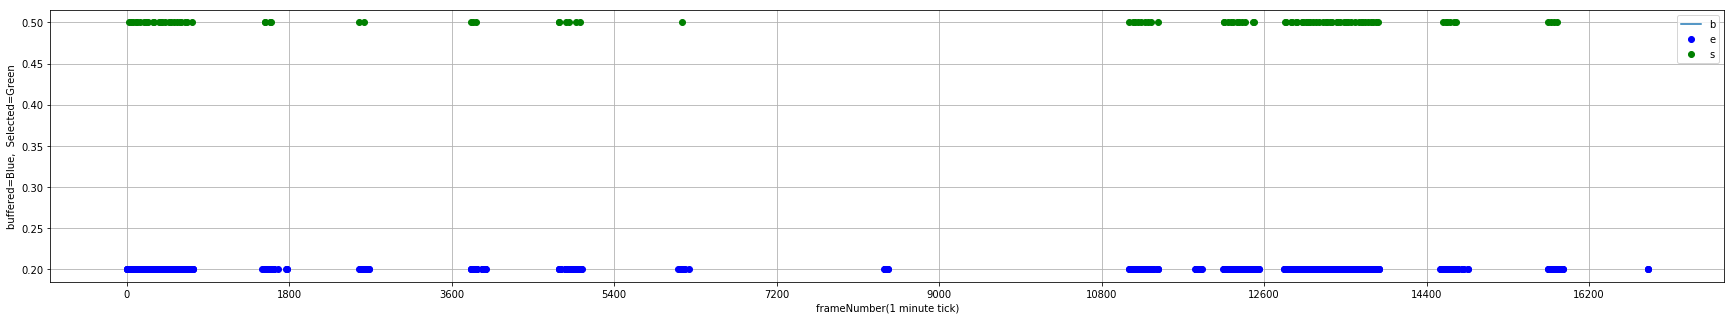

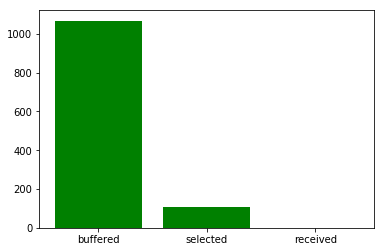

In [11]:
#Generatign FM-FrameSelection Plots

allFramesDir = '/media/hooman/1tb-ssd-hs3-linu/BucketTracking-Project/hydraulic/frameSelection/try7_t40b10_0,150,200,125,1,outSideImageObjRemoved/allFrames_1004_ESP_S04_017/'

bufferedFramesDir = '/media/hooman/1tb-ssd-hs3-linu/BucketTracking-Project/hydraulic/frameSelection/try7_t40b10_0,150,200,125,1,outSideImageObjRemoved/bufferedFrames_1004_ESP_S04_017/'

selectedFramesDir = '/media/hooman/1tb-ssd-hs3-linu/BucketTracking-Project/hydraulic/frameSelection/try7_t40b10_0,150,200,125,1,outSideImageObjRemoved/selectedFrames_1004_ESP_S04_017/'

vidName = '1004_ESP_S04_017_fmSelection.png'

savePath = '/media/hooman/1tb-ssd-hs3-linu/BucketTracking-Project/hydraulic/frameSelection/try7_t40b10_0,150,200,125,1,outSideImageObjRemoved/'

allFrames = []
for imName in os.listdir(allFramesDir):
    allFrames.append(int(imName.split('_')[-1][:-4]))
    
allFrames.sort()



bufferedFrames = []
for imName in os.listdir(bufferedFramesDir):
    bufferedFrames.append(int(imName.split('_')[-1][:-4]))
    
bufferedFrames.sort()




selectedFrames = []
for imName in os.listdir(selectedFramesDir):
    selectedFrames.append(int(imName.split('_')[-1][:-4]))
    
selectedFrames.sort()


plt.figure(figsize=(30,5))
ax = plt.axes()
loc = plticker.MultipleLocator(base=1800.0)
ax.xaxis.set_major_locator(loc)
ax.grid()

plt.plot(allFrames, len(allFrames) * [0], label='received')
plt.plot(bufferedFrames, len(bufferedFrames) * [0.2], 'bo', label='buffered')
plt.plot(selectedFrames, len(selectedFrames) * [0.5], 'go', label='selected')
plt.ylabel('buffered=Blue,  Selected=Green')
plt.xlabel('frameNumber(1 minute tick)')


plt.savefig(savePath + vidName)
plt.legend('best')
    
plt.show()


hsDic = {'received': len(allFrames), 'buffered':len(bufferedFrames), 'selected':len(selectedFrames)}
plt.bar(hsDic.keys(), hsDic.values(), color='g')

plt.show()

# Backhoe Shovels

## 1. creating box detector training set

In [100]:
def getAllBoundaries_backhoe(imgLabel, img=[]):
    
    boundariesDict = {}
    
    
    
    ##############################################
    ########## Reading Labeled Pixels ############
    ##############################################
    labelsDic = {
        'emptyInside' :np.where(np.all(imgLabel == emptyInside, axis=-1)),
        'case' :np.where(np.all(imgLabel == case, axis=-1)),
        'teeth' :np.where(np.all(imgLabel == teeth, axis=-1)),
        'bucketOutside':np.where(np.all(imgLabel == bucketOutside, axis=-1)),
        'sheave': np.where(np.all(imgLabel == sheave, axis=-1)),
    }
    

    

    #get the boundary for each label
    sortedLabelColsDic = {}
    sortedLabelRowsDic = {}
    for k in labelsDic.keys():
        if len(labelsDic[k][0]) > 0:
            sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic[k][0]),
            sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic[k][1]),

  
    
    ##############################################
    ############## Bucket Boundary ###############
    ##############################################
    #Get the min and max for rows and columns to caluclate bucket boundaries
    lowColVals = []
    highColVals = []
    for labV in sortedLabelColsDic.values():
        for v in labV:
            lowColVals.append(v[0])
            highColVals.append(v[len(v)-1])

    lowRowVals = []
    highRowVals = []
    for labV in sortedLabelRowsDic.values():
        for v in labV:
            lowRowVals.append(v[0])
            highRowVals.append(v[len(v)-1])

    

    #get the bucket boundary
    xmins = np.sort(np.array(lowColVals))
    xmaxs = np.sort(np.array(highColVals))
    ymins = np.sort(np.array(lowRowVals))
    ymaxs = np.sort(np.array(highRowVals))
    
    if len(xmins) > 0 and len(xmaxs) > 0 and len(ymins) > 0 and len(ymaxs) > 0 : 

        (bucket_xmin, bucket_xmax, bucket_ymin, bucket_ymax) = (xmins[0], xmaxs[len(xmaxs)-1], ymins[0], ymaxs[len(ymaxs)-1])
        
        
        croppedIm = imgLabel[0:bucket_xmax, bucket_ymin:bucket_ymax]
        
        #plt.imshow(croppedIm)
        #plt.show()
        
        labelsDic2 = {
            'rockInside' :np.where(np.all(croppedIm == rockInside, axis=-1)),
            
            'fineInside' :np.where(np.all(croppedIm == fineInside, axis=-1)),
            
            'fmInapp' :np.where(np.all(croppedIm == fmInapp, axis=-1)),
            'inapInside' :np.where(np.all(croppedIm == inapInside, axis=-1)),   
        }



        #get the boundary for each label
        sortedLabelColsDic = {}
        sortedLabelRowsDic = {}
        for k in labelsDic2.keys():
            if len(labelsDic2[k][0]) > 0:
                sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic2[k][0]),
                sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic2[k][1]),




        ##############################################
        ############## matInside Boundary ###############
        ##############################################
        #Get the min and max for rows and columns to caluclate bucket boundaries
        lowColVals = []
        highColVals = []
        for labV in sortedLabelColsDic.values():
            for v in labV:
                lowColVals.append(v[0])
                highColVals.append(v[len(v)-1])

        lowRowVals = []
        highRowVals = []
        for labV in sortedLabelRowsDic.values():
            for v in labV:
                lowRowVals.append(v[0])
                highRowVals.append(v[len(v)-1])



        #get the bucket boundary
        xmins2 = np.sort(np.array(lowColVals))
        xmaxs2 = np.sort(np.array(highColVals))
        ymins2 = np.sort(np.array(lowRowVals))
        ymaxs2 = np.sort(np.array(highRowVals))

        if len(xmins2) > 0 and len(xmaxs2) > 0 and len(ymins2) > 0 and len(ymaxs2) > 0 : 
            boundariesDict['matInside'] = [xmins2[0], xmaxs2[len(xmaxs2)-1], ymins2[0] + bucket_ymin, ymaxs2[len(ymaxs2)-1] + bucket_ymin]
        
            #if bucket_xmin > xmins[0]:
                #bucket_xmin = xmins[0]
        
        boundariesDict['bucket'] = [bucket_xmin, bucket_xmax, bucket_ymin, bucket_ymax]
        
        
        if len(img) > 0:
            cv2.rectangle(img,(bucket_ymin, bucket_xmin),(bucket_ymax, bucket_xmax),(0,255,255),3)
            
            if 'matInside' in boundariesDict:
                (xmin, xmax, ymin, ymax) = boundariesDict['matInside']
                cv2.rectangle(img,(ymin, xmin),(ymax, xmax),(0,0,255),3)

            plt.imshow(img)
            plt.show()
        
               



        return boundariesDict

In [95]:
def getAllBoundaries_backhoe_V2(imgLabel, img=[]):
    
    boundariesDict = {}
    
    
    
    ##############################################
    ########## Reading Labeled Pixels ############
    ##############################################
    labelsDic = {
        'emptyInside' :np.where(np.all(imgLabel == emptyInside, axis=-1)),
        'case' :np.where(np.all(imgLabel == case, axis=-1)),
        'teeth' :np.where(np.all(imgLabel == teeth, axis=-1)),
        'bucketOutside':np.where(np.all(imgLabel == bucketOutside, axis=-1)),
        'sheave': np.where(np.all(imgLabel == sheave, axis=-1)),
    }
    

    

    #get the boundary for each label
    sortedLabelColsDic = {}
    sortedLabelRowsDic = {}
    for k in labelsDic.keys():
        if len(labelsDic[k][0]) > 0:
            sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic[k][0]),
            sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic[k][1]),

  
    
    ##############################################
    ############## Bucket Boundary ###############
    ##############################################
    #Get the min and max for rows and columns to caluclate bucket boundaries
    lowColVals = []
    highColVals = []
    for labV in sortedLabelColsDic.values():
        for v in labV:
            lowColVals.append(v[0])
            highColVals.append(v[len(v)-1])

    lowRowVals = []
    highRowVals = []
    for labV in sortedLabelRowsDic.values():
        for v in labV:
            lowRowVals.append(v[0])
            highRowVals.append(v[len(v)-1])
            
            
            
            
   # print(sortedLabelColsDic)

    

    #get the bucket boundary
    xmins = np.sort(np.array(lowColVals))
    xmaxs = np.sort(np.array(highColVals))
    ymins = np.sort(np.array(lowRowVals))
    ymaxs = np.sort(np.array(highRowVals))
    
    if len(xmins) > 0 and len(xmaxs) > 0 and len(ymins) > 0 and len(ymaxs) > 0 : 

        (bucket_xmin, bucket_xmax, bucket_ymin, bucket_ymax) = (xmins[0], xmaxs[len(xmaxs)-1], ymins[0], ymaxs[len(ymaxs)-1])
        
        
        if 'bucketOutsideCols' in sortedLabelColsDic:
            
           # print(sortedLabelColsDic['bucketOutsideCols'][0])
            sortedBackOfShovelCols = np.sort(np.array(sortedLabelColsDic['bucketOutsideCols'][0]))
            backOfBucketMinX = sortedBackOfShovelCols[0]
            backOfBucketMaxX = sortedBackOfShovelCols[len(sortedBackOfShovelCols)-1]
            
            newMaxX = int( backOfBucketMinX + (backOfBucketMaxX - backOfBucketMinX)/2 )
            
            croppedIm = imgLabel[0:newMaxX, bucket_ymin:bucket_ymax]
            
            
        if 'teethCols' in sortedLabelColsDic:
            
           # print(sortedLabelColsDic['bucketOutsideCols'][0])
            sortedTeethCols = np.sort(np.array(sortedLabelColsDic['teethCols'][0]))
            teethMinX = sortedTeethCols[0]
            teethMaxX = sortedTeethCols[len(sortedTeethCols)-1]
            
            newMaxX = int( teethMinX + (teethMaxX - teethMinX)/2 )
            
            croppedIm = imgLabel[0:newMaxX, bucket_ymin:bucket_ymax]
            
            
        else:
            croppedIm = imgLabel[0:bucket_xmax, bucket_ymin:bucket_ymax]
        
        #plt.imshow(croppedIm)
        #plt.show()
        
        labelsDic2 = {
            'rockInside' :np.where(np.all(croppedIm == rockInside, axis=-1)),
            
            'fineInside' :np.where(np.all(croppedIm == fineInside, axis=-1)),
            
            'fmInapp' :np.where(np.all(croppedIm == fmInapp, axis=-1)),
            'inapInside' :np.where(np.all(croppedIm == inapInside, axis=-1)), 
            'shadow' :np.where(np.all(croppedIm == shadow, axis=-1)), 
            
        }
        
        
        #print(labelsDic2)



        #get the boundary for each label
        sortedLabelColsDic = {}
        sortedLabelRowsDic = {}
        for k in labelsDic2.keys():
            if len(labelsDic2[k][0]) > 0:
                sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic2[k][0]),
                sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic2[k][1]),




        ##############################################
        ############## matInside Boundary ###############
        ##############################################
        #Get the min and max for rows and columns to caluclate bucket boundaries
        lowColVals = []
        highColVals = []
        for labV in sortedLabelColsDic.values():
            for v in labV:
                lowColVals.append(v[0])
                highColVals.append(v[len(v)-1])

        lowRowVals = []
        highRowVals = []
        for labV in sortedLabelRowsDic.values():
            for v in labV:
                lowRowVals.append(v[0])
                highRowVals.append(v[len(v)-1])



        #get the bucket boundary
        xmins2 = np.sort(np.array(lowColVals))
        xmaxs2 = np.sort(np.array(highColVals))
        ymins2 = np.sort(np.array(lowRowVals))
        ymaxs2 = np.sort(np.array(highRowVals))

        if len(xmins2) > 0 and len(xmaxs2) > 0 and len(ymins2) > 0 and len(ymaxs2) > 0 : 
            boundariesDict['matInside'] = [xmins2[0], xmaxs2[len(xmaxs2)-1], ymins2[0] + bucket_ymin, ymaxs2[len(ymaxs2)-1] + bucket_ymin]
        
            #if bucket_xmin > xmins[0]:
                #bucket_xmin = xmins[0]
                
                
            if bucket_xmin > xmins2[0]:
                bucket_xmin = xmins2[0]
        
        boundariesDict['bucket'] = [bucket_xmin, bucket_xmax, bucket_ymin, bucket_ymax]
        
        
        if len(img) > 0:
            cv2.rectangle(img,(bucket_ymin, bucket_xmin),(bucket_ymax, bucket_xmax),(0,255,255),3)
            
            if 'matInside' in boundariesDict:
                (xmin, xmax, ymin, ymax) = boundariesDict['matInside']
                cv2.rectangle(img,(ymin, xmin),(ymax, xmax),(0,0,255),3)

            plt.imshow(img)
            plt.show()
        
               



        return boundariesDict

In [ ]:
#Finding matInside and bucket boundaries. For Backhoe
rows = []

#for fileName in os.listdir(labelsPath):
for fileName in os.listdir('/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/backhoe/boxDetector_V2_multiclass_Cable/try1/dataFor__boxDetector_V2_multiclass_backhoe__try1/validationSet/'):
    
    imgFilePath = imagesPath + fileName
    
    imgLabel = imread(labelsPath + fileName)
    
    #I added this for try3  ssd-multiclass-tries 1 and 2 didnt have this.
    imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)
    
    print("processing file: " + fileName)
    
    
    #I used this for most images in training FMDL3.1 except the some cases where the inside material is defined by back of bucket. But the V2 should work with everything
    allBoundaries = getAllBoundaries_backhoe(imgLabel)
    
    #Tried this for all reprocesseds.
    #allBoundaries = getAllBoundaries_backhoe_V2(imgLabel)
    
    
    
    
    if allBoundaries:
        if('bucket' in allBoundaries):
            # write up the rows
            (xmin, xmax, ymin, ymax) = allBoundaries['bucket']
            row = fileName + "," + imgFilePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "bucket" + "\n"

            rows.append(row)

        else:
            print("ERROR: Found no bucket boundary.\n")



        if('matInside' in allBoundaries):
            if len(allBoundaries['matInside']) == 4:
                (xmin, xmax, ymin, ymax) = allBoundaries['matInside']
                row = fileName + "," + imgFilePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "matInside" + "\n"
            else:
                print("ERROR: Found more than one matInside Boundaries. This should NOT happen\n")

            rows.append(row)        

    
        
# shuffle the rows
#from random import shuffle
#shuffle(rows)       
        
#print("processes "+ str(len(rows)) + " rows\n")

In [110]:
writeRowsToCsv(rows, "/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/backhoe/boxDetector_V2_multiclass_Cable/try1/dataFor__boxDetector_V2_multiclass_backhoe__try1/negetiveExamplesForTraining.csv")

wrote 65 rows to csv file



In [ ]:
# (singleImage for Debug) Finding matInside and bucket boundaries. For Backhoe

#fileName = '1_20180703-100000_1001n0_23970.png'
#fileName = '1_20180704-200300_1001n0_9159.png'
#fileName = '1_20180703-101500_1001n0_2971.png'
#fileName = '1_20180703-103000_1001n0_8378.png'
#fileName = '1_20180704-084800_1001n0_694.png'
fileName = '1_20180703-213900_1001n0_1725.png'
    
imgFilePath = imagesPath + fileName

imgLabel = imread(labelsPath + fileName)
img = imread(imagesPath + fileName)

#I added this for try3  ssd-multiclass-tries 1 and 2 didnt have this.
imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)

print("processing file: " + fileName)

allBoundaries = getAllBoundaries_backhoe_V2(imgLabel, img)
rows = [] 

if allBoundaries:
    if('bucket' in allBoundaries):
        # write up the rows
        (xmin, xmax, ymin, ymax) = allBoundaries['bucket']
        row = fileName + "," + imgFilePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "bucket" + "\n"

        rows.append(row)

    else:
        print("ERROR: Found no bucket boundary.\n")


    if('matInside' in allBoundaries):
        if len(allBoundaries['matInside']) == 4:
            (xmin, xmax, ymin, ymax) = allBoundaries['matInside']
            
            row = fileName + "," + imgFilePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "matInside" + "\n"
        else:
            print("ERROR: Found more than one matInside Boundaries. This should NOT happen\n")

        rows.append(row)  


## 2. creating roi delineator training set

In [ ]:
#creating full size masks

imagesPath = '/home/hooman/backhoeOpticalScene/roiDelineators/try4-csvFrom-ssdTry3-withInapp-reducedNumberOfempyBuckets-BatchSize4/images/'
labelsPath = '/home/hooman/backhoeOpticalScene/roiDelineators/try4-csvFrom-ssdTry3-withInapp-reducedNumberOfempyBuckets-BatchSize4/labels/'

masksSavePath = '/home/hooman/backhoeOpticalScene/roiDelineators/try4-csvFrom-ssdTry3-withInapp-reducedNumberOfempyBuckets-BatchSize4/full-masks_withInapp/'

overlaySavePath = '/home/hooman/backhoeOpticalScene/roiDelineators/try4-csvFrom-ssdTry3-withInapp-reducedNumberOfempyBuckets-BatchSize4/full-overlays_withInapp/'


for fileName in os.listdir('/home/hooman/backhoeOpticalScene/roiDelineators/try4-csvFrom-ssdTry3-withInapp-reducedNumberOfempyBuckets-BatchSize4/negImagesRemoved_croppedOverlayOfMasks/'):

    print("prcessing imgId: " + fileName + "\n")

    #read the image from csv row
    img = imread(imagesPath + fileName)
    
    imgLabel = imread(labelsPath + fileName)
    imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)


    #Create a mas from cropped image
    labelsDic = {
        'rockInside' : np.where(np.all(imgLabel == rockInside, axis=-1)),
        'fineInside' : np.where(np.all(imgLabel == fineInside, axis=-1)),
        'fmInapp'    : np.where(np.all(imgLabel == fmInapp, axis=-1)),
    }


    mask = np.zeros((imgLabel.shape[0], imgLabel.shape[1]), bool)
    mask2 = np.zeros((imgLabel.shape[0], imgLabel.shape[1]), bool)
    mask.dtype='uint8'
    mask2.dtype='uint8'

    mask[labelsDic['fineInside']] = 1
    mask[labelsDic['rockInside']] = 1
    mask[labelsDic['fmInapp']] = 1



    #Remove the points that are not in the largest contour from mask
    _,contours,_ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE, offset=(0, 0))

    if contours:
        max_cnt = max(contours, key=cv2.contourArea)

        # cv2.drawContours(mask2, max_cnt, -1, 1, cv2.FILLED, 8) thos does NOT fill up the inside of contour
        cv2.drawContours(mask2, [max_cnt], -1, 1, cv2.FILLED, 8)


    #if no contours found, mask2 will remain as all 0s
    cv2.imwrite(masksSavePath + fileName, mask2)


    #get the overlay
    maskOverlay = cv2.cvtColor(mask2*255, cv2.COLOR_GRAY2BGR)
    maskOverlay[:,:,0] = 0
    maskOverlay[:,:,2] = 0

    opacity = 0.2
    cv2.addWeighted(maskOverlay, opacity, img, 1 - opacity, 0, img)

    cv2.imwrite(overlaySavePath + fileName, img)


    '''        
    plt.imshow(mask)
    plt.title('mask1')
    plt.show()

    plt.imshow(mask2)
    plt.title('mask2 final')
    plt.show()

    plt.imshow(img)
    plt.title('overlayed img')
    plt.show()
    '''

In [25]:
gt_rows = readCsvRows("/home/hooman/backhoeOpticalScene/boxDetectors/try3_ssdMultiClass_withInappInMatInside_upsideDownShovelsRemoved/fineAndRockAndInapInMatInside_backhoe_shuffled_UpsideDownShovelsRemoved.csv")

read 1332 rows


In [ ]:
# random crop the FULL masks create above. You need FULL images and Masks here not cropped. 
from PIL import Image


offsetsToApply = [50,75, 100, 125, 150, 175]

dirToSaveImages = '/home/hooman/backhoeOpticalScene/roiDelineators/try4-csvFrom-ssdTry3-withInapp-reducedNumberOfempyBuckets-BatchSize4/randomCroppedImages/'

dirToSaveMasks = '/home/hooman/backhoeOpticalScene/roiDelineators/try4-csvFrom-ssdTry3-withInapp-reducedNumberOfempyBuckets-BatchSize4/randomCroppedMasks/'


dirToReadImages = '/home/hooman/backhoeOpticalScene/roiDelineators/try4-csvFrom-ssdTry3-withInapp-reducedNumberOfempyBuckets-BatchSize4/images/'

dirToReadMasks = '/home/hooman/backhoeOpticalScene/roiDelineators/try4-csvFrom-ssdTry3-withInapp-reducedNumberOfempyBuckets-BatchSize4/full-masks_withInapp/'




for row in gt_rows[1:len(gt_rows)-1]:
    
    vals = row.split(',')

    if os.path.exists(dirToReadImages + vals[0]) and os.path.exists(dirToReadMasks + vals[0]):
        
        try:
            imgPil = Image.open(dirToReadImages + vals[0])
            img = np.array(imgPil) 
            imgPil.close()

            labelPil = Image.open(dirToReadMasks + vals[0])
            label = np.array(labelPil)
            labelPil.close()



            xmin, xmax, ymin, ymax = vals[2:6]

            if xmin != "" and xmax != "" and ymin != "" and ymax != "":
                (xmin, xmax, ymin, ymax) = (int(round(float(xmin))), int(round(float(xmax))), int(round(float(ymin))), int(round(float(ymax))))

                imgWidth = img.shape[1]
                imgHeight = img.shape[0]


                imgAct = img[ymin:ymax, xmin:xmax,]
                labelAct = label[ymin:ymax, xmin:xmax]

                if imgAct.shape[0] > 0 and imgAct.shape[1] > 0 and labelAct.shape[0] > 0 and labelAct.shape[1] > 0: 
                    cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '_RCAct.png'), imgAct)
                    cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '_RCAct.png'), labelAct)



                for offset in offsetsToApply:

                    img1 =     img[ymin + offset:ymax + offset, xmin:xmax]
                    label1 = label[ymin + offset:ymax + offset, xmin:xmax]

                    if img1.shape[0] > 0 and img1.shape[1] > 0 and label1.shape[0] > 0 and label1.shape[1] > 0: 
                        cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '') + '_RC' + str(offset) + '_1.png', img1)
                        cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '') + '_RC' + str(offset) + '_1.png', label1)




                    img2 =     img[ymin:ymax, xmin + offset:xmax + offset]
                    label2 = label[ymin:ymax, xmin + offset:xmax + offset]

                    if img2.shape[0] > 0 and img2.shape[1] > 0 and label2.shape[0] > 0 and label2.shape[1] > 0: 
                        cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '') + '_RC' + str(offset) + '_2.png', img2)
                        cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '') + '_RC' + str(offset) + '_2.png', label2)




                    if (ymin - offset) > 0:
                        img3 =     img[ymin - offset:ymax - offset, xmin:xmax]
                        label3 = label[ymin - offset:ymax - offset, xmin:xmax]

                        if img3.shape[0] > 0 and img3.shape[1] > 0 and label3.shape[0] > 0 and label3.shape[1] > 0: 
                            cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '') + '_RC' + str(offset) + '_3.png', img3)
                            cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '') + '_RC' + str(offset) + '_3.png', label3)



                    if (xmin - offset) > 0:
                        img4 =     img[ymin:ymax, xmin - offset:xmax - offset]
                        label4 = label[ymin:ymax, xmin - offset:xmax - offset]

                        if img4.shape[0] > 0 and img4.shape[1] > 0 and label4.shape[0] > 0 and label4.shape[1] > 0: 

                            cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '') + '_RC' + str(offset) + '_4.png', img4)
                            cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '') + '_RC' + str(offset) + '_4.png', label4)
        
        except:
            print("coud not open file: " + vals[0] + "\n")

    else:
        print("one of the provided directories doesn't exist")

# Calculating Performance for Bucket Boundaries

#### Step 1 Create binary masks from predictions:
    
    # read the prediction results from csv
    rows = readCsvRows("/home/hooman/dataPreparation/testSet_noBbxImagesIncluded.csv")
    
    #produce binary masks
    for row in rows[1:]:
        getBbxMask(row, True, gtMaskPath)
        
#### Step 2 Load the predictions csv and the testSet csv using readCsvRows method (according to above)
#### Step 3 Call the calcPerformance method providing it with the predicted and gt rows, and the paths to where the binary masks are stored.

    Example: 
    _,_,_,_ = calcPerformance(pred_rows[1:len(pred_rows)-1], gt_rows[1:len(gt_rows)-1], "/home/hooman/mobileNet_try2/result_defaultParams/predictedBbMasks/", gtMaskPath)

 ####  <font color='red'>Note that: </font>  
1. There is a slash required at the end of paths. 
2. When you provide the rows to the calcPerformance function, make sure you index in a way that the first, and last rows in the csv are igoned. This is because when you use the readCsvRows function the first row takes column headers and the last row contains an empty line.

3. If your gt and prediction csv's do not match you need to create a dictionary for your predictions and suply that aswell. 
        existNetRowsDict = {}
        for row in pred_rows[1:60]:
            vals = row.split(',')
            existNetRowsDict[vals[0]] = vals[1:5]
            
4. The call then becomes:<br>
           _,_,_,_ = calcPerformance(pred_rows[1:len(pred_rows)-1], gt_rows[1:len(gt_rows)-1],  "/home/hooman/resultsFromExistingNetwork/testSetFregmentationResults/predictedBinMasks/", gtMaskPath, predictedRowDict=existNetRowsDict)

In [26]:
gt_rows = readCsvRows("/home/hooman/dataPreparation/testSet_noBbxImagesIncluded_singleClass_bucketBound_NoTeeth_NoCase.csv")

read 256 rows


In [19]:
pred_rows = readCsvRows("/home/hooman/ssdMobileNet_multiClass_bucket_rockInside_FineInside_NoTeeth_NoCase/try1/result_minScore09_ckpt-72237/result_minScore09_ckpt-72237.csv")

read 256 rows


In [23]:
_,_,_,_ = calcPerformance(pred_rows[1:len(pred_rows)-1], gt_rows[1:len(gt_rows)-1],  "/home/hooman/ssdMobileNet_multiClass_bucket_rockInside_FineInside_NoTeeth_NoCase/try1/result_minScore09_ckpt-72237/predictedBbMasks/", gtMaskPath)

using pred_rows
Processed 254 rows:
-Sensitivity: 0.934945945727 ,    -Specificity: 0.924003648549 ,    -Precision: 0.83138116511 ,    -F_score: 0.880127406644


# Generating Binary Bounding Box Masks
These are needed to quickly calcualte True/False Positives/Negetives using metrix multiplication of masks.
You can visualize the generated binary masks using:



    for row in rows[1:]:
        m = getBbxMask(row, False, "/home/hooman/mobileNet_try2/result_defaultParams/predictedBbMasks/", True)
        plt.imshow(m)
        plt.show()

In [ ]:
rows = readCsvRows("/home/hooman/ssdMobileNet_multiClass_bucket_rockInside_FineInside_NoTeeth_NoCase/try1/result_defaultParams_ckpt-72237/result_defaultParams_ckpt-72237.csv")

In [ ]:
for row in rows[1:len(rows)-1]:
    getBbxMask(row, True, "/home/hooman/ssdMobileNet_multiClass_bucket_rockInside_FineInside_NoTeeth_NoCase/try1/result_defaultParams_ckpt-72237/predictedBbMasks/", False)

# Image Augmentation using imgaug

In [3]:
# Get and resize train images and masks (same as in unet notebook except just one image)
TRAIN_PATH = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/UNet_Hydraulics/hsUnet_try0_sameNetworkAs_try21_1chan_roiDelineatorVersion-1/dataFor__hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/finalTrainingSet_images_fullSize/'

MASK_PATH  = '/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/FMDL_3.1/UNet_Hydraulics/hsUnet_try0_sameNetworkAs_try21_1chan_roiDelineatorVersion-1/dataFor__hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/finalTrainingSet_masks_fullSize/'

from skimage import io

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

train_ids = os.listdir(TRAIN_PATH)
train_ids = train_ids[4:6]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

for n, fileName in tqdm(enumerate(train_ids), total=len(train_ids)):
    img = imread(TRAIN_PATH + fileName)[:,:,:IMG_CHANNELS]
    
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    
    mask_ = imread(MASK_PATH + fileName )

    #expand dim just converts the (h,w,) image to (h,w,1) look at above for experimentation with np.expand_dim
    mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                  preserve_range=True), axis=-1)

    #hs this in effect adds all the masks together into one mask of the same size.Since masks are bindary.
    mask = np.maximum(mask, mask_)
    Y_train[n] = mask

100%|██████████| 2/2 [00:00<00:00, 44.61it/s]


In [ ]:
# Check if the data we just loaded looks all right
ix = 0
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()

In [4]:
# library's example of mask augmentation

import imgaug as ia
from imgaug import augmenters as iaa
import imageio
import numpy as np

ia.seed(1)


image = X_train[0]
segmap = Y_train[0]
segmap = ia.SegmentationMapOnImage(segmap, shape=image.shape, nb_classes=1+1)

# Define our augmentation pipeline.
seq = iaa.Sequential([
    iaa.Dropout([0.05, 0.2]),      # drop 5% or 20% of all pixels
    iaa.Sharpen((0.0, 1.0)),       # sharpen the image
    iaa.Affine(rotate=(-45, 45)),  # rotate by -45 to 45 degrees (affects heatmaps)
    iaa.ElasticTransformation(alpha=50, sigma=5)  # apply water effect (affects heatmaps)
], random_order=True)

# Augment images and heatmaps.
images_aug = []
segmaps_aug = []
for _ in range(5):
    seq_det = seq.to_deterministic()
    images_aug.append(seq_det.augment_image(image))
    segmaps_aug.append(seq_det.augment_segmentation_maps([segmap])[0])

# We want to generate an image of original input images and heatmaps before/after augmentation.
# It is supposed to have five columns: (1) original image, (2) augmented image,
# (3) augmented heatmap on top of augmented image, (4) augmented heatmap on its own in jet
# color map, (5) augmented heatmap on its own in intensity colormap,
# We now generate the cells of these columns.
#
# Note that we add a [0] after each heatmap draw command. That's because the heatmaps object
# can contain many sub-heatmaps and hence we draw command returns a list of drawn sub-heatmaps.
# We only used one sub-heatmap, so our lists always have one entry.
cells = []
for image_aug, segmap_aug in zip(images_aug, segmaps_aug):
    cells.append(image)                                      # column 1
    cells.append(segmap.draw_on_image(image))                # column 2
    cells.append(image_aug)                                  # column 3
    cells.append(segmap_aug.draw_on_image(image_aug))        # column 4
    cells.append(segmap_aug.draw(size=image_aug.shape[:2]))  # column 5

# Convert cells to grid image and save.
grid_image = ia.draw_grid(cells, cols=5)
imageio.imwrite("/home/hooman/sdc1Storage/FM_PROJECT/FMDL_3.1/UNet_Hydraulics/hsUnet_try0_sameNetworkAs_try21_1chan_roiDelineatorVersion-1/dataFor__hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/example_segmaps.jpg", grid_image)

In [ ]:
# Hs example of mask augmentation

import imgaug as ia
from imgaug import augmenters as iaa
import imageio
import numpy as np

ia.seed(1)


image = X_train[1]
segmap = Y_train[1]
segmap = ia.SegmentationMapOnImage(segmap, shape=image.shape, nb_classes=1+1)



X_train_final_augmented = []
Y_train_final_augmented= []


cropAug = iaa.Sequential([
    iaa.CropAndPad(
    percent=(-0.3, 0.3),
    pad_mode=["edge"]),
], random_order=False)


scaleAug = iaa.Sequential([
    iaa.Scale((0.5, 1.0)),
], random_order=False)


rotateAug = iaa.Sometimes(0.5, iaa.Affine(rotate=(-10, 10)))

dropOutAug = iaa.Sometimes(0.5, iaa.Dropout([0.05, 0.1]))

pixelValAddAug = iaa.Sometimes(0.5, iaa.Add((-40,40)))

sharpenAug = iaa.Sometimes(0.2, iaa.Sharpen(alpha=(0.05, 0.2)))

contrastNormAug = iaa.Sometimes(0.2, iaa.ContrastNormalization((0.5, 1.5)))


    
# X translation
augResIm = iaa.Affine(translate_px={"x":-5}).augment_image(image)
augResMask = iaa.Affine(translate_px={"x":-5}).augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))

augResIm = iaa.Affine(translate_px={"x":-10}).augment_image(image)
augResMask = iaa.Affine(translate_px={"x":-10}).augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))
   
augResIm = iaa.Affine(translate_px={"x":-15}).augment_image(image)
augResMask = iaa.Affine(translate_px={"x":-15}).augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))


augResIm = iaa.Affine(translate_px={"x":5}).augment_image(image)
augResMask = iaa.Affine(translate_px={"x":5}).augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))
   
    
augResIm = iaa.Affine(translate_px={"x":10}).augment_image(image)
augResMask = iaa.Affine(translate_px={"x":10}).augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))


augResIm = iaa.Affine(translate_px={"x":15}).augment_image(image)
augResMask = iaa.Affine(translate_px={"x":15}).augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))



# Y translation
augResIm = iaa.Affine(translate_px={"y":5}).augment_image(image)
augResMask = iaa.Affine(translate_px={"y":5}).augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))


augResIm = iaa.Affine(translate_px={"y":10}).augment_image(image)
augResMask = iaa.Affine(translate_px={"y":10}).augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))

augResIm = iaa.Affine(translate_px={"y":15}).augment_image(image)
augResMask = iaa.Affine(translate_px={"y":15}).augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))

#horizantal flip
augResIm = iaa.Fliplr(1).augment_image(image)
augResMask = iaa.Fliplr(1).augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))

    
#Random crop
cropAug_det = cropAug.to_deterministic()
augResIm = cropAug_det.augment_image(image)
augResMask = cropAug_det.augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))



#Random rotate or elastically transform
rotateAug_det = rotateAug.to_deterministic()
augResIm = rotateAug_det.augment_image(image)
augResMask = rotateAug_det.augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))

#drop some pixels at random 50% of the time
dropOutAug_det = dropOutAug.to_deterministic()
augResIm = dropOutAug_det.augment_image(image)
augResMask = dropOutAug_det.augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))


# add rand nb between -40,40 to some pixels 50% of the time 
pixelValAddAug_det = pixelValAddAug.to_deterministic()
augResIm = pixelValAddAug_det.augment_image(image)
augResMask = pixelValAddAug_det.augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))


#sharpen images 20% of the time
sharpenAug_det = sharpenAug.to_deterministic()
augResIm = sharpenAug_det.augment_image(image)
augResMask = sharpenAug_det.augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))


#contrastNorm images 20% of the time
contrastNormAug_det = contrastNormAug.to_deterministic()
augResIm = contrastNormAug_det.augment_image(image)
augResMask = contrastNormAug_det.augment_segmentation_maps([segmap])[0]
X_train_final_augmented.append(augResIm)
segmaps_aug.append(augResMask.get_arr_int()[...,np.newaxis].astype(np.bool))


cells = []
for image_aug, segmap_aug in zip(X_train_final_augmented, segmaps_aug):
    imshow(image_aug)
    plt.show()
    imshow(np.squeeze(segmap_aug))
    plt.show()

In [ ]:
# hs list of all augmentations I've looked at
seq = iaa.Sequential([
    iaa.Dropout([0.0, 0.2]),
    iaa.Add((-40,40)),
    iaa.AddElementwise((-10, 10)),
    iaa.AdditiveGaussianNoise(scale=0.1*255),
    iaa.GaussianBlur(sigma=1.0),
    iaa.Sharpen(alpha=0.2),
    iaa.ElasticTransformation(alpha=50, sigma=5),
    iaa.Scale((0.5, 1.0)),
    iaa.CropAndPad(
    percent=(-0.3, 0.3),
    pad_mode=["constant"],
    pad_cval=(0, 128)),
    iaa.Fliplr(0.5),
    iaa.ContrastNormalization((0.5, 1.5)),
    iaa.Affine(rotate=(-10, 10)),  # rotate by -10 to 10 degrees (affects heatmaps)
    iaa.Affine(translate_px={"x":-5}),
    iaa.Affine(translate_px={"x":-10}),
    iaa.Affine(translate_px={"x":-15}),
    iaa.Affine(translate_px={"x":5}),
    iaa.Affine(translate_px={"x":10}),
    iaa.Affine(translate_px={"x":15}),
    iaa.Affine(translate_px={"y":5}),
    iaa.Affine(translate_px={"y":10}),
    iaa.Affine(translate_px={"y":15}),
], random_order=True)

## Calculating performance for only the images that the existing networks can find bucket boundaries in

In [27]:
gt_rows = readCsvRows("/home/hooman/dataPreparation/testSet_noBbxImagesIncluded_singleClass_bucketBound_NoTeeth_NoCase.csv")

read 256 rows


In [28]:
ex_rows = readCsvRows("/home/hooman/resultsFromExistingNetwork/testSetFregmentationResults/testSetOutputConverted_noBoundariesRemoved.csv")

read 62 rows


In [30]:
pred_rows = readCsvRows("/home/hooman/ssdMobileNet_multiClass_bucket_rockInside_FineInside_NoTeeth_NoCase/try1/result_minScore09_ckpt-72237/result_minScore09_ckpt-72237.csv")

read 256 rows


In [31]:
#Get PredictRowDictionary
predDict = {}
for row in pred_rows[1:255]:
    vals = row.split(',')
    predDict[vals[0]] = vals[2:6]
    
existNetRowsFromPredDict = {}
for row in ex_rows[1:61]:
    vals = row.split(',')
    existNetRowsFromPredDict[vals[0]] = predDict[vals[0]]
    
print("preDict has: " + str(len(predDict)) + " rows")
print("existNetRowsFromPredDict has: " + str(len(existNetRowsFromPredDict)) + " rows")

preDict has: 254 rows
existNetRowsFromPredDict has: 60 rows


In [32]:
_,_,_,_ = calcPerformance(pred_rows[1:len(pred_rows)-1], gt_rows[1:len(gt_rows)-1], "/home/hooman/ssdMobileNet_multiClass_bucket_rockInside_FineInside_NoTeeth_NoCase/try1/result_minScore09_ckpt-72237/predictedBbMasks/", gtMaskPath, predictedRowDict=existNetRowsFromPredDict)

using predictedRowDict
Processed 60 rows:
-Sensitivity: 0.871578825859 ,    -Specificity: 0.900943918483 ,    -Precision: 0.891197477337 ,    -F_score: 0.881278979639


In [ ]:
_,_,_,_ = calcPerformance(pred_rows[1:len(pred_rows)-1], gt_rows[1:len(gt_rows)-1],  "/home/hooman/ssdMobileNet_multiClass_bucket_rockInside_FineInside_NoTeeth_NoCase/try1/result_defaultParams_ckpt-72237/predictedBbMasks/", gtMaskPath)

# Calculating Performance for inside Bucket Delineations

In [ ]:
# loading and displaying saved single channel U-Net resutls
unet_pathToSavedResults = '/home/hooman/UNet/vesUnet_try1/predicted6chanImages/'
unet_pathTo1ChanLabels = '/home/hooman/dataPreparation/hsTestSet/masks0PaddedForUNet/'
unet_pathToTestImages = '/home/hooman/dataPreparation/hsTestSet/images0PaddedForUNet/'

for imgId in os.listdir(unet_pathToTestImages):
    
    img = imread(unet_pathToTestImages + imgId)
    label = imread(unet_pathTo1ChanLabels + imgId)
    pred = imread(unet_pathToSavedResults + imgId)
    
    
    imshow(img)
    plt.title('image')
    plt.show()
        
    imshow(label)
    plt.title('label')
    plt.show()
    
    imshow(pred)
    plt.title('pred')
    plt.show()

In [ ]:
_,_,_,_ = calcPerformance_insideBucket_multiClass('/home/hooman/UNet/hsUnet_try2/predicted6chanImages_cropped/', '/home/hooman/dataPreparation/hsTestSet/cropped/croppedMasks_resized128-160/')

In [ ]:
# calculating performance for hsUNet style singleClass
unet_pathToSavedResults = '/home/hooman/UNet/hsUnet_try14/predicted1chanImages/'
unet_pathTo1ChanLabelsMasks = '/home/hooman/dataPreparation/hsTestSet/cropped/28by28Masks/croppedMask_withInapp_mistakesRemoved/'
verbose = False


total_tn = 0
total_tp = 0
total_fn = 0
total_fp = 0

rowCount = 0


for imgId in os.listdir(unet_pathTo1ChanLabelsMasks):
    
    label = imread(unet_pathTo1ChanLabelsMasks + imgId)
    pred = imread(unet_pathToSavedResults + imgId)

    labelMask = label.astype(bool)
    predMask = pred.astype(bool)


    pos_preds = np.where(predMask == 1)
    neg_preds = np.where(predMask == 0)

    pos_overlap = predMask * labelMask
    neg_overlap = np.logical_not(predMask) * np.logical_not(labelMask)


    if verbose==True:
        imshow(label)
        plt.title('label')
        plt.show()

        imshow(labelMask)
        plt.title('labelMask')
        plt.show()


        imshow(pred)
        plt.title('pred')
        plt.show()

        imshow(predMask)
        plt.title('pred')
        plt.show()



    tp = np.count_nonzero(pos_overlap)
    tn = np.count_nonzero(neg_overlap)
    fp = len(pos_preds[0]) - tp
    fn = len(neg_preds[0]) - tn

    total_fp += fp
    total_fn += fn
    total_tp += tp
    total_tn += tn

    rowCount += 1



sensitivity = float(total_tp) / (total_tp + total_fn)
specificity = float(total_tn) / (total_tn + total_fp)
precision = float(total_tp) / (total_tp + total_fp)
f_score = 2 * precision * sensitivity / (precision + sensitivity)

print("-Sensitivity: " + str(sensitivity) +
      " ,    -Specificity: " + str(specificity) +
      " ,    -Precision: " + str(precision) +
      " ,    -F_score: " + str(f_score)
     )

In [ ]:
# calculating performance for multi-class predictions using single class labels    
unet_pathToSavedResults = '/home/hooman/UNet/vesUnet_try1/predicted6chanImages_cropped/'
unet_pathTo1ChanLabels = '/home/hooman/dataPreparation/hsTestSet/cropped/croppedMasks_resized128-160/'
verbose = False


total_tn = 0
total_tp = 0
total_fn = 0
total_fp = 0

rowCount = 0


for imgId in os.listdir(unet_pathTo1ChanLabels):
    
    label = imread(unet_pathTo1ChanLabels + imgId)
    labelMask = label.astype(bool)
    
    
    pred = imread(unet_pathToSavedResults + imgId)
    predMask = np.zeros((pred.shape[0], pred.shape[1]), bool)
    predPixels = np.where(pred == 2)
    predMask[predPixels] = 1


    pos_preds = np.where(predMask == 1)
    neg_preds = np.where(predMask == 0)

    pos_overlap = predMask * labelMask
    neg_overlap = np.logical_not(predMask) * np.logical_not(labelMask)


    if verbose==True:
        imshow(label)
        plt.title('label')
        plt.show()

        imshow(labelMask)
        plt.title('labelMask')
        plt.show()


        imshow(pred)
        plt.title('pred')
        plt.show()

        imshow(predMask)
        plt.title('pred')
        plt.show()



    tp = np.count_nonzero(pos_overlap)
    tn = np.count_nonzero(neg_overlap)
    fp = len(pos_preds[0]) - tp
    fn = len(neg_preds[0]) - tn

    total_fp += fp
    total_fn += fn
    total_tp += tp
    total_tn += tn

    rowCount += 1



sensitivity = float(total_tp) / (total_tp + total_fn)
specificity = float(total_tn) / (total_tn + total_fp)
precision = float(total_tp) / (total_tp + total_fp)
f_score = 2 * precision * sensitivity / (precision + sensitivity)

print("-Sensitivity: " + str(sensitivity) +
      " ,    -Specificity: " + str(specificity) +
      " ,    -Precision: " + str(precision) +
      " ,    -F_score: " + str(f_score)
     )

# <font color='red'> Sandbox Area (DO NOT DELETE)

In [ ]:
# Hs example of mask augmentation on several images

import imgaug as ia
from imgaug import augmenters as iaa
import imageio
import numpy as np

ia.seed(1)



images_aug = []
segmaps_aug = []


cropAug = iaa.Sequential([
    iaa.CropAndPad(
    percent=(-0.3, 0.3),
    pad_mode=["edge"]),
], random_order=False)


scaleAug = iaa.Sequential([
    iaa.Scale((0.5, 1.0)),
], random_order=False)


rotateAug = iaa.Sometimes(0.5, iaa.Affine(rotate=(-10, 10)))

dropOutAug = iaa.Sometimes(0.5, iaa.Dropout([0.05, 0.1]))

pixelValAddAug = iaa.Sometimes(0.5, iaa.Add((-40,40)))

sharpenAug = iaa.Sometimes(0.2, iaa.Sharpen(alpha=(0.05, 0.2)))

contrastNormAug = iaa.Sometimes(0.2, iaa.ContrastNormalization((0.5, 1.5)))



for n, fileName in tqdm(enumerate(train_ids), total=len(train_ids)):
    image = X_train[n]
    segmap = Y_train[n]
    segmap = ia.SegmentationMapOnImage(segmap, shape=image.shape, nb_classes=1+1)
    
    
    #add original images too
    

    
    # X translation
    images_aug.append(iaa.Affine(translate_px={"x":-5}).augment_image(image))
    segmaps_aug.append(iaa.Affine(translate_px={"x":-5}).augment_segmentation_maps([segmap])[0])

    images_aug.append(iaa.Affine(translate_px={"x":-10}).augment_image(image))
    segmaps_aug.append(iaa.Affine(translate_px={"x":-10}).augment_segmentation_maps([segmap])[0])


    images_aug.append(iaa.Affine(translate_px={"x":-15}).augment_image(image))
    segmaps_aug.append(iaa.Affine(translate_px={"x":-15}).augment_segmentation_maps([segmap])[0])

    images_aug.append(iaa.Affine(translate_px={"x":5}).augment_image(image))
    segmaps_aug.append(iaa.Affine(translate_px={"x":5}).augment_segmentation_maps([segmap])[0])

    images_aug.append(iaa.Affine(translate_px={"x":10}).augment_image(image))
    segmaps_aug.append(iaa.Affine(translate_px={"x":10}).augment_segmentation_maps([segmap])[0])

    images_aug.append(iaa.Affine(translate_px={"x":15}).augment_image(image))
    segmaps_aug.append(iaa.Affine(translate_px={"x":15}).augment_segmentation_maps([segmap])[0])



    # Y translation
    images_aug.append(iaa.Affine(translate_px={"y":5}).augment_image(image))
    segmaps_aug.append(iaa.Affine(translate_px={"y":5}).augment_segmentation_maps([segmap])[0])

    images_aug.append(iaa.Affine(translate_px={"y":10}).augment_image(image))
    segmaps_aug.append(iaa.Affine(translate_px={"y":10}).augment_segmentation_maps([segmap])[0])

    images_aug.append(iaa.Affine(translate_px={"y":15}).augment_image(image))
    segmaps_aug.append(iaa.Affine(translate_px={"y":15}).augment_segmentation_maps([segmap])[0])


    #horizantal flip
    images_aug.append(iaa.Fliplr(1).augment_image(image))
    segmaps_aug.append(iaa.Fliplr(1).augment_segmentation_maps([segmap])[0])


    #Random crop
    cropAug_det = cropAug.to_deterministic()
    images_aug.append(cropAug_det.augment_image(image))
    segmaps_aug.append(cropAug_det.augment_segmentation_maps([segmap])[0])



    #Random rotate or elastically transform
    rotateAug_det = rotateAug.to_deterministic()
    images_aug.append(rotateAug_det.augment_image(image))
    segmaps_aug.append(rotateAug_det.augment_segmentation_maps([segmap])[0])


    #drop some pixels at random 50% of the time
    dropOutAug_det = dropOutAug.to_deterministic()
    images_aug.append(dropOutAug_det.augment_image(image))
    segmaps_aug.append(dropOutAug_det.augment_segmentation_maps([segmap])[0])


    # add rand nb between -40,40 to some pixels 50% of the time 
    pixelValAddAug_det = pixelValAddAug.to_deterministic()
    images_aug.append(pixelValAddAug_det.augment_image(image))
    segmaps_aug.append(pixelValAddAug_det.augment_segmentation_maps([segmap])[0])


    #sharpen images 20% of the time
    sharpenAug_det = sharpenAug.to_deterministic()
    images_aug.append(sharpenAug_det.augment_image(image))
    segmaps_aug.append(sharpenAug_det.augment_segmentation_maps([segmap])[0])


    #contrastNorm images 20% of the time
    contrastNormAug_det = contrastNormAug.to_deterministic()
    images_aug.append(contrastNormAug_det.augment_image(image))
    segmaps_aug.append(contrastNormAug_det.augment_segmentation_maps([segmap])[0])


cells = []
for image_aug, segmap_aug in zip(images_aug, segmaps_aug):
    cells.append(segmap_aug.draw_on_image(image_aug))        # column 4
    
# Convert cells to grid image and save.
grid_image = ia.draw_grid(cells, cols=1)
imageio.imwrite("/home/hooman/sdc1Storage/FM_PROJECT/FMDL_3.1/UNet_Hydraulics/hsUnet_try0_sameNetworkAs_try21_1chan_roiDelineatorVersion-1/dataFor__hsUnet_try0_sameAs_try21_1chan_roiDelineatorVersion-1/example_segmaps4.jpg", grid_image)

In [ ]:
#printing all shapes and types

print('orig image')
print(type(X_train[0]))
print(X_train[0].shape)

print()
print('augmented image')
print(type(images_aug[0]))
print(images_aug[0].shape)

print()
print()
print('orig labels')
print(type(Y_train[0]))
print(Y_train[0].shape)

print()
print('converted orig labels')
k = ia.SegmentationMapOnImage(Y_train[0], shape=X_train[0].shape, nb_classes=1+1)
print(type(k))
print(k.shape)

print()
print('augmented labels')
print(type(segmaps_aug[0]))
print(segmaps_aug[0].shape    )





print()
print()
print("converted back")
kk = k.get_arr_int()
print(type(kk))
print(kk.shape)


m = kk[...,np.newaxis].astype(np.bool)
print(m.shape)
print(type(m))
print(m.dtype)
#y.astype(int) 


In [ ]:
#(single image of above for tests) Debugging boundaris for boxDetector 2nd round (do not delete)
rows = []

fileNames = ['KAJF0576_20110311121812_avi_0.png','KAJF0576_20110311074750_avi_23250.png','1_20170118-023300_0001n0_17261.png','1_20161116-044000_0001n0_8135.png','1_20161116-044000_0001n0_16835.png', '1_20161117-000500_0001n0_6000.png', '1_20161117-002000_0001n0_4200.png']

for fileName in fileNames:
    
    filePath = labelsPath + fileName

    imgLabel = imread(filePath)
    img = imread(imagesPath + fileName)

    #I added this for try3  ssd-multiclass-tries 1 and 2 didnt have this.
    imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)

    print("processing file: " + filePath)



    #bucketBoundariesDict = getBucketBoundariesTooth2ToothV2(imgLabel, img)
    matInsideBoundariesDict = getMatInsideBoundaries(imgLabel, img)

In [ ]:
# copying files from one dir to another

import shutil

# deleting files that are not in one dir from another
filesInCsv = {}

for fileName in os.listdir('/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/dataPreparation/FMDL_3.1/backhoe/temp/'):
    filesInCsv[fileName] = 1



for fileName in os.listdir('/media/hooman/New Volume/FM_PROJECT_STORAGE/QC-Tests/backhoe/all/'):
    if fileName in filesInCsv:
        print(fileName)
        shutil.copy('/media/hooman/New Volume/FM_PROJECT_STORAGE/QC-Tests/backhoe/all/' + fileName,'/media/hooman/1tb-ssd-hs3-linu/FM_PROJECT/dataPreparation/FMDL_3.1/backhoe/hsTestSetOfHardImages')

In [ ]:
#(WRONG) Find all boundaries and wirte the ones you find to rows. Used this for ssdMulti-try1,2
rows = []
for fileName in os.listdir(labelsPath):
    
    filePath = labelsPath + fileName
    
    imgLabel = imread(filePath) 
    #MISTAKE1: not converting to rgb
    
    print("processing file:\n", filePath)
    
    
    
    boundariesDict = getAllBoundaries(imgLabel)
    
    
    
    if('bucket' in boundariesDict):
        # write up the rows
        (xmin, xmax, ymin, ymax) = boundariesDict['bucket']
        row = fileName + "," + filePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "bucket" + "\n"
    
        rows.append(row)
    
    else:
        print("ERROR: Found no bucket boundary. This should NOT happen\n")
    
    
    
    if('fineInside' in boundariesDict):
        if len(boundariesDict['fineInside']) == 4:
            (xmin, xmax, ymin, ymax) = boundariesDict['fineInside']
            row = fileName + "," + filePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "fineInside" + "\n"
        else:
            print("ERROR: Found more than one fineInside Boundaries. This should NOT happen\n")
        
        rows.append(row)        
    
    
    
    if('rockInside' in boundariesDict):
        for rockBbx in boundariesDict['rockInside']:
            
            (xmin, xmax, ymin, ymax) = rockBbx
            
            row = fileName + "," + filePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "fineInside" + "\n"
            #MISTAKE2: above should be rockInside
            rows.append(row)
            
            
            
        
    #Ignoring Teeth for now. Cuz I believe they should be individual boundaries for teeth cuz one tooth line boundary will confuse the algo, since there might be material inside the boundarie that are not teeth. 
    '''
    if(boundariesDict['teeth']):
        if len(boundariesDict['teeth']) == 4:
            (xmin, xmax, ymin, ymax) = boundariesDict['teeth']
            row = fileName + "," + filePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "teeth" + "\n"
        else:
            print("ERROR: Found more than one teeth Boundaries. This should NOT happen\n")
        
        rows.append(row)
    ''' 
    
    
        
        
        
print("processes "+ str(len(rows)) + " rows\n")

In [ ]:
# finding only bucket boundaries (rest is same as first cell #Finding matInside and bucket boundaries. For ssdMulti-try3 )

rows = []
for fileName in os.listdir(labelsPath):
    
    filePath = labelsPath + fileName
    
    imgLabel = imread(filePath)
    
    #I added this for try3  ssd-multiclass-tries 1 and 2 didnt have this.
    imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)
    
    print("processing file: " + filePath)
    
    
    
    bucketBoundariesDict = getAllBoundaries(imgLabel)
    
    
    
    if('bucket' in bucketBoundariesDict):
        # write up the rows
        (xmin, xmax, ymin, ymax) = bucketBoundariesDict['bucket']
        row = fileName + "," + filePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "bucket" + "\n"
    
        rows.append(row)
    
    else:
        print("ERROR: Found no bucket boundary. This should NOT happen\n")
    
        
        
        
print("processes "+ str(len(rows)) + " rows\n")

In [ ]:
# creating masks for u-net CORRECT (using BGR for labels) with overlay

'''
croppedImagesPath = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/images/'
croppedLabelsPath = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/labels/'
croppedMasksPath  = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/masks/'
croppedOverlayedPath = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/overlayed/'
'''

croppedImagesPath = '/media/hooman/hsSsdPartUbuntu/FM_PROJECT/dataPreparation/FMDL_3.1/images/'
croppedLabelsPath = '/media/hooman/hsSsdPartUbuntu/FM_PROJECT/dataPreparation/FMDL_3.1/labels/'

croppedMasksPath  = '/media/hooman/hsSsdPartUbuntu/FM_PROJECT/dataPreparation/FMDL_3.1/try2_withInappInside/fullInsideMaterilMasks/'
croppedOverlayedPath = '/media/hooman/hsSsdPartUbuntu/FM_PROJECT/dataPreparation/FMDL_3.1/try2_withInappInside/fullOverlays/'


n = 0
fileName = '1_20180122-131700_0001n0_41430.png'
img = imread(croppedImagesPath + fileName)
imgLabel = imread(croppedLabelsPath + fileName)
#imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGB2BGR)  This is wrong too
imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)

inapInside  = (128, 0, 255)
    
labelsDic = {
    'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
    'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
    #for Hydraulics U-Net I had the inapInside labels but not for BucyrucAndPnH 
    'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),

#    'emptyInside' :np.where(np.all(imgLabel == emptyInside, axis=-1)), bad idea
}


#print(labelsDic)
#print(img.shape)

mask = np.zeros((imgLabel.shape[0], imgLabel.shape[1]), bool)
mask[labelsDic['fineInside']] = 1
mask[labelsDic['rockInside']] = 1
mask[labelsDic['inapInside']] = 1
#mask[labelsDic['emptyInside']] = 1



mask.dtype='uint8'
maskOverlay = cv2.cvtColor(mask*255, cv2.COLOR_GRAY2BGR)
maskOverlay[:,:,0] = 0
maskOverlay[:,:,2] = 0


opacity = 0.2
cv2.addWeighted(maskOverlay, opacity, img, 1 - opacity, 0, img)



mask.dtype='uint8'
#cv2.imwrite(croppedMasksPath + fileName, mask)
#cv2.imwrite(croppedOverlayedPath + fileName, img)

plt.imshow(img)
plt.show()

n += 1

print("created  " + str(n) + "  binary masks")

In [ ]:
#cropping images with GT boundaries and creating appropriate masks and creating mask overlays

imagesPath = '/home/hooman/backhoeOpticalScene/images/'
labelsPath = '/home/hooman/backhoeOpticalScene/labels/'

masksSavePath = '/home/hooman/backhoeOpticalScene/roiDelineators/try4-csvFrom-ssdTry3-withInapp-reducedNumberOfempyBuckets-BatchSize4/croppedMasks/'

overlaySavePath = '/home/hooman/backhoeOpticalScene/roiDelineators/try4-csvFrom-ssdTry3-withInapp-reducedNumberOfempyBuckets-BatchSize4/croppedOverlayOfMasks/'


for row in gt_rows[1:len(gt_rows)-1]:
#for row in gt_rows[14:15]:
    vals = row.split(',')
    fileName = vals[0]
    print("prcessing imgId: " + fileName + "\n")

    #read the image from csv row
    img = imread(imagesPath + fileName)
    
    label = imread(labelsPath + fileName)
    label = cv2.cvtColor(label, cv2.COLOR_RGBA2RGB)

    
    #get boundaries to cropp the image from csv
    xmin, xmax, ymin, ymax = vals[2:6]

    if xmin != "" and xmax != "" and ymin != "" and ymax != "":
        (xmin, xmax, ymin, ymax) = (int(round(float(xmin))), int(round(float(xmax))), int(round(float(ymin))), int(round(float(ymax))))

        img = img[ymin:ymax, xmin:xmax,]
        imgLabel = label[ymin:ymax, xmin:xmax]
        
        
        
        #Create a mas from cropped image
        labelsDic = {
            'rockInside' : np.where(np.all(imgLabel == rockInside, axis=-1)),
            'fineInside' : np.where(np.all(imgLabel == fineInside, axis=-1)),
            'fmInapp'    : np.where(np.all(imgLabel == fmInapp, axis=-1)),
        }

        
        mask = np.zeros((imgLabel.shape[0], imgLabel.shape[1]), bool)
        mask2 = np.zeros((imgLabel.shape[0], imgLabel.shape[1]), bool)
        mask.dtype='uint8'
        mask2.dtype='uint8'
        
        mask[labelsDic['fineInside']] = 1
        mask[labelsDic['rockInside']] = 1
        mask[labelsDic['fmInapp']] = 1
        

        
        #Remove the points that are not in the largest contour from mask
        _,contours,_ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE, offset=(0, 0))
        
        if contours:
            max_cnt = max(contours, key=cv2.contourArea)

            # cv2.drawContours(mask2, max_cnt, -1, 1, cv2.FILLED, 8) thos does NOT fill up the inside of contour
            cv2.drawContours(mask2, [max_cnt], -1, 1, cv2.FILLED, 8)

        
        #if no contours found, mask2 will remain as all 0s
        cv2.imwrite(masksSavePath + fileName, mask2)
            
            
        #get the overlay
        maskOverlay = cv2.cvtColor(mask2*255, cv2.COLOR_GRAY2BGR)
        maskOverlay[:,:,0] = 0
        maskOverlay[:,:,2] = 0

        opacity = 0.2
        cv2.addWeighted(maskOverlay, opacity, img, 1 - opacity, 0, img)
        
        cv2.imwrite(overlaySavePath + fileName, img)
        
        
        '''        
        plt.imshow(mask)
        plt.title('mask1')
        plt.show()
        
        plt.imshow(mask2)
        plt.title('mask2 final')
        plt.show()

        plt.imshow(img)
        plt.title('overlayed img')
        plt.show()
        '''

In [91]:
# random crop the masks create above
from PIL import Image


offsetsToApply = [50,75, 100, 125, 150, 175]
dirToSaveImages = '/home/hooman/backhoeOpticalScene/roiDelineators/try1-csvFrom-ssdTry2/randomCroppedImages/'
dirToSaveMasks = '/home/hooman/backhoeOpticalScene/roiDelineators/try1-csvFrom-ssdTry2/randomCroppedMasks/'


dirToReadImages = '/home/hooman/backhoeOpticalScene/images/'
dirToReadMasks = '/home/hooman/backhoeOpticalScene/roiDelineators/try1-csvFrom-ssdTry2/croppedMasks/'


for row in gt_rows[15:16]:
    
    vals = row.split(',')

    if os.path.exists(dirToReadImages + vals[0]) and os.path.exists(dirToReadMasks + vals[0]):
        
        imgPil = Image.open(dirToReadImages + vals[0])
        img = np.array(imgPil) 
        imgPil.close()

        labelPil = Image.open(dirToReadMasks + vals[0])
        label = np.array(labelPil)
        labelPil.close()
        
        

        xmin, xmax, ymin, ymax = vals[2:6]

        if xmin != "" and xmax != "" and ymin != "" and ymax != "":
            (xmin, xmax, ymin, ymax) = (int(round(float(xmin))), int(round(float(xmax))), int(round(float(ymin))), int(round(float(ymax))))

            imgWidth = img.shape[1]
            imgHeight = img.shape[0]


            imgAct = img[ymin:ymax, xmin:xmax,]
            labelAct = label[ymin:ymax, xmin:xmax]

            if imgAct.shape[0] > 0 and imgAct.shape[1] > 0 and labelAct.shape[0] > 0 and labelAct.shape[1] > 0: 
                cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '_RCAct.png'), imgAct)
                cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '_RCAct.png'), labelAct)



            for offset in offsetsToApply:

                img1 =     img[ymin + offset:ymax + offset, xmin:xmax]
                label1 = label[ymin + offset:ymax + offset, xmin:xmax]
                
                if img1.shape[0] > 0 and img1.shape[1] > 0 and label1.shape[0] > 0 and label1.shape[1] > 0: 
                    cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '') + '_RC' + str(offset) + '_1.png', img1)
                    cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '') + '_RC' + str(offset) + '_1.png', label1)




                img2 =     img[ymin:ymax, xmin + offset:xmax + offset]
                label2 = label[ymin:ymax, xmin + offset:xmax + offset]
         
                if img2.shape[0] > 0 and img2.shape[1] > 0 and label2.shape[0] > 0 and label2.shape[1] > 0: 
                    cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '') + '_RC' + str(offset) + '_2.png', img2)
                    cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '') + '_RC' + str(offset) + '_2.png', label2)




                if (ymin - offset) > 0:
                    img3 =     img[ymin - offset:ymax - offset, xmin:xmax]
                    label3 = label[ymin - offset:ymax - offset, xmin:xmax]
                    
                    if img3.shape[0] > 0 and img3.shape[1] > 0 and label3.shape[0] > 0 and label3.shape[1] > 0: 
                        cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '') + '_RC' + str(offset) + '_3.png', img3)
                        cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '') + '_RC' + str(offset) + '_3.png', label3)



                if (xmin - offset) > 0:
                    img4 =     img[ymin:ymax, xmin - offset:xmax - offset]
                    label4 = label[ymin:ymax, xmin - offset:xmax - offset]
                    
                    if img4.shape[0] > 0 and img4.shape[1] > 0 and label4.shape[0] > 0 and label4.shape[1] > 0: 

                        cv2.imwrite(dirToSaveImages + vals[0].replace('.png', '') + '_RC' + str(offset) + '_4.png', img4)
                        cv2.imwrite(dirToSaveMasks + vals[0].replace('.png', '') + '_RC' + str(offset) + '_4.png', label4)


    else:
        print("one of the provided directories doesn't exist")

In [165]:
def getAllBoundaries_backhoe(imgLabel, img=[]):
    
    boundariesDict = {}
    
    
    
    ##############################################
    ########## Reading Labeled Pixels ############
    ##############################################
    labelsDic = {
        'emptyInside' :np.where(np.all(imgLabel == emptyInside, axis=-1)),
        'case' :np.where(np.all(imgLabel == case, axis=-1)),
        'teeth' :np.where(np.all(imgLabel == teeth, axis=-1)),
        'bucketOutside':np.where(np.all(imgLabel == bucketOutside, axis=-1)),
        'sheave': np.where(np.all(imgLabel == sheave, axis=-1)),
    }
    

    

    #get the boundary for each label
    sortedLabelColsDic = {}
    sortedLabelRowsDic = {}
    for k in labelsDic.keys():
        if len(labelsDic[k][0]) > 0:
            sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic[k][0]),
            sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic[k][1]),

  
    
    ##############################################
    ############## Bucket Boundary ###############
    ##############################################
    #Get the min and max for rows and columns to caluclate bucket boundaries
    lowColVals = []
    highColVals = []
    for labV in sortedLabelColsDic.values():
        for v in labV:
            lowColVals.append(v[0])
            highColVals.append(v[len(v)-1])

    lowRowVals = []
    highRowVals = []
    for labV in sortedLabelRowsDic.values():
        for v in labV:
            lowRowVals.append(v[0])
            highRowVals.append(v[len(v)-1])

    

    #get the bucket boundary
    xmins = np.sort(np.array(lowColVals))
    xmaxs = np.sort(np.array(highColVals))
    ymins = np.sort(np.array(lowRowVals))
    ymaxs = np.sort(np.array(highRowVals))
    
    if len(xmins) > 0 and len(xmaxs) > 0 and len(ymins) > 0 and len(ymaxs) > 0 : 

        (bucket_xmin, bucket_xmax, bucket_ymin, bucket_ymax) = (xmins[0], xmaxs[len(xmaxs)-1], ymins[0], ymaxs[len(ymaxs)-1])
        
        
        croppedIm = imgLabel[0:bucket_xmax, bucket_ymin:bucket_ymax]
        
        plt.imshow(croppedIm)
        plt.show()
        
        labelsDic2 = {
            'rockInside' :np.where(np.all(croppedIm == rockInside, axis=-1)),
            
            'fineInside' :np.where(np.all(croppedIm == fineInside, axis=-1)),
            
            'fmInapp' :np.where(np.all(croppedIm == fmInapp, axis=-1)),
        }



        #get the boundary for each label
        sortedLabelColsDic = {}
        sortedLabelRowsDic = {}
        for k in labelsDic2.keys():
            if len(labelsDic2[k][0]) > 0:
                sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic2[k][0]),
                sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic2[k][1]),




        ##############################################
        ############## matInside Boundary ###############
        ##############################################
        #Get the min and max for rows and columns to caluclate bucket boundaries
        lowColVals = []
        highColVals = []
        for labV in sortedLabelColsDic.values():
            for v in labV:
                lowColVals.append(v[0])
                highColVals.append(v[len(v)-1])

        lowRowVals = []
        highRowVals = []
        for labV in sortedLabelRowsDic.values():
            for v in labV:
                lowRowVals.append(v[0])
                highRowVals.append(v[len(v)-1])



        #get the bucket boundary
        xmins2 = np.sort(np.array(lowColVals))
        xmaxs2 = np.sort(np.array(highColVals))
        ymins2 = np.sort(np.array(lowRowVals))
        ymaxs2 = np.sort(np.array(highRowVals))

        if len(xmins2) > 0 and len(xmaxs2) > 0 and len(ymins2) > 0 and len(ymaxs2) > 0 : 
            boundariesDict['matInside'] = [xmins2[0], xmaxs2[len(xmaxs2)-1], ymins2[0] + bucket_ymin, ymaxs2[len(ymaxs2)-1] + bucket_ymin]
        
            #if bucket_xmin > xmins[0]:
                #bucket_xmin = xmins[0]
        
        boundariesDict['bucket'] = [bucket_xmin, bucket_xmax, bucket_ymin, bucket_ymax]


        return boundariesDict

In [ ]:
#Finding matInside and bucket boundaries. For Backhoe
rows = []

fileName = '1_20180703-232500_1001n0_324.png'
    
imgFilePath = imagesPath + fileName

imgLabel = imread(labelsPath + fileName)

#I added this for try3  ssd-multiclass-tries 1 and 2 didnt have this.
imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)

print("processing file: " + fileName)


allBoundaries = getAllBoundaries_backhoe(imgLabel)

if allBoundaries:
    if('bucket' in allBoundaries):
        # write up the rows
        (xmin, xmax, ymin, ymax) = allBoundaries['bucket']
        row = fileName + "," + imgFilePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "bucket" + "\n"

        rows.append(row)

    else:
        print("ERROR: Found no bucket boundary.\n")



    if('matInside' in allBoundaries):
        if len(allBoundaries['matInside']) == 4:
            (xmin, xmax, ymin, ymax) = allBoundaries['matInside']
            row = fileName + "," + imgFilePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "matInside" + "\n"
        else:
            print("ERROR: Found more than one matInside Boundaries. This should NOT happen\n")

        rows.append(row)        



for row in rows:
    visualizeRow(row)

In [ ]:
def visualizeRow(row):
    vals = row.split(',')
    
    img = imread(imagesPath + vals[0])
    label = imread(labelsPath + vals[0])
    
    xmin, xmax, ymin, ymax = vals[2:6]

    if xmin != "" and xmax != "" and ymin != "" and ymax != "":
        (xmin, xmax, ymin, ymax) = (int(round(float(xmin))), int(round(float(xmax))), int(round(float(ymin))), int(round(float(ymax))))
        
        cv2.rectangle(img,(int(xmin), int(ymin)),(int(xmax), int(ymax)),(255,0,0),3)
        cv2.rectangle(label,(int(xmin), int(ymin)),(int(xmax), int(ymax)),(255,0,0),3)

    plt.imshow(img)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

    plt.imshow(label)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [ ]:
#Finding matInside and bucket boundaries. For Backhoe
rows = []

fileName = '1_20180703-232500_1001n0_324.png'
    
imgFilePath = imagesPath + fileName

imgLabel = imread(labelsPath + fileName)

#I added this for try3  ssd-multiclass-tries 1 and 2 didnt have this.
imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)

print(imgLabel.shape)
plt.imshow(imgLabel)
plt.title('imgLabel')
plt.show()

plt.imshow(imgLabel[0:xmax, ymin:ymax])
plt.title('imgLabel[0:xmax, ymin:ymax]')
plt.show()

kk = imgLabel[(imgLabel[:, :, 0] == 0) & (imgLabel[:, :, 1] == 255) & (imgLabel[:, :, 2] == 0)]


print(kk)

In [104]:
#ds
filesToDelete = [
    '1_20180122-161700_0001n0_1050_RC150_1.png',
    '1004_ESP_S05_003_14168_RC175_1.png',
    '1_20180122-224600_0001n0_23239_RC175_1.png',
    '1_20170118-212900_0001n0_19405_RC175_1.png',
    '1004_ESP_S04_008_19783_RC100_1.png',
    '1_20180122-101700_0001n0_2345_RC175_1.png',
    '1004_ESP_S04_012_71885_RC175_1.png',
    '1_20180122-151700_0001n0_78742_RC175_1.png',
    '1_20170118-081100_0001n0_12101_RC175_1.png',
    '1004_ESP_S05_001_53103_RC175_1.png',
    '1004_ESP_S05_002_2958_RC150_1.png',
    '1_20180122-061000_0001n0_3143_RC125_1.png',
    '1004_ESP_S05_001_35973_RC150_1.png',
    '1004_ESP_S05_002_2958_RC150_2.png',
    '1_20180122-192427_0001n0_11366_RC150_1.png',
    '1004_ESP_S05_001_35973_RC175_2.png',
    '1_20180122-181700_0001n0_39621_RC150_1.png',
    '1_20180122-121700_0001n0_31663_RC175_1.png',
    '1004_ESP_S05_002_2958_RC75_3.png',
    '1004_ESP_S04_004_70739_RC175_1.png',
    '1_20180122-071740_0001n0_97652_RC150_1.png',
    '1004_ESP_S05_002_20706_RC150_1.png',
    '1004_ESP_S04_011_84985_RC175_1.png',
    '1_20161117-002000_0001n0_6600_RC175_1.png',
    '1_20180122-194635_0001n0_31231_RC175_1.png',
    '1016_CHM_023_949_RC175_1.png',
    '1_20180122-081700_0001n0_8809_RC175_1.png',
    '1004_ESP_S04_008_19783_RC125_1.png',
    '1004_ESP_S04_004_50030_RC175_1.png',
    '1_20180122-141700_0001n0_2351_RC150_1.png',
    '1004_ESP_S05_002_2958_RC175_1.png',
    '1_20180122-041007_0001n0_54683_RC175_1.png',
    '1_20180122-081700_0001n0_9641_RC175_1.png',
    '1004_ESP_S05_002_2958_RC75_1.png',
    '1_20170118-023300_0001n0_1961_RC175_1.png',
    '1004_ESP_S04_008_19783_RC75_1.png',
    '1_20170118-212900_0001n0_19405_RC150_1.png',
    '1_20170118-072600_0001n0_14902_RC175_1.png',
    '1004_ESP_S05_001_53103_RC150_1.png',
    '1_20180122-041007_0001n0_3339_RC175_1.png',
    '1_20161116-085500_0001n0_6000_RC175_1.png',
    '1_20180123-034600_0001n0_6055_RC175_1.png',
    '1_20180122-121700_0001n0_48269_RC175_1.png',
    '1_20161115-073100_0001n0_10017_RC175_1.png',
    '1_20180122-181700_0001n0_34021_RC175_1.png',
    '1_20180122-171700_0001n0_1050_RC175_1.png',
    '1_20180122-081700_0001n0_57_RC150_1.png',
    '1004_ESP_S05_002_2958_RC100_3.png',
    '1_20180122-041007_0001n0_24636_RC175_1.png',
    '1_20180122-041007_0001n0_42955_RC175_1.png',
    '1_20180123-014600_0001n0_1327_RC175_1.png',
    '1004_ESP_S04_008_19783_RC150_4.png',
    '1_20180122-111700_0001n0_36831_RC175_1.png',
    '1_20170118-064100_0001n0_25496_RC175_1.png',
    '1016_CHM_026_12161_RC175_1.png',
    '1_20161115-222501_0001n0_8697_RC150_1.png',
    '1_20180122-161700_0001n0_84651_RC175_1.png',
    '1_20180122-192427_0001n0_0_RC175_1.png',
    '1_20180122-151700_0001n0_78742_RC150_1.png',
    '1004_ESP_S05_003_84_RC175_1.png',
    '1004_ESP_S04_009_35297_RC175_1.png',
    '1_20170118-072600_0001n0_13422_RC175_1.png',
    '1004_ESP_S04_008_19783_RC75_3.png',
    '1_20180122-101700_0001n0_74895_RC175_1.png',
    '1_20180122-041007_0001n0_25990_RC175_1.png',
    '1_20180122-192427_0001n0_19815_RC150_1.png',
    '1004_ESP_S04_008_19783_RC150_3.png',
    '1_20180122-234600_0001n0_86659_RC175_1.png',
    '1_20180123-004600_0001n0_49677_RC150_1.png',
    '1_20180122-041007_0001n0_24636_RC150_1.png',
    '1004_ESP_S04_006_3614_RC175_1.png',
    '1_20180122-224600_0001n0_8180_RC175_1.png',
    '1_20170118-212900_0001n0_8812_RC175_1.png',
    '1_20161116-155500_0001n0_4837_RC175_1.png',
    '1004_ESP_S05_002_2958_RC75_2.png',
    '1_20180122-141700_0001n0_2351_RC175_1.png',
    '1_20180122-151700_0001n0_23847_RC175_1.png',
    '1004_ESP_S04_008_16321_RC175_1.png',
    '1004_ESP_S05_001_53103_RC125_1.png',
    '1_20180122-041007_0001n0_3339_RC150_1.png',
    '1004_ESP_S05_002_2958_RC100_1.png',
    '1_20180122-051000_0001n0_27363_RC150_1.png',
    '1_20180122-161700_0001n0_15438_RC175_1.png',
    '1_20170118-172900_0001n0_19999_RC175_1.png',
    '1_20180122-141700_0001n0_59038_RC175_1.png',
    '1004_ESP_S04_008_19783_RC175_2.png',
    '1_20180122-181700_0001n0_1141_RC175_1.png',
    '1004_ESP_S05_003_22719_RC175_1.png',
    '1004_ESP_S04_008_19783_RC75_2.png',
    '1_20161117-022000_0001n0_1200_RC150_1.png',
    '1_20180122-214600_0001n0_44290_RC175_1.png',
    '1_20180122-121700_0001n0_31663_RC150_1.png',
    '1_20161116-155500_0001n0_937_RC175_1.png',
    '1_20180123-034600_0001n0_4802_RC175_1.png',
    '1004_ESP_S04_008_19783_RC75_4.png',
    '1004_ESP_S04_008_19783_RC50_1.png',
    '1_20161117-032000_0001n0_20700_RC150_1.png',
    '1_20180122-051000_0001n0_31723_RC175_1.png',
    '1_20180122-181700_0001n0_39621_RC175_1.png',
    '1_20170118-155900_0001n0_15858_RC175_1.png',
    '1004_ESP_S05_002_2958_RC100_4.png',
    '1_20180122-192427_0001n0_11366_RC175_1.png',
    '1_20170118-142900_0001n0_7435_RC175_1.png',
    '1004_ESP_S05_001_31976_RC175_1.png',
    '1004_ESP_S05_001_35973_RC125_2.png',
    '1004_ESP_S04_008_19783_RC125_2.png',
    '1_20180122-131700_0001n0_31846_RC175_1.png',
    '1004_ESP_S05_002_2958_RC125_1.png',
    '1004_ESP_S04_008_16321_RC150_1.png',
    '1_20180122-171700_0001n0_1200_RC175_1.png',
    '1_20180122-181700_0001n0_9696_RC175_1.png',
    '1_20161117-032000_0001n0_6600_RC175_1.png',
    '1004_ESP_S04_011_25718_RC150_1.png',
    '1_20180123-024600_0001n0_45644_RC175_1.png',
    '1_20180122-234600_0001n0_86659_RC125_1.png',
    '1004_ESP_S04_008_19783_RC50_2.png',
    '1004_ESP_S05_002_2958_RC125_3.png',
    '1_20180122-234600_0001n0_86811_RC175_1.png',
    '1_20180122-111700_0001n0_50519_RC175_1.png',
    '1004_ESP_S04_004_39156_RC175_1.png',
    '1_20170118-023300_0001n0_19511_RC150_1.png',
    '1_20180123-014600_0001n0_1327_RC150_1.png',
    '1_20180122-234600_0001n0_33906_RC175_1.png',
    '1016_CHM_017_101_RC175_1.png',
    '1004_ESP_S04_008_19783_RC100_3.png',
    '1_20170118-064100_0001n0_26459_RC175_1.png',
    '1004_ESP_S05_002_2958_RC150_4.png',
    '1004_ESP_S05_002_2958_RC50_2.png',
    '1_20180123-004600_0001n0_49677_RC175_1.png',
    '1_20180122-181700_0001n0_12066_RC175_1.png',
    '1_20180123-014600_0001n0_56510_RC175_1.png',
    '1_20180122-194635_0001n0_40113_RC175_1.png',
    '1_20180123-014600_0001n0_56030_RC175_1.png',
    '1_20161115-222501_0001n0_13297_RC175_1.png',
    '1_20161115-073100_0001n0_10017_RC150_1.png',
    '1_20180122-121700_0001n0_55085_RC150_1.png',
    '1_20161117-000500_0001n0_4200_RC175_1.png',
    '1004_ESP_S04_012_52063_RC175_1.png',
    '1_20180122-141700_0001n0_30710_RC175_1.png',
    '1_20170118-164400_0001n0_8796_RC175_1.png',
    '1_20180123-024600_0001n0_24146_RC150_1.png',
    '1004_ESP_S05_002_2958_RC75_4.png',
    '1_20180122-061000_0001n0_3143_RC175_1.png',
    '1004_ESP_S05_001_35973_RC150_2.png',
    '1_20161117-002000_0001n0_6600_RC150_1.png',
    '1_20180122-101700_0001n0_881_RC175_1.png',
    '1_20170118-111000_0001n0_4429_RC175_1.png',
    '1004_ESP_S04_008_19783_RCAct.png',
    '1_20180122-192427_0001n0_6869_RC175_1.png',
    '1_20180122-041007_0001n0_84646_RC175_1.png',
    '1_20180122-114041_0001n0_230_RC175_1.png',
    '1004_ESP_S04_008_19783_RC175_1.png',
    '1_20180122-071740_0001n0_97652_RC175_1.png',
    '1016_CHM_025_8475_RC175_1.png',
    '1_20180123-014600_0001n0_81334_RC175_1.png',
    '1_20180122-192427_0001n0_6869_RC150_1.png',
    '1_20161117-000500_0001n0_4200_RC150_1.png',
    '1004_ESP_S05_002_2958_RC175_3.png',
    '1_20180122-111700_0001n0_26423_RC175_1.png',
    '1_20180122-051000_0001n0_480_RC175_1.png',
    '1_20170118-172900_0001n0_20962_RC175_1.png',
    '1004_ESP_S04_015_12535_RC175_1.png',
    '1_20161117-022000_0001n0_1200_RC175_1.png',
    '1_20180122-181700_0001n0_9696_RC150_1.png',
    '1004_ESP_S04_008_19783_RC50_3.png',
    '1_20180122-161700_0001n0_84651_RC150_1.png',
    '1_20161116-155500_0001n0_937_RC150_1.png',
    '1004_ESP_S04_008_19783_RC150_2.png',
    '1004_ESP_S04_015_3175_RC175_1.png',
    '1_20180122-114041_0001n0_230_RC150_1.png',
    '1_20180122-101700_0001n0_27563_RC175_1.png',
    '1_20170118-231001_0001n0_16508_RC175_1.png',
    '1_20180123-014600_0001n0_10926_RC150_1.png',
    '1004_ESP_S04_008_19783_RC125_4.png',
    '1004_ESP_S04_009_16877_RC175_1.png',
    '1_20180122-034228_0001n0_662_RC150_1.png',
    '1_20180123-024600_0001n0_24146_RC175_1.png',
    '1_20180123-024600_0001n0_52607_RC175_1.png',
    '1004_ESP_S05_001_35973_RC100_2.png',
    '1_20170118-023300_0001n0_19511_RC175_1.png',
    '1_20161115-222501_0001n0_8697_RC175_1.png',
    '1016_CHM_013_8412_RC175_1.png',
    '1_20180122-051000_0001n0_27363_RC175_1.png',
    '1_20161117-032000_0001n0_20700_RC175_1.png',
    '1004_ESP_S04_004_70739_RC125_1.png',
    '1_20180122-051000_0001n0_68711_RC175_1.png',
    '1_20180122-161700_0001n0_65776_RC175_1.png',
    '1_20161115-073100_0001n0_217_RC175_1.png',
    '1004_ESP_S05_002_25143_RC150_1.png',
    '1_20161117-022000_0001n0_17400_RC175_1.png',
    '1004_ESP_S04_015_14770_RC175_1.png',
    '1_20180122-171700_0001n0_1050_RC150_1.png',
    '1004_ESP_S05_002_2958_RC100_2.png',
    '1_20180122-051000_0001n0_31723_RC150_1.png',
    '1_20180122-121700_0001n0_55085_RC175_1.png',
    '1_20161116-155500_0001n0_1237_RC175_1.png',
    '1004_ESP_S04_012_32241_RC175_1.png',
    '1004_ESP_S05_002_2958_RC125_2.png',
    '1_20170118-155900_0001n0_14253_RC175_1.png',
    '1004_ESP_S05_002_20706_RC175_1.png',
    '1_20180123-034600_0001n0_4380_RC175_1.png',
    '1_20180122-051000_0001n0_25947_RC150_1.png',
    '1004_ESP_S05_002_25143_RC175_1.png',
    '1_20170118-092550_0001n0_23212_RC175_1.png',
    '1004_ESP_S04_008_19783_RC100_2.png',
    '1_20180122-081700_0001n0_57_RC175_1.png',
    '1_20180122-194635_0001n0_40113_RC150_1.png',
    '1_20180122-061000_0001n0_4827_RC175_1.png',
    '1004_ESP_S04_011_23274_RC175_1.png',
    '1004_ESP_S04_008_19783_RC50_4.png',
    '1004_ESP_S04_008_19783_RC175_3.png',
    '1004_ESP_S04_011_25718_RC175_1.png',
    '1_20180122-034228_0001n0_19428_RC175_1.png',
    '1004_ESP_S04_004_70739_RC150_1.png',
    '1_20180122-194635_0001n0_25320_RC175_1.png',
    '1004_ESP_S05_002_2958_RC175_4.png',
    '1_20180122-034228_0001n0_662_RC175_1.png',
    '1004_ESP_S05_002_2958_RC50_1.png',
    '1004_ESP_S05_002_2958_RC175_2.png',
    '1004_ESP_S04_008_19783_RC100_4.png',
    '1_20180123-034600_0001n0_4802_RC150_1.png',
    '1_20180122-041007_0001n0_24636_RC125_1.png',
    '1004_ESP_S05_002_2958_RC150_3.png',
    '1004_ESP_S05_002_2958_RC50_4.png',
    '1004_ESP_S04_009_18942_RC175_1.png',
    '1_20161116-044000_0001n0_25835_RC175_1.png',
    '1_20180122-061000_0001n0_1315_RC175_1.png',
    '1_20161117-032000_0001n0_14400_RC175_1.png',
    '1_20180122-051000_0001n0_2797_RC175_1.png',
    '1_20180122-051000_0001n0_25947_RC175_1.png',
    '1_20180122-161700_0001n0_1050_RC175_1.png',
    '1_20180122-192427_0001n0_19815_RC175_1.png',
    '1_20180123-014600_0001n0_10926_RC175_1.png',
    '1_20180122-061000_0001n0_3143_RC150_1.png',
    '1004_ESP_S05_002_2958_RCAct.png',
    '1_20161115-124600_0001n0_26200_RC175_1.png',
    '1004_ESP_S04_015_14770_RC150_1.png',
    '1_20180123-014600_0001n0_56030_RC150_1.png',
    '1004_ESP_S04_013_84422_RC175_1.png',
    '1_20180122-234600_0001n0_86659_RC150_1.png',
    '1_20161116-155500_0001n0_1237_RC150_1.png',
    '1004_ESP_S05_001_35973_RC175_1.png',
    '1_20170118-231001_0001n0_16187_RC175_1.png',
    '1_20180122-192427_0001n0_0_RC150_1.png',
    '1_20180122-101700_0001n0_2001_RC175_1.png',
    '1004_ESP_S05_002_2958_RC50_3.png',
    '1004_ESP_S04_008_19783_RC125_3.png',
    '1004_ESP_S05_002_2958_RC125_4.png',
]

In [105]:
for fileName in filesToDelete:
    if os.path.exists('/home/hooman/dataPreparation/hsTrainingSetWithRelabeled/cropped/randomCropped_images/' + fileName):
        os.remove('/home/hooman/dataPreparation/hsTrainingSetWithRelabeled/cropped/randomCropped_images/' + fileName)

In [ ]:
# random cropping Images for U-Net Hydraulics

row = gt_rows[3]
offsetsToApply = [50,75, 100, 125, 150, 175]

vals = row.split(',')

img = imread(imagesPath + vals[0])
label = imread(labelsPath + vals[0])

xmin, xmax, ymin, ymax = vals[2:6]

if xmin != "" and xmax != "" and ymin != "" and ymax != "":
    (xmin, xmax, ymin, ymax) = (int(round(float(xmin))), int(round(float(xmax))), int(round(float(ymin))), int(round(float(ymax))))
    
    imgWidth = img.shape[1]
    imgHeight = img.shape[0]
    
    print(imgWidth, imgHeight)
    print(xmin, xmax, ymin, ymax)
    
    imgAct = img[ymin:ymax, xmin:xmax,]
    labelAct = label[ymin:ymax, xmin:xmax]
    
    plt.imshow(imgAct)
    plt.title('imgAct')
    plt.show()

    
    

    # good offsets 0, 25, 50,75, 100, 125, 150 
    for offset in offsetsToApply:
        
        #if (ymax + offset) <= imgHeight:
        img1 = img[ymin + offset:ymax + offset, xmin:xmax]

        plt.imshow(img1)
        plt.title('img1')
        plt.show()


        #if (xmax + offset) <= imgWidth:
        img2 = img[ymin:ymax, xmin + offset:xmax + offset]

        plt.imshow(img2)
        plt.title('img2')
        plt.show()



        if (ymin - offset) >= 0:
            img3 = img[ymin - offset:ymax - offset, xmin:xmax]

            plt.imshow(img3)
            plt.title('img3')
            plt.show()



        if (xmin - offset) >= 0:
            img4 = img[ymin:ymax, xmin - offset:xmax - offset]

            plt.imshow(img4)
            plt.title('img4')
            plt.show()

In [ ]:
# random cropping Images for U-Net BucyrusAndPnH
from PIL import Image

offsetsToApply = [50,75, 100, 125, 150, 175]
dirToSaveImages = '/home/hooman/dataPreparation/hsTrainingSetBucyrusAndPnH/unet/randomCroppedImages/'
dirToSaveMasks = '/home/hooman/dataPreparation/hsTrainingSetBucyrusAndPnH/unet/randomCroppedMasks/'


dirToReadImages = '/home/hooman/dataPreparation/hsTrainingSetBucyrusAndPnH/allImages/'
dirToReadMasks = '/home/hooman/dataPreparation/hsTrainingSetBucyrusAndPnH/unet/fullMaks/'


row = gt_rows[3]

#print(row)

vals = row.split(',')

if os.path.exists(dirToReadImages + vals[0]) and os.path.exists(dirToReadMasks + vals[0]):

    #img = imread(dirToReadImages + vals[0])
    imgPil = Image.open(dirToReadImages + vals[0])
    img = np.array(imgPil) 
    imgPil.close()
    
    labelPil = Image.open(dirToReadMasks + vals[0])
    label = np.array(labelPil)
    labelPil.close()
    
    
    

    xmin, xmax, ymin, ymax = vals[2:6]

    if xmin != "" and xmax != "" and ymin != "" and ymax != "":
        (xmin, xmax, ymin, ymax) = (int(round(float(xmin))), int(round(float(xmax))), int(round(float(ymin))), int(round(float(ymax))))

        imgWidth = img.shape[1]
        imgHeight = img.shape[0]


        imgAct = img[ymin:ymax, xmin:xmax,]

        plt.imshow(imgAct)
        plt.title('imgAct')
        plt.show()

        for offset in offsetsToApply:

            img1 =     img[ymin + offset:ymax + offset, xmin:xmax]

            plt.imshow(img1)
            plt.title('img1')
            plt.show()



            img2 =     img[ymin:ymax, xmin + offset:xmax + offset]
            plt.imshow(img2)
            plt.title('img2')
            plt.show()


            if (ymin - offset) >= 0:
                img3 =     img[ymin - offset:ymax - offset, xmin:xmax]
                
                plt.imshow(img3)
                plt.title('img3')
                plt.show()



            if (xmin - offset) >= 0:
                img4 =     img[ymin:ymax, xmin - offset:xmax - offset]
                
                plt.imshow(img4)
                plt.title('img4')
                plt.show()
        
else:
    print("one of the provided directories doesn't exist")

In [ ]:
# creating masks for u-net CORRECT (using BGR for labels) with overlay

croppedImagesPath = '/home/hooman/dataPreparation/hsTrainingSetWithRelabeled/images/'
croppedLabelsPath = '/home/hooman/dataPreparation/hsTrainingSetWithRelabeled/labels/'
croppedMasksPath  = '/home/hooman/dataPreparation/hsTrainingSetWithRelabeled/masks/'
croppedOverlayedPath = '/home/hooman/dataPreparation/hsTrainingSetWithRelabeled/overlays/'


n = 0
fileName = '1_20170118-064100_0001n0_3347.png'
img = imread(croppedImagesPath + fileName)
imgLabel = imread(croppedLabelsPath + fileName)
#imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGB2BGR)
imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGBA2RGB)

labelsDic = {
    'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
    'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
    'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
#    'emptyInside' :np.where(np.all(imgLabel == emptyInside, axis=-1)),
}


#print(labelsDic)

mask = np.zeros((imgLabel.shape[0], imgLabel.shape[1]), bool)
mask[labelsDic['fineInside']] = 1
mask[labelsDic['rockInside']] = 1
mask[labelsDic['inapInside']] = 1
#mask[labelsDic['emptyInside']] = 1



mask.dtype='uint8'
maskOverlay = cv2.cvtColor(mask*255, cv2.COLOR_GRAY2BGR)
maskOverlay[:,:,0] = 0
maskOverlay[:,:,2] = 0


opacity = 0.2
cv2.addWeighted(maskOverlay, opacity, img, 1 - opacity, 0, img)



mask.dtype='uint8'
cv2.imwrite(croppedMasksPath + fileName, mask)
cv2.imwrite(croppedOverlayedPath + fileName, img)


plt.imshow(img)
plt.show()

plt.imshow(imgLabel)
plt.show()

In [ ]:
# Overlaying predicted segmentation resutls

unet_pathToSavedResults = '/home/hooman/dataPreparation/testingMahdisNetworkOnMyLatestTestSetForComparison/correctedIds_preds/'
testImagesPath = '/home/hooman/dataPreparation/testingMahdisNetworkOnMyLatestTestSetForComparison/correctedIds_images/'

# set this to '' to not save results but desplay the images instead
pathToSaveOverlayResults = '/home/hooman/UNet/hsUnet_try11/croppedImagesPredictionsOverlayed/'



#for imgId in os.listdir(testImagesPath):
    
imgId = '1_20161115-124600_0001n0_0.png'


img = imread(testImagesPath + imgId)

pred = imread(unet_pathToSavedResults + imgId)


'''
predRes = cv2.resize(pred, (img.shape[1], img.shape[0])) 

predCol = cv2.cvtColor(predRes*255, cv2.COLOR_GRAY2BGR)
predCol[:,:,0] = 0
predCol[:,:,2] = 0


opacity = 0.1
overIm = cv2.addWeighted(predCol, opacity, img, 1 - opacity, 0, img)

imgRes = cv2.resize(img, (128, 128)) 

'''


imshow(img)
plt.title('img')
plt.show()

imshow(pred)
plt.title('pred')
plt.show()


imshow(imgRes)
plt.title('imgRes')
plt.show()

imshow(predRes)
plt.title('predRes')
plt.show()

imshow(predCol)
plt.title('predCol')
plt.show()



'''
if pathToSaveOverlayResults != '':
    cv2.imwrite(pathToSaveOverlayResults + imgId, overIm)
else:
    imshow(overIm)
    plt.title('overLayedImage')
    plt.show()
    
    

'''

In [ ]:
# creating masks for u-net CORRECT (using BGR)

croppedImagesPath = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/images/'
croppedLabelsPath = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/labels/'
croppedMasksPath  = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/masks/'
croppedOverlayedPath = '/home/hooman/dataPreparation/hsTrainingSet/trainingSetForHsUNetCroppedImages-CleanedUp/overlayed/'


fileName = '1_20161116-025500_0001n0_15617.png'

img = imread(croppedImagesPath + fileName)
imgLabel = imread(croppedLabelsPath + fileName)
imgLabel = cv2.cvtColor(imgLabel, cv2.COLOR_RGB2BGR)



labelsDic = {
    'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
    'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
    'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
#    'emptyInside' :np.where(np.all(imgLabel == emptyInside, axis=-1)),
}


print(labelsDic)

mask = np.zeros((imgLabel.shape[0], imgLabel.shape[1]), bool)
mask[labelsDic['fineInside']] = 1
mask[labelsDic['rockInside']] = 1
mask[labelsDic['inapInside']] = 1
#mask[labelsDic['emptyInside']] = 1



mask.dtype='uint8'
maskOverlay = cv2.cvtColor(mask*255, cv2.COLOR_GRAY2BGR)
maskOverlay[:,:,0] = 0
maskOverlay[:,:,2] = 0



plt.imshow(img)
plt.show()
    
opacity = 0.2
cv2.addWeighted(maskOverlay, opacity, img, 1 - opacity, 0, img)



plt.imshow(img)
plt.title('overLayedImage')
plt.show()

plt.imshow(imgLabel)
plt.show()

plt.imshow(mask)
plt.show()

# Cropping images to contain only ROI (V1)

In [ ]:
gt_rows = readCsvRows("/home/hooman/backhoeOpticalScene/roiDelineators/try1-csvFrom-ssdTry2/fromSSdTry2_fineAndRockAndInapInMatInside_backhoe_shuffled.csv")

In [ ]:
for row in gt_rows[1:len(gt_rows)-1]:
    cropImgFromRow(row, False , True,'','/home/hooman/backhoeOpticalScene/roiDelineators/try1-csvFrom-ssdTry2/croppedLabels/')

### Creating U-Net images (padding with 0) and maskst (6 channels)

In [ ]:
#displaying the image sizes for my version of VES U-Net 

img = imread(imagesPath + '1_20161116-155500_0001n0_10537.png')

imgResized = cv2.resize(img, (640, 480)) 

# you can downsample with numpy too. I use opencv to be consistant.    imgDs = img[::4, ::4, :]
imgDs = cv2.resize(imgResized, (0,0), fx=0.25, fy=0.25) 

imgPadded = cv2.copyMakeBorder(imgDs,4,4,0,0,cv2.BORDER_CONSTANT,value=(0,0,0))



print(img.shape)
plt.imshow(img)
plt.show()

print(imgResized.shape)
plt.imshow(imgResized)
plt.show()

print(imgDs.shape)
plt.imshow(imgDs)
plt.show()

print(imgPadded.shape)
plt.imshow(imgPadded)
plt.show()

In [ ]:
# WRONG Creating the (128, 160, 6) labels 

imgLabel = imread(labelsPath + '1_20161116-155500_0001n0_10537.png') 
#imgLabel = imread(labelsPath + '1016_CHM_026_116.png') 
#imgLabel = imread(labelsPath + '1_20161115-153100_0001n0_14400.png')

mask = np.zeros((imgLabel.shape[0], imgLabel.shape[1], 6), bool)

backGroundMask = np.ones((imgLabel.shape[0], imgLabel.shape[1]), bool)

labelsDic = {
    'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
    'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
    'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
    'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
    'teeth'      :np.where(np.all(imgLabel == teeth, axis=-1)),
    'case'       :np.where(np.all(imgLabel == case, axis=-1)),
    'shadow'     :np.where(np.all(imgLabel == shadow, axis=-1)),
    'dust'       :np.where(np.all(imgLabel == dust, axis=-1)),
}

#channel 1
if 'wmInside' in labelsDic:
    mask[labelsDic['wmInside'][0], labelsDic['wmInside'][1], 1] = 1
    backGroundMask[labelsDic['wmInside']] = 0

    
#channel 2
if 'rockInside' in labelsDic:
    mask[labelsDic['rockInside'][0], labelsDic['rockInside'][1], 2] = 1
    backGroundMask[labelsDic['rockInside']] = 0
    
if 'fineInside' in labelsDic:
    mask[labelsDic['fineInside'][0], labelsDic['fineInside'][1], 2] = 1
    backGroundMask[labelsDic['fineInside']] = 0
    
    
#channel 3
if 'teeth' in labelsDic:
    mask[labelsDic['teeth'][0], labelsDic['teeth'][1], 3] = 1
    backGroundMask[labelsDic['teeth']] = 0

    
#channel 4
if 'emptyInside' in labelsDic:
    mask[labelsDic['emptyInside'][0], labelsDic['emptyInside'][1], 4] = 1
    backGroundMask[labelsDic['emptyInside']] = 0

if 'shadow' in labelsDic:
    mask[labelsDic['shadow'][0], labelsDic['shadow'][1], 4] = 1
    backGroundMask[labelsDic['shadow']] = 0
    
if 'dust' in labelsDic:
    mask[labelsDic['dust'][0], labelsDic['dust'][1], 4] = 1
    backGroundMask[labelsDic['dust']] = 0
    
    
#channel 5
if 'case' in labelsDic:
    mask[labelsDic['case'][0], labelsDic['case'][1], 5] = 1
    backGroundMask[labelsDic['case']] = 0
      

#channel 0
mask[:,:, 0] = backGroundMask
    

print(imgLabel.shape)
plt.imshow(imgLabel)
plt.show()


print(labelsDic)

for i in range(6):
    plt.imshow(mask[:,:,i])
    plt.show()
    
np.save('/home/hooman/dataPreparation/hsTrainingSet/masks0PaddedForUNet/' + '1_20161116-155500_0001n0_10537', mask)

In [ ]:
# WRONG Creating the (128, 160, 6) labels 
generatedMaskPath = '/home/hooman/dataPreparation/hsTrainingSet/masks0PaddedForUNet/'

for fileName in os.listdir(labelsPath):
    
    label = imread(labelsPath + fileName) 
    
    
    
    #resize the label map.
    imgLabelResized = cv2.resize(label, (640, 480)) 

    # you can downsample with numpy too. I use opencv to be consistant.    imgDs = img[::4, ::4, :]
    imgLabelDs = cv2.resize(imgLabelResized, (0,0), fx=0.25, fy=0.25) 

    imgLabel = cv2.copyMakeBorder(imgLabelDs,4,4,0,0,cv2.BORDER_CONSTANT,value=(0,0,0,0))
    
    
    

    mask = np.zeros((imgLabel.shape[0], imgLabel.shape[1], 6), bool)

    backGroundMask = np.ones((imgLabel.shape[0], imgLabel.shape[1]), bool)

    
    
    labelsDic = {
        'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
        'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
        'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
        'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
        'teeth'      :np.where(np.all(imgLabel == teeth, axis=-1)),
        'case'       :np.where(np.all(imgLabel == case, axis=-1)),
        'shadow'     :np.where(np.all(imgLabel == shadow, axis=-1)),
        'dust'       :np.where(np.all(imgLabel == dust, axis=-1)),
    }

    
    
    #channel 1
    if 'wmInside' in labelsDic:
        mask[labelsDic['wmInside'][0], labelsDic['wmInside'][1], 1] = 1
        backGroundMask[labelsDic['wmInside']] = 0


    #channel 2
    if 'rockInside' in labelsDic:
        mask[labelsDic['rockInside'][0], labelsDic['rockInside'][1], 2] = 1
        backGroundMask[labelsDic['rockInside']] = 0

    if 'fineInside' in labelsDic:
        mask[labelsDic['fineInside'][0], labelsDic['fineInside'][1], 2] = 1
        backGroundMask[labelsDic['fineInside']] = 0


    #channel 3
    if 'teeth' in labelsDic:
        mask[labelsDic['teeth'][0], labelsDic['teeth'][1], 3] = 1
        backGroundMask[labelsDic['teeth']] = 0


    #channel 4
    if 'emptyInside' in labelsDic:
        mask[labelsDic['emptyInside'][0], labelsDic['emptyInside'][1], 4] = 1
        backGroundMask[labelsDic['emptyInside']] = 0

    if 'shadow' in labelsDic:
        mask[labelsDic['shadow'][0], labelsDic['shadow'][1], 4] = 1
        backGroundMask[labelsDic['shadow']] = 0

    if 'dust' in labelsDic:
        mask[labelsDic['dust'][0], labelsDic['dust'][1], 4] = 1
        backGroundMask[labelsDic['dust']] = 0


    #channel 5
    if 'case' in labelsDic:
        mask[labelsDic['case'][0], labelsDic['case'][1], 5] = 1
        backGroundMask[labelsDic['case']] = 0


    #channel 0
    mask[:,:, 0] = backGroundMask
    
    
    np.save(generatedMaskPath + fileName.replace(".png",""), mask)

In [ ]:
# Creating the (128, 160, 6) labels 

imgLabel = imread(labelsPath + '1_20161116-155500_0001n0_10537.png') 
#imgLabel = imread(labelsPath + '1016_CHM_026_116.png') 
#imgLabel = imread(labelsPath + '1_20161115-153100_0001n0_14400.png')

mask = np.zeros((imgLabel.shape[0], imgLabel.shape[1]), int)


labelsDic = {
    'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
    'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
    'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
    'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
    'teeth'      :np.where(np.all(imgLabel == teeth, axis=-1)),
    'case'       :np.where(np.all(imgLabel == case, axis=-1)),
    'shadow'     :np.where(np.all(imgLabel == shadow, axis=-1)),
    'dust'       :np.where(np.all(imgLabel == dust, axis=-1)),
}

#channel 1
if 'wmInside' in labelsDic:
    mask[labelsDic['wmInside']] = 1

    
#channel 2
if 'rockInside' in labelsDic:
    mask[labelsDic['rockInside']] = 2
     
if 'fineInside' in labelsDic:
    mask[labelsDic['fineInside']] = 2
    
    
#channel 3
if 'teeth' in labelsDic:
    mask[labelsDic['teeth']] = 3

    
#channel 4
if 'emptyInside' in labelsDic:
    mask[labelsDic['emptyInside']] = 4

if 'shadow' in labelsDic:
    mask[labelsDic['shadow']] = 4
    
if 'dust' in labelsDic:
    mask[labelsDic['dust']] = 4
    
    
#channel 5
if 'case' in labelsDic:
    mask[labelsDic['case']] = 5
      
    

print(imgLabel.shape)
plt.imshow(imgLabel)
plt.show()


print(labelsDic)

plt.imshow(mask)
plt.show()
    
#np.save('/home/hooman/dataPreparation/hsTrainingSet/masks0PaddedForUNet/' + '1_20161116-155500_0001n0_10537', mask)

In [ ]:
# loading a .npy file from disk
mask = np.load('/home/hooman/dataPreparation/hsTrainingSet/masks0PaddedForUNet/1_20161116-155500_0001n0_10537.npy')

for i in range(6):
    plt.imshow(mask[:,:,i])
    plt.show()

### Trying to get the delination from bounding boxes with CV

In [ ]:
# K-Means clustering on RGB on fullImage

croppedImagesPath = '/home/hooman/dataPreparation/hsTrainingSet/cropped/croppedImages/'
img = imread(croppedImagesPath + '1_20161115-073100_0001n0_2217.png')

plt.imshow(img)
plt.show()


(rows, cols) = (img.shape[0], img.shape[1])  #(336, 711, 3)

halfImage = img #img[0:rows/2, 0: cols/3]

plt.imshow(halfImage)
plt.show()





kernel = np.ones((7,7), np.uint8)
#halfImage = cv2.dilate(halfImage, kernel, iterations=1)
#halfImage = cv2.erode(halfImage, kernel, iterations=1)






# K-Means color compression with opencv

#halfImage = cv2.imread(croppedImagesPath + '1_20161115-153100_0001n0_22800.png')
Z = halfImage.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,criteria,10,cv2.KMEANS_RANDOM_CENTERS)


#Z[label.flatten()==1]= (0,0,0)
md = stats.mode(label.flatten())
Z[label.flatten() == md[0][0]]= (255,255,255)#(0,0,0)



Z = Z.reshape((halfImage.shape))
res = Z.astype(np.uint8)
plt.imshow(res)
plt.show()


normalizedImg = cv2.normalize(res,res, 0, 1.0, cv2.NORM_MINMAX)

normalizedImg = normalizedImg[:,:,0]

mask = np.zeros(normalizedImg.shape[1])
for c in range(normalizedImg.shape[1]):
    count = 0
    for r in range(normalizedImg.shape[0]):
        count += normalizedImg[r][c]
        
    mask[c] = count
    
plt.imshow(normalizedImg)
plt.show()
    
plt.plot(mask)
plt.show

In [ ]:
# K-Means on HSV channels
croppedImagesPath = '/home/hooman/dataPreparation/hsTrainingSet/cropped/croppedImages/'
img = imread(croppedImagesPath + '1_20161115-073100_0001n0_2217.png')

plt.imshow(img)
plt.show()

hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(hsv_image)
plt.show()







hue, sat, val = hsv_image[:,:,0], hsv_image[:,:,1], hsv_image[:,:,2]

plt.figure(figsize=(10,8))

plt.subplot(311)                             #plot in the first cell
plt.subplots_adjust(hspace=.5)
plt.title("Hue")
plt.hist(np.ndarray.flatten(hue), bins=180)


plt.subplot(312)                             #plot in the second cell
plt.title("Saturation")
plt.hist(np.ndarray.flatten(sat), bins=128)

plt.subplot(313)                             #plot in the third cell
plt.title("Luminosity Value")
plt.hist(np.ndarray.flatten(val), bins=128)
plt.show()








# K-Means clustering to get the delination from bounding boxes
halfImage = hsv_image[:,:,2]


Z = halfImage.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,criteria,10,cv2.KMEANS_RANDOM_CENTERS)


#Z[label.flatten()==1]= (0,0,0)
md = stats.mode(label.flatten())
Z[label.flatten() == md[0][0]]= 0



Z = Z.reshape((halfImage.shape))
res = Z.astype(np.uint8)
plt.imshow(res)
plt.show()




resBool = Z.astype(np.bool8)
plt.imshow(resBool)
plt.show()



mask = np.zeros(resBool.shape[1])
for c in range(resBool.shape[1]):
    count = 0
    for r in range(resBool.shape[0]):
        count += resBool[r][c]
        
    mask[c] = count
    
    
    
plt.plot(mask)
plt.show()


In [ ]:
# Trying to detect corners

img = imread('/home/hooman/dataPreparation/hsTrainingSet/cropped/croppedImages/1_20161115-073100_0001n0_2217.png')

imgLabel = imread('/home/hooman/dataPreparation/hsTrainingSet/cropped/croppedLabels/1_20161115-073100_0001n0_2217.png') 

plt.imshow(img)
plt.show()
plt.imshow(imgLabel)
plt.show()

getEmptyBoundaries(imgLabel, img)



def getEmptyBoundaries(imgLabel, img=[]):
    '''
    HS: 
    ---This method returs a list of boundaries: 1 bucket boundary, 1 fineInside boundary (if present) and several     rockInside boundaries (if present). 
    '''
    boundariesDict = {}
    
    
    
    ##############################################
    ########## Reading Labeled Pixels ############
    ##############################################
    labelsDic = {
        'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
        'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
        'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
        'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
        'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
        'teeth'      :np.where(np.all(imgLabel == teeth, axis=-1)),
    }
    
    if len(img) >0 :
        plt.imshow(imgLabel)
        plt.show()
        print(labelsDic)
        print("\n")

    

    #get the boundary for each label
    sortedLabelColsDic = {}
    sortedLabelRowsDic = {}
    for k in labelsDic.keys():
        if len(labelsDic[k][0]) > 0:
            sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic[k][0]),
            sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic[k][1]),

    if len(img) >0 :
        print(sortedLabelColsDic)
        print("\n")
        print(sortedLabelRowsDic)
        print("\n")
        


        
        
        
        
        
    ##############################################
    ############# emptyInside Boundary ############
    ##############################################
    if 'emptyInsideCols' in sortedLabelColsDic and 'emptyInsideRows' in sortedLabelRowsDic:
        # Getting the rock maks used to find rock boundaries        
        rockMask = np.zeros((imgLabel.shape[0], imgLabel.shape[1]), bool)
        rockMask[labelsDic['emptyInside']] = 1

        # This converts any np.array to opencv image.
        cv_rockMask = img_as_ubyte(rockMask)

        contours, _ = cv2.findContours(cv_rockMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Getting bounding boxes from contours
        rockBoundaries = []
        for cnt in contours:
            x,y,w,h = cv2.boundingRect(cnt)
            (xmin, xmax, ymin, ymax) = (y, (y+h), x, (x+w))

            # only consider large boundaries.
            #if h>3 and w >3:
            rockBoundaries.append([xmin, xmax, ymin, ymax])

        boundariesDict['emptyInside'] = rockBoundaries


    
                

    ##############################################
    ######### Draw Boundaries if Verbose #########
    ##############################################
    if len(img) > 0:
        print(boundariesDict)
        
        
        #draw rockInside boundaries
        for rockBb in boundariesDict['emptyInside']:
            cv2.rectangle(img,(rockBb[2], rockBb[0]),(rockBb[3], rockBb[1]),(255,0,0),3)
        
        
        plt.imshow(img)
        plt.show()
        
        
    return boundariesDict

In [ ]:
# opencv pointPolyGon test to see if a point is inside or on the contour

k = cv2.pointPolygonTest(largestContour, halfImage[:,:,0], False)

for i in range(168):
    for j in range(237):
        k = cv2.pointPolygonTest(largestContour, (i,j) , False)
        if k==-1:
            halfImage[i,j,:] = (0,0,0)
            
plt.imshow(halfImage)
plt.show()

In [ ]:
# Erosion and dialation with opencv

img = cv2.imread('/home/hooman/dataPreparation/hsTrainingSet/cropped/croppedImages/1_20161115-153100_0001n0_22800.png', 0)

kernel = np.ones((5,5), np.uint8)

img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)

cv2.imshow('Input', img)
cv2.imshow('Erosion', img_erosion)
cv2.imshow('Dilation', img_dilation)

cv2.waitKey(0)


plt.imshow(img)
plt.show()

plt.imshow(img_erosion)
plt.show()

plt.imshow(img_dilation)
plt.show()

In [ ]:
# Segmentation with GrabCut openCV
img = cv2.imread('/home/hooman/dataPreparation/hsTrainingSet/cropped/croppedImages/1_20161115-073100_0001n0_2217.png')

plt.imshow(img)
plt.show()

nbIterations = 1
makeRoISmallerBy = int(1*img.shape[1]/100)


mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)


rect = (makeRoISmallerBy,
        makeRoISmallerBy,
        img.shape[1]-makeRoISmallerBy,
        img.shape[0]-makeRoISmallerBy
       )


cv2.grabCut(img,mask,rect,bgdModel,fgdModel, nbIterations, cv2.GC_INIT_WITH_RECT)


mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.show()

In [ ]:
# K-Means clustering to get the delination from bounding boxes

croppedImagesPath = '/home/hooman/dataPreparation/hsTrainingSet/cropped/croppedImages/'
img = imread(croppedImagesPath + '1_20161115-073100_0001n0_2217.png')

plt.imshow(img)
plt.show()


(rows, cols) = (img.shape[0], img.shape[1])  #(336, 711, 3)

halfImage = img[0:rows/2, 0: cols/3]

plt.imshow(halfImage)
plt.show()


# K-Means color compression with opencv

#halfImage = cv2.imread(croppedImagesPath + '1_20161115-153100_0001n0_22800.png')
Z = halfImage.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,criteria,10,cv2.KMEANS_RANDOM_CENTERS)


#Z[label.flatten()==1]= (0,0,0)
md = stats.mode(label.flatten())
Z[label.flatten() == md[0][0]]= (255,255,255)



Z = Z.reshape((halfImage.shape))
res = Z.astype(np.uint8)
plt.imshow(res)
plt.show()


cv_image = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY);
contours, _ = cv2.findContours(cv_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



largestContour = max(contours, key=len)

cv2.drawContours(halfImage, largestContour, -1, (0,255,0), 3)

plt.imshow(halfImage)
plt.show()


normalizedImg = cv2.normalize(res,res, 0, 1.0, cv2.NORM_MINMAX)

normalizedImg = normalizedImg[:,:,0]

mask = np.zeros(normalizedImg.shape[1])

for c in range(normalizedImg.shape[1]):
    count = 0
    for r in range(normalizedImg.shape[0]):
        count += normalizedImg[r][c]
        
    mask[c] = count
    
plt.imshow(normalizedImg)
plt.show()
    
plt.plot(mask)
plt.show

In [ ]:
# K-Means color compression with opencv

#halfImage = cv2.imread(croppedImagesPath + '1_20161115-153100_0001n0_22800.png')
Z = halfImage.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((halfImage.shape))

plt.imshow(res2)
plt.show()

In [ ]:
# Converting to float32 and back to opencv image uint8
Z = np.float32(origImage)
newImage = Z.astype(np.uint8)

plt.imshow(newImage)
plt.show()

In [ ]:
# rotate an image.

img = imread('/home/hooman/dataPreparation/hsTestSet/images/1004_ESP_S04_015_4169.png')

plt.imshow(img)
plt.show()




num_rows, num_cols = img.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))


plt.imshow(img_rotation)
plt.show()

cv2.imwrite('/home/hooman/dataPreparation/hsTestSet/hsRot.png', img_rotation)

### Old ways of doing things with just a single (bucketBoundary) class

In [ ]:
#Old way of visualizing with just the bucket boundary

rows = readCsvRows("/home/hooman/dataPreparation/testSet_multiClass_bucket_fine_rock_NoTeeth_NoCase.csv")

for row in rows[1:]:
    visualizeRow(row)

for row in rows[1:]:
    writeRowToDisk(row, True)

In [ ]:
#Find just bucket boundaries and wirte the results to rows
rows = []
for fileName in os.listdir(labelsPath):
    filePath = labelsPath + fileName
    
    imgLabel = imread(filePath)
    
    print("processing file:\n", filePath)
    foundBucketBoundary, xmin, xmax, ymin, ymax = getBucketBoundaries(imgLabel)
    
    if(foundBucketBoundary):
        # write up the rows
        row = fileName + "," + filePath + "," + str(ymin) +","+ str(ymax) + "," + str(xmin) + "," + str(xmax) + "," + "bucket" + "\n"
    else:
        row = fileName + "," + filePath + "," + "" +","+ "" + "," + "" + "," + "" + "," + "bucket" + "\n"
        print("Found no bucket boundary\n")
    
    rows.append(row)
        
print("processes "+ str(len(rows)) + " rows\n")

### Getting rock and fine inside boundaries

In [ ]:
# Testing the getAllBoundaries method
verbose = True
fileNames = os.listdir(labelsPath)
imgId = "1_20170118-101000_0001n0_21339.png" #fileNames[4]

img = imread(imagesPath + imgId)
imgLabel = imread(labelsPath + imgId)

getAllBoundaries(imgLabel, img)

In [ ]:
#preparing binary mask for contour extractions

rockMask = np.zeros((img.shape[0], img.shape[1]), bool)

rockMask[labelsDic['rockInside']] = 1

plt.imshow(rockMask)
plt.show()

# This converts any np.array to opencv image.
# Need this if you get: TypeError: image data type = 0 is not supported
cv_image = img_as_ubyte(rockMask)

plt.imshow(cv_image)
plt.show()

In [ ]:
contours, hierarchy = cv2.findContours(cv_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
contours, hierarchy = cv2.findContours(cv_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# drawing contours

img = imread(imagesPath + imgId)

cv2.drawContours(img, contours, -1, (0,255,0), 3)

plt.imshow(img)
plt.show()

print(len(contours))

In [ ]:
# converting contours to bounding boxes

idx =0 
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    roi=img[y:y+h,x:x+w]
    if h>2 and w >2:
        cv2.rectangle(img,(x,y),(x+w,y+h),(200,0,0),2)

    
plt.imshow(img)
plt.show()

### Exploring images in the training set

In [ ]:
# sometimes rocks as small as this one are labeled as rocks sometimes rocks larger than this labeled as fine

fileNames = os.listdir(labelsPath)
imgId = "1_20161115-153100_0001n0_20400.png" #fileNames[4]

img = imread(imagesPath + imgId)
imgLabel = imread(labelsPath + imgId)

plt.imshow(img)
plt.show()

plt.imshow(imgLabel)
plt.show()

labelsDic = {
    'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
    'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
    'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
    'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
    'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
}

labelsDic

In [ ]:
#This is marked as fineInside, But it has rocks bigger than above.
#This material (perfect for FM) and reall fine Mat (not good for FM) both labeled as fine inside. 

fileNames = os.listdir(labelsPath)
imgId = "1_20180122-111700_0001n0_52415.png" #fileNames[4]

img = imread(imagesPath + imgId)
imgLabel = imread(labelsPath + imgId)

plt.imshow(img)
plt.show()

plt.imshow(imgLabel)
plt.show()

labelsDic = {
    'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
    'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
    'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
    'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
    'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
}

labelsDic

In [ ]:
#THis image has been labeled wrong. It is labled as fine inside but it should be labeled as inappropriate.
# Look at above for what real fine looks like 


fileNames = os.listdir(labelsPath)
imgId = "KAJF0576_20110311063631_avi_8667.png" #fileNames[4]

img = imread(imagesPath + imgId)
imgLabel = imread(labelsPath + imgId)

plt.imshow(img)
plt.show()

plt.imshow(imgLabel)
plt.show()

labelsDic = {
    'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
    'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
    'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
    'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
    'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
}

labelsDic

In [ ]:
# Inapp for FM has the same label as Inapp for WM which makes the whole label useless

fileNames = os.listdir(labelsPath)
imgId = "KAJF0576_20110311084449_avi_12408.png" #fileNames[4]

img = imread(imagesPath + imgId)
imgLabel = imread(labelsPath + imgId)

plt.imshow(img)
plt.show()

plt.imshow(imgLabel)
plt.show()

labelsDic = {
    'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
    'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
    'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
    'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
    'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
}

labelsDic

In [ ]:
# This one has been labeled wrong as well. 

fileNames = os.listdir(labelsPath)
imgId = "1016_CHM_025_2196.png" #fileNames[4]

img = imread(imagesPath + imgId)
imgLabel = imread(labelsPath + imgId)

plt.imshow(img)
plt.show()

plt.imshow(imgLabel)
plt.show()

labelsDic = {
    'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
    'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
    'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
    'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
    'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
}

labelsDic

In [ ]:
# Dust inside and outside the bucket has one label
fileNames = os.listdir(labelsPath)
imgId = "1016_CHM_026_116.png" #fileNames[4]

img = imread(imagesPath + imgId)
imgLabel = imread(labelsPath + imgId)

plt.imshow(img)
plt.show()

plt.imshow(imgLabel)
plt.show()

labelsDic = {
    'rockInside' :np.where(np.all(imgLabel == rockInside, axis=-1)),
    'fineInside' :np.where(np.all(imgLabel == fineInside, axis=-1)),
    'inapInside' :np.where(np.all(imgLabel == inapInside, axis=-1)),
    'emptyInside':np.where(np.all(imgLabel == emptyInside, axis=-1)),
    'wmInside'   :np.where(np.all(imgLabel == wmInside, axis=-1)),
}

labelsDic

### Getting the color maps right

In [ ]:
# Correct Color maps from document
""" 
*** Dust and Shadow can be outside or inside. They are trying to convert all shadows and dusts to inside only
    but this has not been done in my dataset yet.
*** Inap is anything inside the bucket that is inappropriate for FM and for WM.

*** Rock == Boulders
*** FineInside == Good For Fragmentation
    
* Hydralics have no cable and no sheave (the pully puling the cables up).
* Bucyris has two cables and two sheaves. 
* B&H has a single cable and a single sheaves
"""

rockInside  = (0, 0, 255, 100)     #blue     "rock_inside"      = "0000FF"
fineInside  = (0, 255, 0, 100)     #green    "fine_inside"      = "00FF00"
emptyInside = (255, 255, 0, 100)   #yellow   "empty"            = "FFFF00"
wmInside    = (255, 100, 100, 100) #L-Pink   "wm_landmarks"     = "FF6464"
inapInside  = (150, 100, 50,100)   #L-Brown  "inapp_For_FM"     = "966432"


teeth       = (255,   0, 255, 100) #pink     "teeth"            = "FF00FF"
case        = (255, 0, 0, 100)     #red      "case"             = "FF0000"
truck       = (255, 255, 200, 100) #cream    "truck"            = "FFFFC8"
sheave      = (255, 128, 0, 100)   #Orage    "Sheave"           = "FF8000"
cable       = (0 , 0, 0, 100)      #black    "Cable"            = "000000"

rockOutside = (128, 0, 255, 100)   #purple    "rock_outside"    = "8000FF"
fineOutside = (0, 255, 255, 100)   #cyan      "fine_outside"     = "00FFFF"

void        = (180, 50, 50, 100)   #Brown    "void anything not in this labels"  = "B43232"
shadow      = (120, 120, 120, 100) #gray     "shadow inside or outside"          = "787878"
dust        = (80, 80, 80, 100)    #D-Gray   "dust inside or outside"            = "505050"

In [ ]:
#Old labels compiled by me, These are wrong

rockInside = (0, 255, 0, 100)     #green     "rock_inside"      = "00FF00"
emptyInside = (255, 255, 0, 100)  #yellow    "empty"            = "FFFF00"
wmInside = (255, 100, 100, 100)   #tangering "wm_landmarks"     = "FF6464"
shadInside = (120, 120, 120, 100) #gray      "shadow inside"    = "787878"
dustInside = (80, 80, 80, 100)    #lightGray "dust"             = "505050"
fineInside = (150, 100, 50,100)   #brown     "fine_inside"      = "966432"
inapInside = (0, 0, 255, 100)     #blue      "inappropriate_fm" = "0000FF"


fineOutside = (0, 255, 255, 100)  #cyan      "fine_outside"     = "00FFFF"
teeth = (255,   0, 255, 100)      #pink      "teeth"            = "FF00FF"
case = (255, 0, 0, 100)           #red       "case"             = "FF0000"
truck = (255, 255, 200, 100)      #L-Yellow  "truck"            = "FFFFC8"
noClass = (255, 255, 255, 100)    #white     "notClassified"    = "FFFFFF"
rockOutside = (128, 0, 255, 100)  #purple    "rock_outside"     = "8000FF"
void = (180, 50, 50, 100)         #L-Brown   "void"             = "B43232"



"""
*** Hydralics have no cable and no sheave (the pully puling the cables up).
*** Bucyris has two cables and two sheaves. 
*** B&H has a single cable and a single sheaves
"sheave", "cable", , , , 
"FF8000 orange","000000 black", , , , 
"""

# <font color='red'> OLD Sandbox Area (DO NOT DELETE)

In [ ]:
# open the file
csv_loc = "/home/hooman/dataPreparation/exampleCsv.csv" #where you want the file to be downloaded to 
csv_file = open(csv_loc, "w") 
# write up the rows
row = "bafileName" + "," + "bsFIlePath" + "," + "123" +","+ "1215" + "," + "233" + "," + "432" + "," + "bsClass" + "\n"
csv_file.write(row)

## Converting existing network csvs to our csv format

In [ ]:
#vis rows
def visualizeRowsFromExistingNetwork(rows):
    for row in rows:
        vals = row.split(',')

        img = imread(imagesPath + vals[0])
        topx, topy, width, height = vals[1:5]

        (topx, topy, width, height) = (int(round(float(topx))), int(round(float(topy))), int(round(float(width))), int(round(float(height)))) 

        xmin = topx
        xmax = topx + width
        ymin = topy
        ymax = topy + height

        cv2.rectangle(img,(xmin, ymin),(xmax, ymax),(255,0,0),3)

        print(vals[0])

        plt.imshow(img)
        plt.show()
        
visualizeRowsFromExistingNetwork(rows)

In [ ]:
#getExist
existNetRowsDict = {}
for row in rows[0:60]:
    vals = row.split(',')
    existNetRowsDict[vals[0]] = vals[1:5]

In [ ]:
#do rows
for row in gt_rows[1:len(gt_rows)-1]:
    vals = row.split(',')
    
    if vals[0] in existNetRowsDict:
        topx, topy, width, height = existNetRowsDict[vals[0]]

        (topx, topy, width, height) = (int(round(float(topx))), int(round(float(topy))), int(round(float(width))), int(round(float(height)))) 

        xmin = topx
        xmax = topx + width
        ymin = topy
        ymax = topy + height
        
        
        img = imread(imagesPath + vals[0])
        cv2.rectangle(img,(xmin, ymin),(xmax, ymax),(255,0,0),3)

        print(vals[0])

        plt.imshow(img)
        plt.show()
        

In [ ]:
'1_20161115-124600_0001n0_0.png' in rowsDict

In [ ]:
'sdfsdf' in rowsDict

## generating binary masks to be used for calculating accuracies:

In [ ]:
# experiementing with binaryMasks

gt = np.zeros((img.shape[0], img.shape[1]), bool)

plt.imshow(gt)
plt.show()

gt[ymin:ymax, xmin:xmax] = 1

print(xmin, xmax, ymin, ymax)

plt.imshow(img[197:463,63:637])
plt.show()

In [ ]:
# experiementing with grayScales
img[197:463,63:637] = 0
img[0:197,:] = 255
img[463:img.shape[0]] = 255
img[:, 0:63] = 255
img[:, 637:img.shape[1]] = 255

plt.imshow(img)
plt.show()

img = img/255

plt.imshow(img[:,:,0])
plt.show()

## drawing bounding boxes

In [ ]:
#theresholding in opencv red channel

imgCh1 = imread(resultsLoc + "Test.h5_0_ch1_net_out.png")

plt.imshow(imgCh1)
plt.show()

red    = (255, 0 , 0)   #ch1 = wm_landmarks


_, imgCh1_thresh = cv2.threshold(imgCh1, 100, 255, cv2.THRESH_BINARY)

plt.imshow(imgCh1_thresh)
plt.show()

In [ ]:
#theresholding in opencv Yellow channel


yellow = (255, 255, 0) #ch3 = Teeth

imgCh3 = imread(resultsLoc + "Test.h5_0_ch3_net_out.png")



plt.imshow(imgCh3)
plt.show()

_, imgCh3_thresh = cv2.threshold(imgCh3, 127, 255, cv2.THRESH_BINARY)

plt.imshow(imgCh3_thresh)
plt.show()

labelsDic = {
    'teeth':np.where(np.all(imgCh3_thresh == yellow, axis=-1)),
}

sortedLabelColsDic = {}
sortedLabelRowsDic = {}
for k in labelsDic.keys():
    if len(labelsDic[k][0]) > 0:
        sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic[k][0])
        sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic[k][1])
        
        
ch3Cols = sortedLabelColsDic['teethCols']
ch3Rows = sortedLabelRowsDic['teethRows']

print(ch3Cols)
print(ch3Rows)


cv2.rectangle(imgCh3_thresh,(ch3Rows[0], ch3Cols[0]),(ch3Rows[len(ch3Rows)-1], ch3Cols[len(ch3Cols)-1]),(255,0,0),2)

plt.imshow(imgCh3_thresh)
plt.show()

imgray = cv2.cvtColor(imgCh3, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

plt.imshow(imgray)
plt.show()

plt.imshow(thresh)
plt.show()

In [ ]:
#im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

(cnts, _) = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Converting to float32 and back to opencv image uint8 that can be displayed
Z = np.float32(origImage)
newImage = Z.astype(np.uint8)

plt.imshow(newImage)
plt.show()

In [ ]:
# Converting from color to gray. To fix the findControus error:
# FindContours support only 8uC1 and 32sC1 images in function cvStartFindContours
cv_image = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY);

In [ ]:
# This converts any np.array to opencv image that can be used for drawing contours.
# Need this if you get: TypeError: image data type = 0 is not supported
from skimage import img_as_ubyte
cv_image = img_as_ubyte(rockMask)

plt.imshow(cv_image)
plt.show()

In [ ]:
#drawing contours in opencv

cv2.drawContours(imgCh3, cnts, -1, (0,255,0), 1)

plt.imshow(imgCh3)
plt.show()

In [ ]:
#show all channels
rawFileName = "/home/hooman/performanceAnalysis/mahdisNetworkResult/Test.h5_0_" #rawFileNames.pop()
restOfName = "net_out.png"

img    = imread(rawFileName + restOfName)
imgCh1 = imread(rawFileName + "ch1_" + restOfName)
imgCh2 = imread(rawFileName + "ch2_"  + restOfName)
imgCh3 = imread(rawFileName + "ch3_"  + restOfName)
imgCh4 = imread(rawFileName + "ch4_"  + restOfName)

foundBucketBoundary, xmin, xmax, ymin, ymax = getBucketBoundaryFromChannels(imgCh1, imgCh2, imgCh3, imgCh4)
print(foundBucketBoundary, xmin, xmax, ymin, ymax)

cv2.rectangle(img,(ymin, xmin),(ymax, xmax),(255,0,0),3)

plt.imshow(img)
plt.show()

plt.imshow(imgCh1)
plt.show()

plt.imshow(imgCh2)
plt.show()

plt.imshow(imgCh3)
plt.show()

plt.imshow(imgCh4)
plt.show()

In [ ]:
#define pixel values for each label
red    = (64, 0 , 0)   #ch1 = wm_landmarks
green  = (0, 37, 0)    #ch2 =  Fine_Inside, Rock_inside
yellow = (189, 189, 0) #ch3 = Teeth
blue   = (0, 1, 1)     #ch4 = Empty, Shadow, Dust
pink   = (1, 0, 1)     #ch5 = Case

#load the pixels for each label
labelsDic = {
    'wm':np.where(np.all(imgCh1 == red, axis=-1)),
    'matInside':np.where(np.all(imgCh2 == green, axis=-1)),
    'teeth':np.where(np.all(imgCh3 == yellow, axis=-1)),
    'emptyInside':np.where(np.all(imgCh4 == blue, axis=-1)),
}

sortedLabelColsDic = {}
sortedLabelRowsDic = {}
for k in labelsDic.keys():
    if len(labelsDic[k][0]) > 0:
        sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic[k][0])
        sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic[k][1])
        
        
        
        
        
        
        
ch1Cols = sortedLabelColsDic['wmCols']
ch1Rows = sortedLabelRowsDic['wmRows']

ch2Cols = sortedLabelColsDic['matInsideCols']
ch2Rows = sortedLabelRowsDic['matInsideRows']

ch3Cols = sortedLabelColsDic['teethCols']
ch3Rows = sortedLabelRowsDic['teethRows']

ch4Cols = sortedLabelColsDic['emptyInsideCols']
ch4Rows = sortedLabelRowsDic['emptyInsideRows']





imgCh1 = imread(rawFileName + "ch1_" + restOfName)
imgCh2 = imread(rawFileName + "ch2_"  + restOfName)
imgCh3 = imread(rawFileName + "ch3_"  + restOfName)
imgCh4 = imread(rawFileName + "ch4_"  + restOfName)

#cv2.rectangle(imgCh1,(ch1Rows[0][0], ch1Cols[0][0]),(ch1Rows[0][len(ch1Rows[0])-1], ch1Cols[0][len(ch1Cols[0])-1]),(255,0,0),2)
#cv2.rectangle(imgCh2,(ch2Rows[0][0], ch2Cols[0][0]),(ch2Rows[0][len(ch2Rows[0])-1], ch2Cols[0][len(ch2Cols[0])-1]),(255,0,0),2)
#cv2.rectangle(imgCh3,(ch3Rows[0][0], ch3Cols[0][0]),(ch3Rows[0][len(ch3Rows[0])-1], ch3Cols[0][len(ch3Cols[0])-1]),(255,0,0),2)
#cv2.rectangle(imgCh4,(ch4Rows[0][0], ch4Cols[0][0]),(ch4Rows[0][len(ch4Rows[0])-1], ch4Cols[0][len(ch4Cols[0])-1]),(255,0,0),2)

cv2.rectangle(imgCh1,(ch1Rows[0], ch1Cols[0]),(ch1Rows[len(ch1Rows)-1], ch1Cols[len(ch1Cols)-1]),(255,0,0),2)
cv2.rectangle(imgCh2,(ch2Rows[0], ch2Cols[0]),(ch2Rows[len(ch2Rows)-1], ch2Cols[len(ch2Cols)-1]),(255,0,0),2)
cv2.rectangle(imgCh3,(ch3Rows[0], ch3Cols[0]),(ch3Rows[len(ch3Rows)-1], ch3Cols[len(ch3Cols)-1]),(255,0,0),2)
cv2.rectangle(imgCh4,(ch4Rows[0], ch4Cols[0]),(ch4Rows[len(ch4Rows)-1], ch4Cols[len(ch4Cols)-1]),(255,0,0),2)


plt.imshow(imgCh1)
plt.show()

plt.imshow(imgCh2)
plt.show()

plt.imshow(imgCh3)
plt.show()

plt.imshow(imgCh4)
plt.show()

In [ ]:
def getBucketBoundaryFromChannels(imgCh1, imgCh2, imgCh3, imgCh4):
    #define pixel values for each label
    red    = (64, 0 , 0)   #ch1 = wm_landmarks
    green  = (0, 37, 0)    #ch2 =  Fine_Inside, Rock_inside
    yellow = (189, 189, 0) #ch3 = Teeth
    blue   = (0, 1, 1)     #ch4 = Empty, Shadow, Dust
    pink   = (1, 0, 1)     #ch5 = Case

    #load the pixels for each label
    labelsDic = {
        'wm':np.where(np.all(imgCh1 == red, axis=-1)),
        'matInside':np.where(np.all(imgCh2 == green, axis=-1)),
        'teeth':np.where(np.all(imgCh3 == yellow, axis=-1)),
        'emptyInside':np.where(np.all(imgCh4 == blue, axis=-1)),
    }


    #This flags signals whether we could detect any boundaries or not
    foundBucketBoundary = False
    for k in labelsDic.keys():
        if len(labelsDic[k][0]) > 0:
            foundBucketBoundary = True

    #This flag can be used to label the boundary as either full, or empty bucket 
    #isFullBucket = len(labelsDic['rock'][0]) > 0


    #get the boundary for each label
    sortedLabelColsDic = {}
    sortedLabelRowsDic = {}
    for k in labelsDic.keys():
        if len(labelsDic[k][0]) > 0:
            sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic[k][0]),
            sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic[k][1]),



    #Get the min and max for rows and columns to caluclate bucket boundaries
    lowColVals = []
    highColVals = []
    for labV in sortedLabelColsDic.values():
        for v in labV:
            lowColVals.append(v[0])
            highColVals.append(v[len(v)-1])

    lowRowVals = []
    highRowVals = []
    for labV in sortedLabelRowsDic.values():
        for v in labV:
            lowRowVals.append(v[0])
            highRowVals.append(v[len(v)-1])



    #get the bucket boundary edges
    xmins = np.sort(np.array(lowColVals))
    xmaxs = np.sort(np.array(highColVals))
    ymins = np.sort(np.array(lowRowVals))
    ymaxs = np.sort(np.array(highRowVals))


    if(foundBucketBoundary):
        #return final bucket boundary points
        return foundBucketBoundary, xmins[0], xmaxs[len(xmaxs)-1], ymins[0], ymaxs[len(ymaxs)-1]  
    else:
        return foundBucketBoundary, "","","","",

In [ ]:
#img = imread(resultsLoc + "Test.h5_0_net_out.png")
img = imread(resultsLoc + "Test.h5_0_ch1_net_out.png")
#img = imread(resultsLoc + "Test.h5_2_ch_net_out.png")
    

#foundBucketBoundary, xmin, xmax, ymin, ymax = getBucketBoundariesFromMahdiNet(img)
#print(foundBucketBoundary, xmin, xmax, ymin, ymax)
#cv2.rectangle(img,(xmin, ymin),(xmax, ymax),(255,0,0),3)


plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
#define pixel values for each label
red    = (64, 0 , 0)   #ch1 = wm_landmarks
green  = (0, 37, 0)    #ch2 =  Fine_Inside, Rock_inside
yellow = (189, 189, 0) #ch3 = Teeth
blue   = (0, 1, 1)     #ch4 = Empty, Shadow, Dust
pink   = (1, 0, 1)     #ch5 = Case


#load the pixels for each label
labelsDic = {
    'wm':np.where(np.all(img == red, axis=-1)),
    'matInside':np.where(np.all(img == green, axis=-1)),
    'teeth':np.where(np.all(img == yellow, axis=-1)),
    'emptyInside':np.where(np.all(imgLabel == fineInside, axis=-1)),
}


#This flags signals whether we could detect any boundaries or not
foundBucketBoundary = False
for k in labelsDic.keys():
    if len(labelsDic[k][0]) > 0:
        foundBucketBoundary = True

#This flag can be used to label the boundary as either full, or empty bucket 
#isFullBucket = len(labelsDic['rock'][0]) > 0


#get the boundary for each label
sortedLabelColsDic = {}
sortedLabelRowsDic = {}
for k in labelsDic.keys():
    if len(labelsDic[k][0]) > 0:
        sortedLabelColsDic[k+'Cols'] = np.sort(labelsDic[k][0]),
        sortedLabelRowsDic[k+'Rows'] = np.sort(labelsDic[k][1]),



#Get the min and max for rows and columns to caluclate bucket boundaries
lowColVals = []
highColVals = []
for labV in sortedLabelColsDic.values():
    for v in labV:
        lowColVals.append(v[0])
        highColVals.append(v[len(v)-1])

lowRowVals = []
highRowVals = []
for labV in sortedLabelRowsDic.values():
    for v in labV:
        lowRowVals.append(v[0])
        highRowVals.append(v[len(v)-1])



#get the bucket boundary edges
xmins = np.sort(np.array(lowColVals))
xmaxs = np.sort(np.array(highColVals))
ymins = np.sort(np.array(lowRowVals))
ymaxs = np.sort(np.array(highRowVals))


if(foundBucketBoundary):
    #return final bucket boundary points
    return foundBucketBoundary, xmins[0], xmaxs[len(xmaxs)-1], ymins[0], ymaxs[len(ymaxs)-1]  
else:
    return foundBucketBoundary, "","","","",

#### These are the channels used in generating above outputs


    Ch0: background
    Ch1:WM_landmarks
    Ch2:Fine_Inside, Rock_inside
    Ch3:Teeth
    Ch4:Empty, Shadow, Dust
    Ch5:Case

In [ ]:
for i in range(130):
    for j in range(160):
        if img[i,j,0] != 0 or img[i,j,1] != 0 or img[i,j,2] != 0:
            print(i, j)

In [ ]:
print(img[3, 127, :])

In [ ]:
#define pixel values for each label
red    = (64, 0 , 0)   #ch1 = wm_landmarks
green  = (0, 37, 0)    #ch2 =  Fine_Inside, Rock_inside
yellow = (189, 189, 0) #ch3 = Teeth
blue   = (0, 1, 1)     #ch4 = Empty, Shadow, Dust
pink   = (1, 0, 1)     #ch5 = Case


In [ ]:
#Load CSV with pandas
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

csv_loc = "/home/hooman/dataPreparation/hsBoundingBoxes.csv" #where you want the file to be downloaded to 